[[이유한님] 캐글 코리아 캐글 스터디 커널 커리큘럼](https://kaggle-kr.tistory.com/32)

[1st level. Costa Rican Household Poverty Level Prediction](https://www.kaggle.com/c/costa-rican-household-poverty-prediction)  
'#'은 wonder1ng 각주  
표기가 없거나 '##~'은 원본 각주(혹은 코드)

# [A Complete Introduction and Walkthrough](https://www.kaggle.com/code/willkoehrsen/a-complete-introduction-and-walkthrough/notebook)

## Costa Rican Household Poverty Level Prediction
Welcome to another Kaggle challenge! The objective of the Costa Rican Household Poverty Level Prediction contest is to develop a machine learning model that can predict the poverty level of households using both individual and household characteristics. This "data science for good" project offers the opportunity to put our skills towards a task more beneficial to society than getting people to click on ads!  
  
In this notebook, we will walk through a complete machine learning solution: first, get introduced to the problem, then perform a thorough Exploratory Data Analysis of the dataset, work on feature engineering, try out multiple machine learning models, select a model, work to optimize the model, and finally, inspect the outputs of the model and draw conclusions. __While this notebook may not get us to the top of the leaderboard, it is meant to be used as a teaching tool to give you a solid foundation to build on for future machine learning projects. Kaggle projects can teach us a lot about machine learning, but several of the strategies used to get to the very top of the leaderboard are not best practices, so here we'll stick to building a very good - although not quite first place - machine learning solution. While Kaggle projects are competitions, I think they are best described as "a machine learning education" disguised as a contest!"  
  
If you are looking to follow-up on this work, I have additional work including [a kernel on using Automated Feature Engineering](https://www.kaggle.com/code/willkoehrsen/featuretools-for-good/notebook) with [Featuretools](https://featuretools.alteryx.com/en/stable/#minute-quick-start) for this problem (with slightly higher leaderboard score). (If you enjoy my writing style and explanations, I write for [Towards Data Science](https://williamkoehrsen.medium.com/))  
  
### Problem and Data Explanation
The data for this competition is provided in two files: train.csv and test.csv. The training set has 9557 rows and 143 columns while the testing set has 23856 rows and 142 columns. Each row represents __one individual__ and each column is a __feature, either unique to the individual, or for the household of the individual.__ The training set has one additional column, Target, which represents the poverty level on a 1-4 scale and is the label for the competition. A value of 1 is the most extreme poverty.  
  
This is a __supervised multi-class classification machine learning problem:__  
  
- __Supervised:__ provided with the labels for the training data  
- __Multi-class classification:__ Labels are discrete values with 4 classes  
  
### Objective
The objective is to predict poverty on a __household level__. We are given data on the individual level with each individual having unique features but also information about their household. In order to create a dataset for the task, we'll have to perform some aggregations of the individual data for each household. Moreover, we have to make a prediction for every individual in the test set, but "ONLY the heads of household are used in scoring" which means we want to predict poverty on a household basis.

__Important note: while all members of a household should have the same label in the training data, there are errors where individuals in the same household have different labels. In these cases, we are told to use the label for the head of each household, which can be identified by the rows where `parentesco1 == 1.0`.__ We will cover how to correct this in the notebook (for more info take a look at the [competition main discussion](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403)).

The `Target` values represent poverty levels as follows:

`1 = extreme poverty`  
`2 = moderate poverty`  
`3 = vulnerable households`  
`4 = non vulnerable households`
  
The explanations for all 143 columns can be found in the [competition documentation](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data), but a few to note are below:

- __Id:__ a unique identifier for each individual, this should not be a feature that we use!
- __idhogar:__ a unique identifier for each household. This variable is not a feature, but will be used to group individuals by household as all individuals in a household will have the same identifier.
- __parentesco1:__ indicates if this person is the head of the household.
- __Target:__ the label, which should be equal for all members in a household
  
When we make a model, we'll train on a household basis with the label for each household the poverty level of the head of household. The raw data contains a mix of both household and individual characteristics and for the individual data, we will have to find a way to aggregate this for each household. Some of the individuals belong to a household with no head of household which means that unfortunately we can't use this data for training. These issues with the data are completely typical of __real-world__ data and hence this problem is great preparation for the datasets you'll encounter in a data science job!  
  
### Metric
Ultimately we want to build a machine learning model that can predict the integer poverty level of a household. Our predictions will be assessed by the __Macro F1 Score.__ You may be familiar with the standard F1 score for binary classification problems which is the harmonic mean of precision and recall:  
  
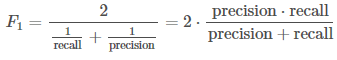
  
For mutli-class problems, we have to average the F1 scores for each class. The macro F1 score averages the F1 score for each class without taking into account label imbalances.  
  
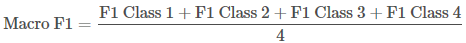
   
In other words, the number of occurrences of each label does not figure into the calculation when using macro (while it does when using the "weighted" score). (For more information on the differences, look at the [Scikit-Learn Documention for F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) or this [Stack Exchange question and answers](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin). If we want to assess our performance, we can use the code:  
`from sklearn.metrics import f1_score`
`f1_score(y_true, y_predicted, average = 'macro')`
  
For this problem, the labels are imbalanced, which makes it a little strange to use macro averaging for the evaluation metric, but that's a decision made by the organizers and not something we can change! In your own work, you want to be aware of label imbalances and choose a metric accordingly.
  
### Roadmap
The end objective is a machine learning model that can predict the poverty level of a household. However, before we get carried away with modeling, it's important to understand the problem and data. Also, we want to evaluate numerous models before choosing one as the "best" and after building a model, we want to investigate the predictions. Our roadmap is therefore as follows:  
  
1. Understand the problem (we're almost there already)
2. Exploratory Data Analysis
3. Feature engineering to create a dataset for machine learning
4. Compare several baseline machine learning models
5. Try more complex machine learning models
6. Optimize the selected model
7. Investigate model predictions in context of problem
8. Draw conclusions and lay out next steps
  
The steps laid out above are iterative meaning that while we will go through them one at a time, we might go back to an earlier step and revisit some of our decisions. In general, data science is a non-linear pracice where we are constantly evaluating our past decisions and making improvements. In particular, feature engineering, modeling, and optimization are steps that we often repeat because we never know if we got them right the first time!  
  
## DeepL 번역
또 다른 Kaggle 챌린지에 오신 것을 환영합니다! 코스타리카 가구 빈곤 수준 예측 콘테스트의 목표는 개인 및 가구 특성을 모두 사용하여 가구의 빈곤 수준을 예측할 수 있는 머신 러닝 모델을 개발하는 것입니다. 이 '선한 데이터 과학' 프로젝트는 사람들이 광고를 클릭하게 하는 것보다 사회에 더 유익한 일에 우리의 기술을 투입할 수 있는 기회를 제공합니다!  
  
이 노트북에서는 먼저 문제를 소개하고, 데이터 세트에 대한 철저한 탐색적 데이터 분석을 수행하고, 기능 엔지니어링 작업을 수행하고, 여러 머신러닝 모델을 시험해보고, 모델을 선택하고, 모델을 최적화하는 작업을 수행하고, 마지막으로 모델의 결과물을 검사하고 결론을 도출하는 등 완전한 머신러닝 솔루션의 과정을 안내합니다. 이 노트북으로 순위표의 정상에 오르지는 못하겠지만, 향후 머신 러닝 프로젝트를 위해 탄탄한 기초를 다질 수 있는 교육 도구로 사용할 수 있습니다. Kaggle 프로젝트를 통해 머신 러닝에 대해 많은 것을 배울 수 있지만, 리더보드의 최상위권에 오르는 데 사용된 몇 가지 전략은 모범 사례가 아니므로 여기서는 1등은 아니지만 매우 우수한 머신 러닝 솔루션을 구축하는 데 집중하겠습니다. Kaggle 프로젝트는 경연 대회이긴 하지만, 경연 대회로 위장한 '머신 러닝 교육'이라고 표현하는 것이 가장 적절하다고 생각합니다!"  
  
이 작업에 대한 후속 작업을 원하신다면, 이 문제에 대한 [자동화된 피처 엔지니어링 사용에 대한 커널](https://www.kaggle.com/code/willkoehrsen/featuretools-for-good/notebook)과 [Featuretools](https://featuretools.alteryx.com/en/stable/#minute-quick-start)를 포함한 추가 작업이 있습니다(리더보드 점수가 약간 더 높습니다). (제 글쓰기 스타일과 설명이 마음에 드신다면, [Towards Data Science](https://williamkoehrsen.medium.com/)에 글을 쓰기도 합니다).  
  
### 문제 및 데이터 설명
이 대회의 데이터는 train.csv와 test.csv의 두 가지 파일로 제공됩니다. 훈련 집합은 9557개의 행과 143개의 열로 구성되어 있고, 테스트 집합은 23856개의 행과 142개의 열로 구성되어 있습니다. 각 행은 __한 개인을__ 나타내고 각 열은 개인에게 고유하거나 개인의 가구에 대한 __특징을__ 나타냅니다. 훈련 집합에는 빈곤 수준을 1-4 척도로 나타내며 경쟁에 대한 레이블인 Target이라는 열이 하나 더 있습니다. 값이 1이면 가장 극심한 빈곤입니다.  
  
이것은 __다중 클래스 분류 머신 러닝 지도 학습 문제입니다:__  
  
- __지도 학습:__ 학습 데이터와 레이블이 함께 제공
- __다중 클래스 분류:__ 레이블은 4개의 클래스가 있는 불연속형 값입니다.
  
### 목표
목표는 __가구 수준에서__ 빈곤을 예측하는 것입니다. 각 개인의 고유한 특징과 가구에 대한 정보가 포함된 개인 수준의 데이터가 주어집니다. 이 작업을 위한 데이터 집합을 만들려면 각 가구에 대한 개별 데이터의 일부 집계를 수행해야 합니다. 또한 테스트 세트의 모든 개인에 대해 예측을 수행해야 하지만 "가구주만 채점에 사용"하므로 가구 단위로 빈곤을 예측하고자 합니다.

__중요 참고 사항: 한 가구의 모든 구성원이 훈련 데이터에서 동일한 레이블을 가져야 하지만, 같은 가구의 개인이 다른 레이블을 갖는 오류가 발생할 수 있습니다. 이러한 경우 각 가구의 가장에 대한 레이블을 사용하라는 메시지가 표시되며, 이는 `parentesco1 == 1.0`인 행으로 식별할 수 있습니다.__ 노트북에서 이 문제를 해결하는 방법을 다룰 것입니다(자세한 내용은 [대회 메인 토론](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403)을 참조하세요).

`목표` 값은 다음과 같이 빈곤 수준을 나타냅니다:

`1 = 극심한 빈곤`  
`2 = 중간 정도의 빈곤`  
`3 = 취약한 가구`  
`4 = 비취약 가구`  
  
143개의 모든 열에 대한 설명은 [대회 문서](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data)에서 확인할 수 있지만, 몇 가지 주의해야 할 사항은 다음과 같습니다:  
  
- __Id:__ 각 개인에 대한 고유 식별자, 우리가 사용하는 기능이 아니어야 합니다!
- __idhogar:__ 각 가구의 고유 식별자. 이 변수는 기능은 아니지만 한 가구의 모든 개인이 동일한 식별자를 갖게 되므로 가구별로 개인을 그룹화하는 데 사용됩니다.
- __parentesco1:__ 세대주인지 여부를 나타냅니다.
- __Target:__ 가구의 모든 구성원에게 동일한 레이블입니다.
  
모델을 만들 때 각 가구에 가구주의 빈곤 수준을 레이블로 지정하여 가구 단위로 훈련합니다. 원시 데이터에는 가구 및 개인 특성이 혼합되어 있으므로 개인 데이터의 경우 각 가구에 대해 이를 집계하는 방법을 찾아야 합니다. 일부 개인은 세대주가 없는 가구에 속해 있기 때문에 안타깝게도 이 데이터를 훈련에 사용할 수 없습니다. 이러한 데이터 문제는 __실세계__ 데이터에서 흔히 볼 수 있는 문제이므로 데이터 과학 업무에서 마주하게 될 데이터 집합에 대한 훌륭한 준비 과정입니다!  
  
### Metric
궁극적으로 우리는 한 가구의 정수형 빈곤 수준을 예측할 수 있는 머신 러닝 모델을 구축하고자 합니다. __매크로 F1 점수로__ 예측을 평가할 것입니다. 이진 분류 문제에 대한 표준 F1 점수는 정확도와 재현율의 조화 평균으로, 익히 알고 계실 것입니다:  
  
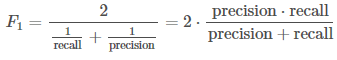
  
다중 클래스 문제의 경우 각 클래스의 F1 점수의 평균을 구해야 합니다. 매크로 F1 점수는 라벨 불균형을 고려하지 않고 각 클래스의 F1 점수의 평균을 구합니다.  
  
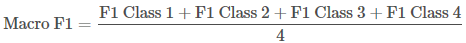
  
즉, 매크로를 사용할 때는 각 레이블의 발생 횟수가 계산에 포함되지 않습니다(반면 "가중치" 점수를 사용할 때는 포함됨). (차이점에 대한 자세한 내용은 [F1 점수에 대한 Scikit-Learn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) 또는 이 [스택 교환 질문과 답변](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin)을 참조하세요. 성능을 평가하고 싶다면 코드를 사용할 수 있습니다:  
`from sklearn.metrics import f1_score`
`f1_score(y_true, y_predicted, average = 'macro')`
  
이 문제의 경우 레이블이 불균형하기 때문에 평가 지표에 매크로 평균을 사용하는 것이 조금 이상하지만, 이는 주최 측에서 결정한 사항이며 저희가 변경할 수 있는 사항이 아닙니다! 자신의 작업에서 라벨 불균형을 인식하고 그에 따라 지표를 선택하는 것이 좋습니다.
  
### Roadmap
최종 목표는 가구의 빈곤 수준을 예측할 수 있는 머신러닝 모델을 만드는 것입니다. 하지만 모델링에 몰두하기 전에 문제와 데이터를 이해하는 것이 중요합니다. 또한 수많은 모델을 평가한 후 '가장 좋은' 모델을 선택하고, 모델을 구축한 후에는 예측 결과를 조사하고자 합니다. 따라서 우리의 로드맵은 다음과 같습니다:  
  
1. 문제를 이해합니다(이미 거의 다 이해했습니다).
2. 탐색적 데이터 분석
3. 머신 러닝을 위한 데이터 세트 생성을 위한 기능 엔지니어링
4. 여러 기준 머신 러닝 모델 비교
5. 더 복잡한 머신러닝 모델 시도하기
6. 선택한 모델 최적화하기
7. 문제의 맥락에서 모델 예측 조사하기
8. 결론 도출 및 다음 단계 계획
  
위에 설명한 단계는 반복적이기 때문에 한 번에 하나씩 진행하지만, 이전 단계로 돌아가서 일부 결정을 다시 검토할 수도 있습니다. 일반적으로 데이터 과학은 과거의 의사 결정을 지속적으로 평가하고 개선하는 비선형적인 프로세스입니다. 특히 기능 엔지니어링, 모델링 및 최적화는 처음에 제대로 했는지 알 수 없기 때문에 자주 반복하는 단계입니다!  

## Getting Started
We have a pretty good grasp of the problem, so we'll move into the Exploratory Data Analysis (EDA) and feature engineering. For the EDA we'll examine any interesting anomalies, trends, correlations, or patterns that can be used for feature engineering and for modeling. We'll make sure to investigate our data both quantitatively (with statistics) and visually (with figures).  
  
Once we have a good grasp of the data and any potentially useful relationships, we can do some feature engineering (the most important part of the machine learning pipeline) and establish a baseline model. This won't get us to the top of the leaderboard, but it will provide a strong foundation to build on!  
  
With all that info in mind (don't worry if you haven't got all the details), let's get started!  
  
## DeepL 번역
문제를 꽤 잘 파악했으므로 이제 탐색적 데이터 분석(EDA)과 피처 엔지니어링으로 넘어가겠습니다. EDA에서는 피처 엔지니어링과 모델링에 사용할 수 있는 흥미로운 이상 징후, 추세, 상관관계 또는 패턴을 조사할 것입니다. 데이터를 정량적(통계)으로, 그리고 시각적(그림)으로 조사할 것입니다.  
  
데이터와 잠재적으로 유용한 관계를 잘 파악하고 나면 머신 러닝 파이프라인에서 가장 중요한 부분인 피처 엔지니어링을 수행하고 기준 모델을 설정할 수 있습니다. 이렇게 한다고 해서 순위표의 정상에 오를 수는 없지만, 그 위에 구축할 수 있는 강력한 토대를 제공할 수 있습니다!  
  
이 모든 정보를 염두에 두고(모든 세부 사항을 파악하지 못했더라도 걱정하지 마세요) 시작해 봅시다!

### Imports
We'll use a familiar stack of data science libraries: Pandas, numpy, matplotlib, seaborn, and eventually sklearn for modeling.

In [1]:
## Data manipulation
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Set a few plotting defaults
%matplotlib inline
# plt.style.use('fivethirtyeight')
# plt.rcParams['font.size'] = 18
# plt.rcParams['patch.edgecolor'] = 'k'

# warnings ignore
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Read in Data and Look at Summary information

# pd.options.display.max_columns = 150

## Read in data
train = pd.read_csv('./input/004_costa-rican-household-poverty-prediction/train.csv')
test = pd.read_csv('./input/004_costa-rican-household-poverty-prediction/test.csv')
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0  ...          100    1849               1        100             0   
1     0  ...          144    4489               1        144             0   
2     0  ...          121    8464               1          0             0   
3     0  ...           81     289              16        121             4   
4     0  ...          121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


### Integer Columns
Let's look at the distribution of unique values in the integer columns. For each column, we'll count the number of unique values and show the result in a bar plot.

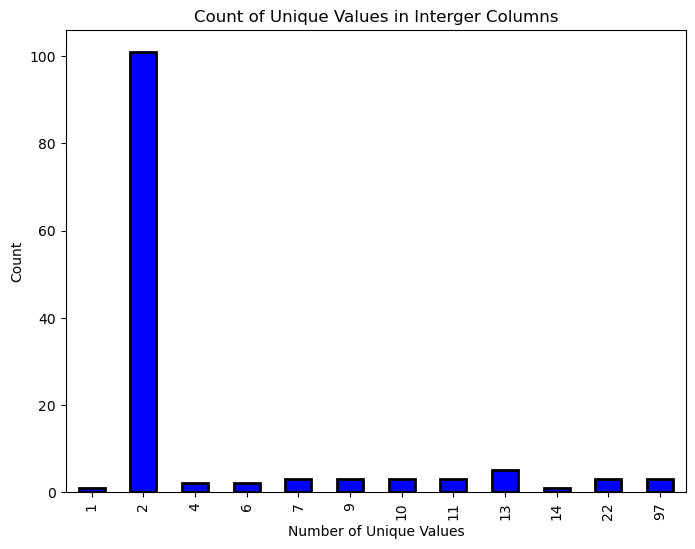

In [5]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='blue', figsize=(8,6), edgecolor='k', linewidth=2)
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Interger Columns');

The columns with only 2 unique values represent Booleans (0 or 1). In a lot of cases, this boolean information is already on a household level. For example, the refrig column says whether or not the household has a refrigerator. When it comes time to make features from the Boolean columns that are on the household level, we will not need to aggregate these. However, the Boolean columns that are on the individual level will need to be aggregated.  
  
### Float Columns
Another column type is floats which represent continuous variables. We can make a quick distribution plot to show the distribution of all float columns. We'll use an OrderedDict to map the poverty levels to colors because this keeps the keys and values in the same order as we specify (unlike a regular Python dictionary).  
  
The following graphs shows the distributions of the float columns colored by the value of the Target. With these plots, we can see if there is a significant difference in the variable distribution depending on the household poverty level.  
  
### DeepL 번역
고유 값이 2개만 있는 열은 부울(0 또는 1)을 나타냅니다. 대부분의 경우 이 부울 정보는 이미 가구 수준에 있습니다. 예를 들어, 냉장고 열은 가구에 냉장고가 있는지 여부를 나타냅니다. 가구 수준에 있는 부울 열에서 기능을 만들 때는 이러한 정보를 집계할 필요가 없습니다. 그러나 개인 수준의 부울 열은 집계해야 합니다.  
  
### Float Columns
또 다른 열 유형은 연속형 변수를 나타내는 실수 열입니다. 모든 부동형 열의 분포를 보여주기 위해 빠른 분포도를 만들 수 있습니다. 일반 파이썬 딕셔너리와 달리 키와 값이 지정한 순서대로 유지되므로 빈곤 수준을 색상에 매핑하기 위해 OrderedDict를 사용하겠습니다.  
  
다음 그래프는 Target 값에 따라 색상이 지정된 실수 열의 분포를 보여줍니다. 이 그래프를 통해 가구 빈곤 수준에 따라 변수 분포에 유의미한 차이가 있는지 확인할 수 있습니다.

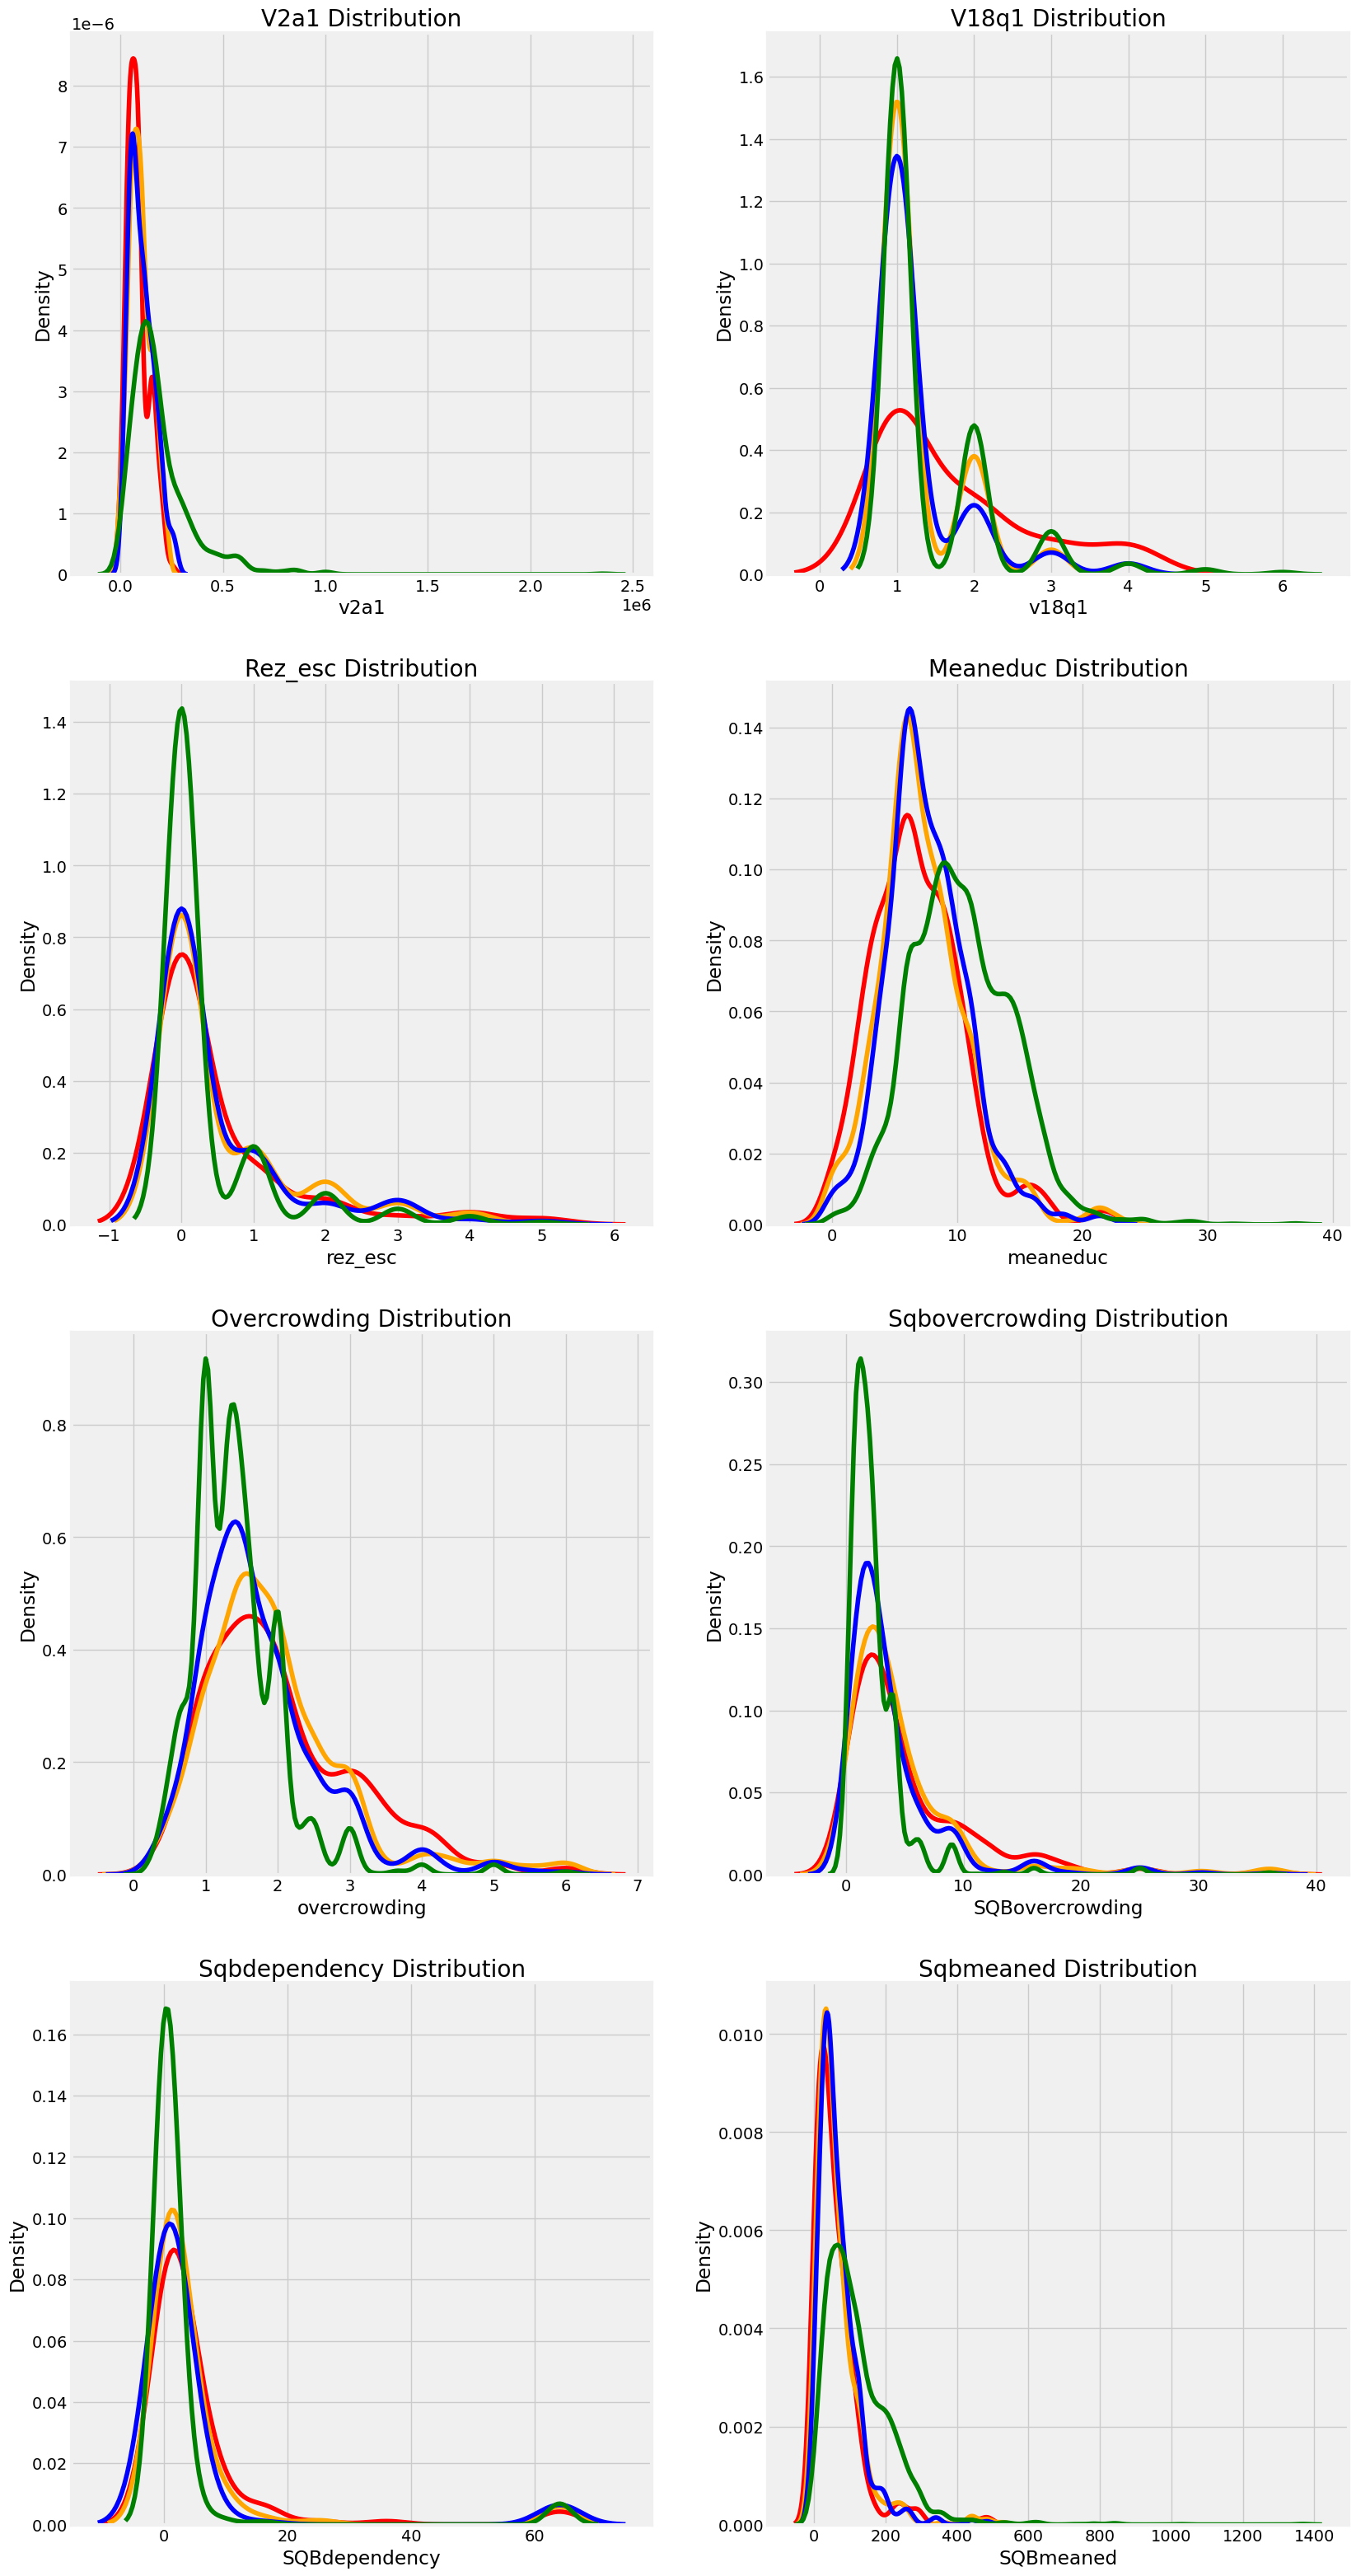

In [6]:
from collections import OrderedDict
# 파이썬 3.6이하에서는 dictionary의 순서가 보장되지 않아 OrderedDict 사용.
# 3.7이상에서도 OrderedDict을 사용함으로써 하위 버전에서 순서를 보장.
# 또한 3.7이상에서도 딕셔너리 간의 동등성 비교할 경우 OrderedDict은 순서 동일까지 검증.

plt.figure(figsize=(20,16))
plt.style.use('fivethirtyeight')

## Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

## Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i+1)
    ## Iterate through the poverty levels
    for poverty_level, color in colors. items():
        ## Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target']==poverty_level, col].dropna(),
                    ax=ax, color=color, label=poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution')   # str.capitalize(): 어절의 첫글자는 대문자, 외는 소문자 변환.
    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.legend;

plt.subplots_adjust(top=2);

Later on we'll calculate correlations between the variables and the Target to gauge the relationships between the features, but these plots can already give us a sense of which variables may be most "relevant" to a model. For example, the meaneduc, representing the average education of the adults in the household appears to be related to the poverty level: __a higher average adult education leads to higher values of the target which are less severe levels of poverty.__ The theme of the importance of education is one we will come back to again and again in this notebook!  
  
__DeepL 번역__  
나중에 변수와 대상 간의 상관 관계를 계산하여 기능 간의 관계를 측정할 것이지만, 이 플롯을 통해 어떤 변수가 모델과 가장 '관련성'이 높은지 이미 파악할 수 있습니다. 예를 들어, 가구 내 성인의 평균 학력을 나타내는 평균 학력은 빈곤 수준과 관련이 있는 것으로 보입니다: __성인 평균 교육 수준이 높을수록 빈곤 수준이 덜 심각한 대상의 값이 높아집니다.__ 교육의 중요성에 대한 주제는 이 노트북에서 계속해서 다시 다룰 주제입니다!

In [7]:
train.select_dtypes('object').head()

Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no

The Id and idhogar object types make sense because these are identifying variables. However, the other columns seem to be a mix of strings and numbers which we'll need to address before doing any machine learning. According to the documentation for these columns:  
  
- dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
- edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
- edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
  
These explanations clear up the issue. For these three variables, __"yes" = 1__ and __"no" = 0__. We can correct the variables using a mapping and convert to floats.  
  
__DeepL 번역__
Id 및 idhogar 객체 유형은 식별 변수이므로 의미가 있습니다. 그러나 다른 열은 문자열과 숫자가 혼합되어 있어 머신 러닝을 수행하기 전에 처리해야 할 것 같습니다. 이러한 열에 대한 설명서에 따르면:  
  
- dependency: 부양 비율, 계산 = (19세 미만 또는 64세 이상 가구원 수)/(19세 이상 64세 미만 가구원 수)
- edjefe: 남성 세대주의 교육 연한, 에스콜라리(교육 연한), 세대주 및 성별의 상호작용에 기반, 예=1, 아니오=0
- edjefa: 에스꼴라리(교육 년수), 세대주 및 성별의 상호작용을 기준으로 한 여성 세대주의 교육 년수, 예=1, 아니오=0
  
이러한 설명을 통해 문제가 명확해집니다. 이 세 가지 변수의 경우 __"yes" = 1__, __"no" = 0__ 입니다. 매핑을 사용하여 변수를 수정하고 부동 소수점으로 변환할 수 있습니다.

In [8]:
mapping = {'yes': 1, 'no': 0}

## Apply same operation to both train and test
for df in [train, test]:
    ## Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()


dependency       edjefa       edjefe
count  9557.000000  9557.000000  9557.000000
mean      1.149550     2.896830     5.096788
std       1.605993     4.612056     5.246513
min       0.000000     0.000000     0.000000
25%       0.333333     0.000000     0.000000
50%       0.666667     0.000000     6.000000
75%       1.333333     6.000000     9.000000
max       8.000000    21.000000    21.000000

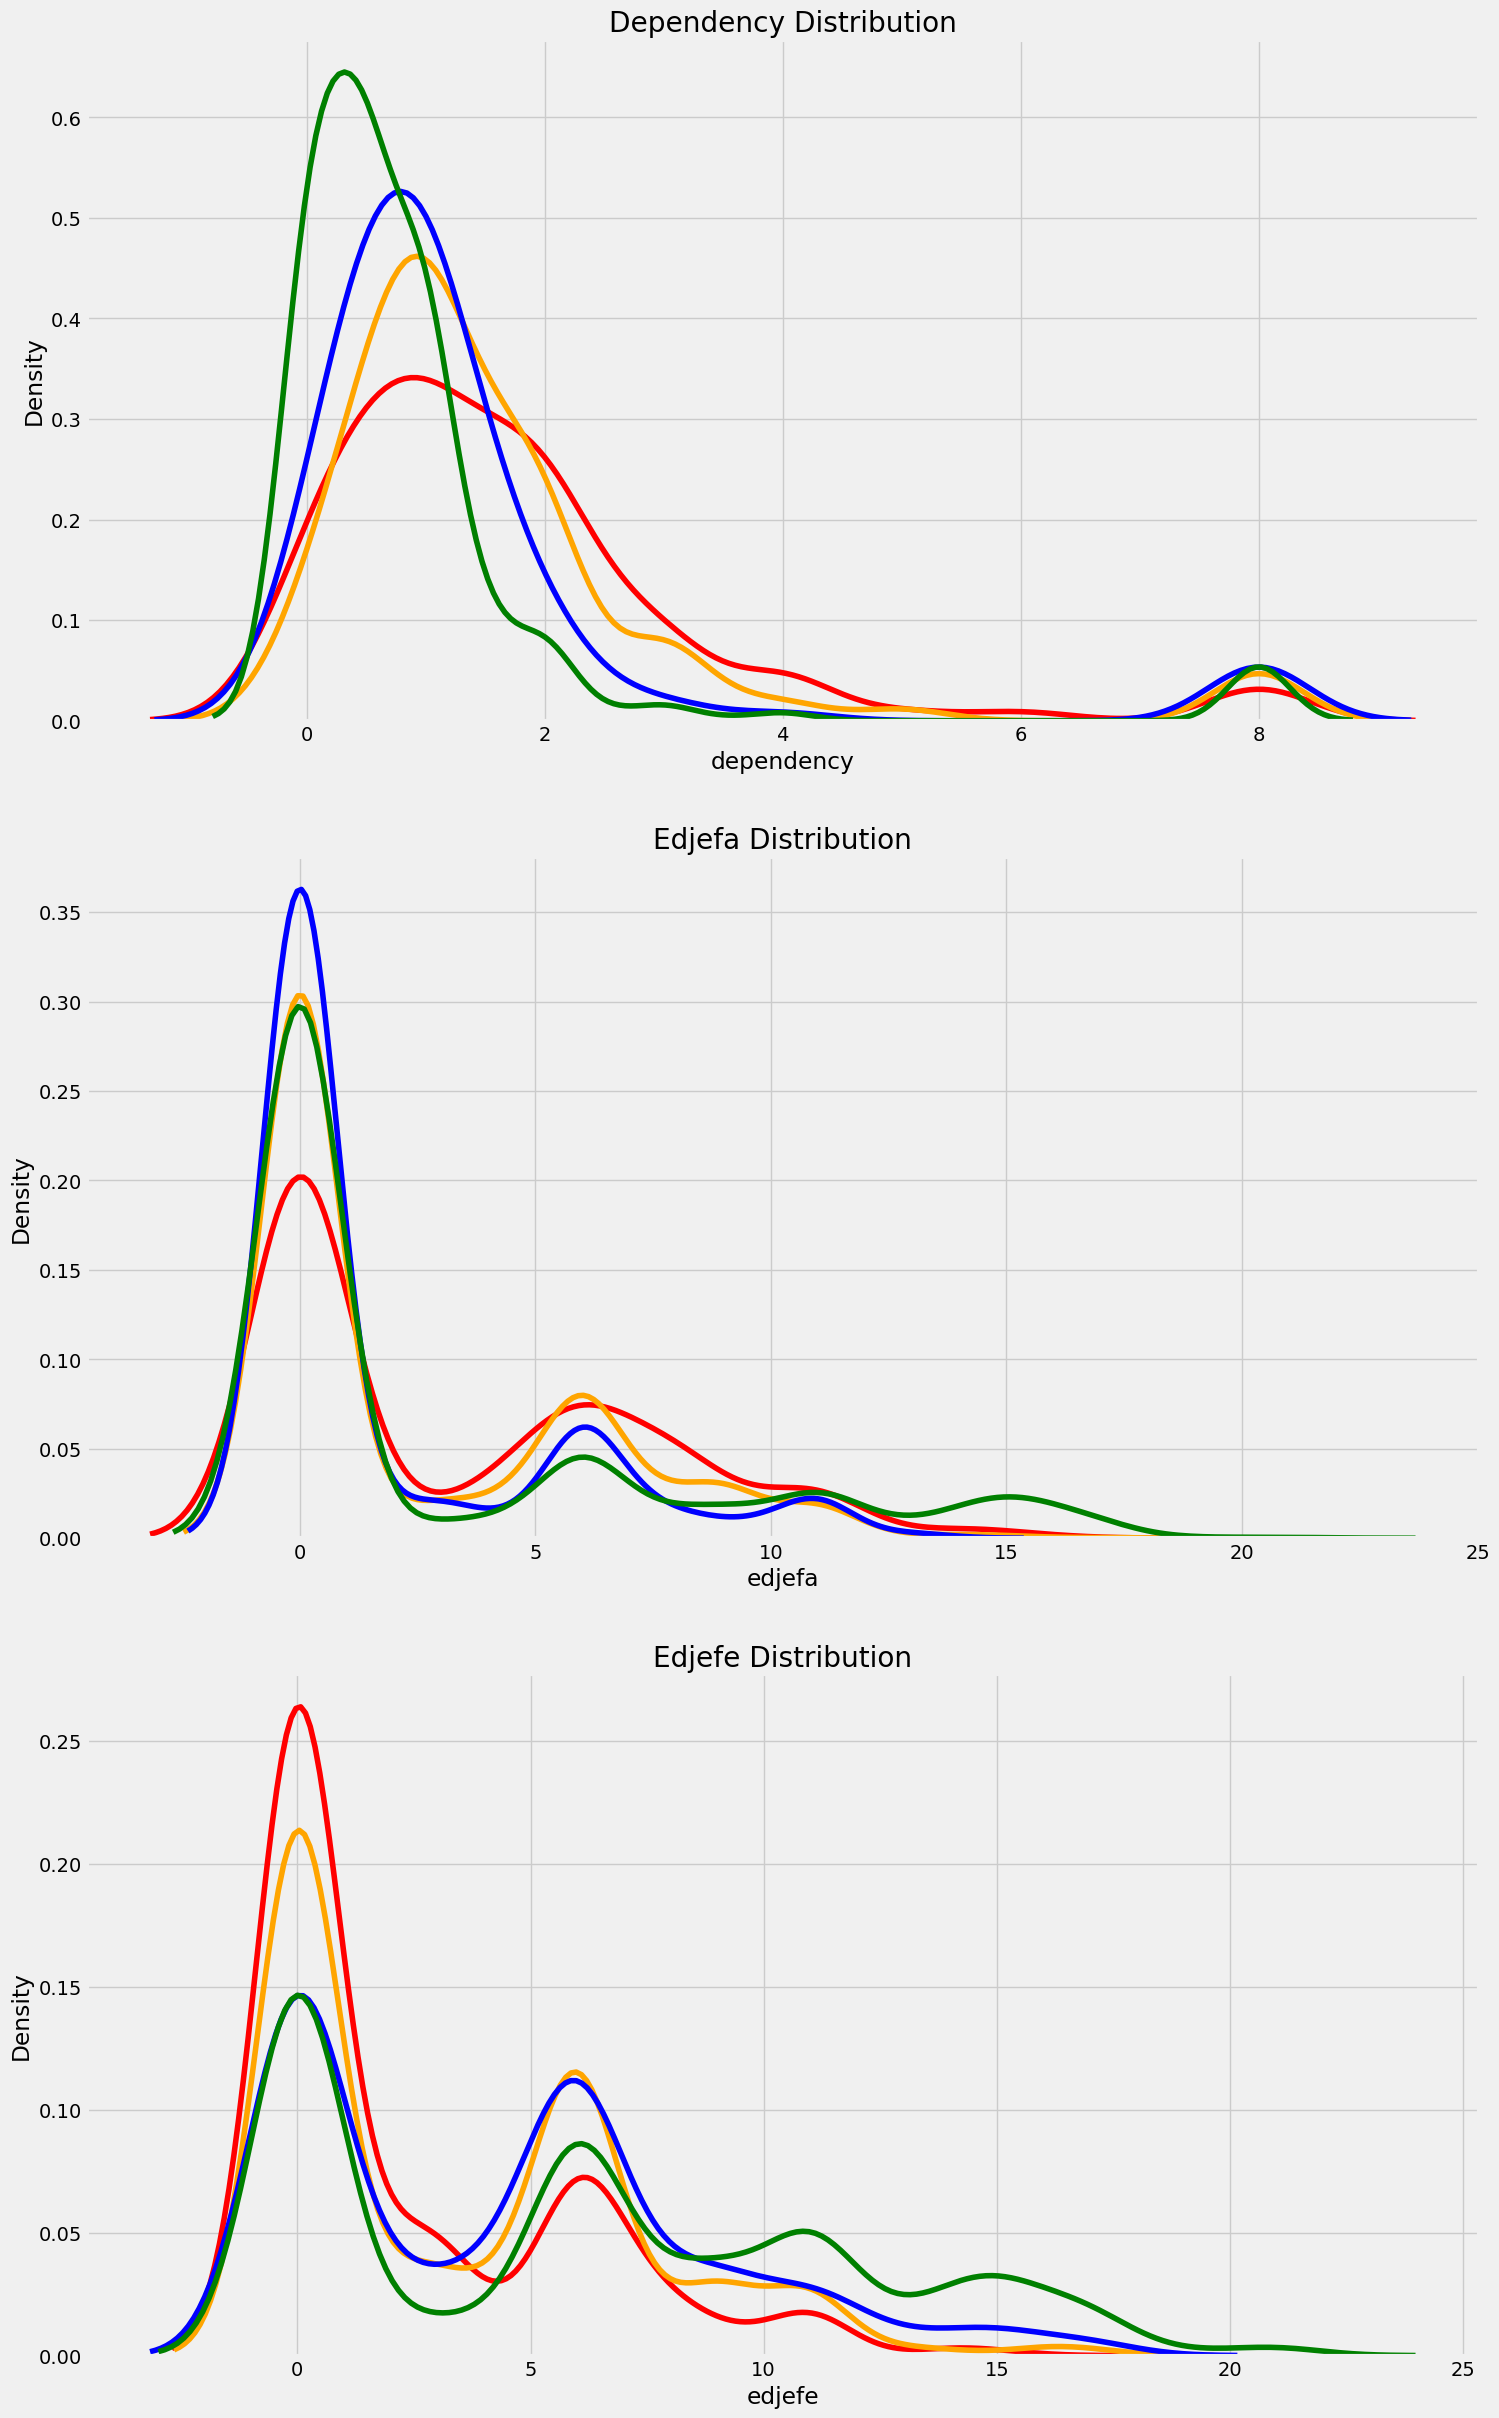

In [9]:
plt.figure(figsize=(16,12))

## Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i+1)
    ## Iterate through the poverty levels
    for poverty_level, color in colors.items():
        ## Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target']==poverty_level, col].dropna(),
                    ax=ax, color=color, label=poverty_mapping[poverty_level])
    
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')

plt.subplots_adjust(top=2)

These variables are now correctly represented as numbers and can be fed into a machine learning model.  
  
To make operations like that above a little easier, we'll join together the training and testing dataframes. This is important once we start feature engineering because we want to apply the same operations to both dataframes so we end up with the same features. Later we can separate out the sets based on the `Target`.  
  
__DeepL 번역__  
이제 이러한 변수가 숫자로 올바르게 표현되어 머신 러닝 모델에 입력할 수 있습니다.  
  
위와 같은 작업을 좀 더 쉽게 하기 위해 학습 및 테스트 데이터 프레임을 함께 결합하겠습니다. 이는 피쳐 엔지니어링을 시작할 때 중요한데, 두 데이터 프레임에 동일한 연산을 적용하여 동일한 기능으로 끝내야 하기 때문입니다. 나중에 `Target`을 기준으로 세트를 분리할 수 있습니다.

In [10]:
## Add null Target column to test
test['Target'] = np.nan
# data = train.append(test, ignore_index=True)
data = pd.concat([train, test], ignore_index=True)

### Exploring Label Distribution
Next, we can get an idea of how imbalanced the problem is by looking at the distribution of labels. There are four possible integer levels, indicating four different levels of poverty. To look at the correct labels, we'll subset only to the columns where `parentesco1 == 1` because this is the head of household, the correct label for each household.  
  
The bar plot below shows the distribution of training labels (since there are no testing labels).  
  
### DeepL 번역
다음으로, 라벨의 분포를 살펴보면 문제의 불균형이 어느 정도인지 파악할 수 있습니다. 네 가지 가능한 정수 레벨이 있으며, 이는 네 가지 다른 빈곤 수준을 나타냅니다. 올바른 레이블을 살펴보기 위해, 각 가구의 올바른 레이블인 세대주이므로 `parentesco1 == 1`인 열로만 하위 집합을 만들겠습니다.  
  
아래 막대 그래프는 훈련 레이블의 분포를 보여줍니다(테스트 레이블이 없으므로).

Target
1.0     222
2.0     442
3.0     355
4.0    1954
Name: count, dtype: int64

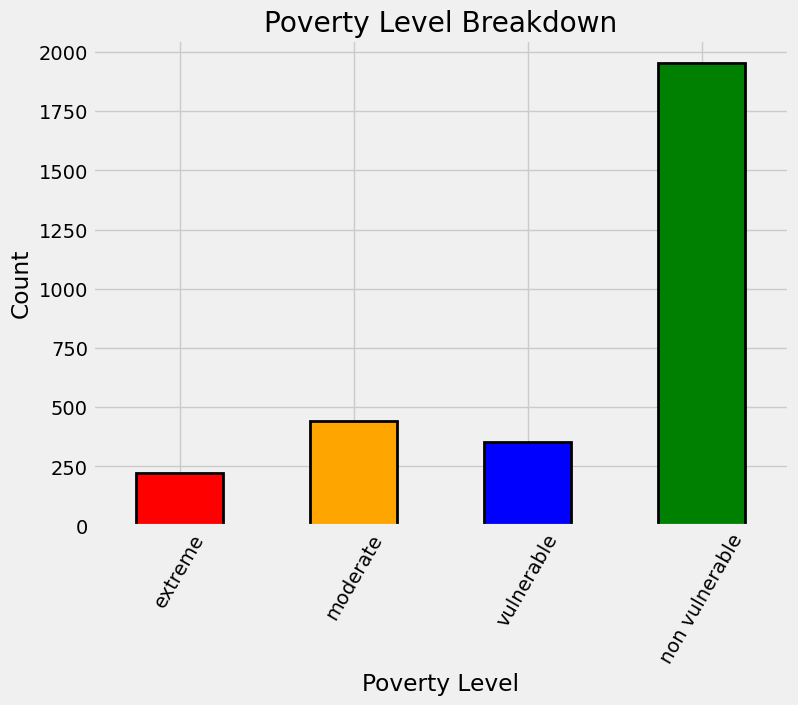

In [11]:
## Head of household
heads = data.loc[data['parentesco1']==1].copy()

## Labels for training
train_labels = data.loc[(data['Target'].notnull())&(data['parentesco1']==1), ['Target', 'idhogar']]

## Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

## Bar plot of occurrences of each label
label_counts.plot.bar(figsize=(8,6),
                      color=colors.values(),
                      edgecolor='k', linewidth=2)

## Formatting
plt.xlabel('Poverty Level')
plt.ylabel('Count')
plt.xticks([x-1 for x in poverty_mapping.keys()],
           list(poverty_mapping.values()), rotation=60)
plt.title('Poverty Level Breakdown')

label_counts

We are dealing with an imbalanced class problem (which makes it intriguing why the contest organizers choose the macro F1 score as the metric instead of weighted F1!). There are many more households that classify as non vulnerable than in any other category. The extreme poverty class is the smallest (I guess this should make us optimistic!).  
  
One problem with imbalanced classification problems is that the machine learning model can have a difficult time predicting the minority classes because it sees far less examples. Think about this in human terms: if we are classifiying poverty and we see far more cases of no poverty than extreme poverty, it will make it more difficult for us to identify the high poverty households because of less exposure. One potential method to address class imbalanceds is through oversampling (which is covered in more advanced notebooks).  

### Addressing Wrong Labels
As with any realistic dataset, the Costa Rican Poverty data has some issues. Typically, 80% of a data science project will be spent cleaning data and fixing anomalies/errors. These can be either human entry errors, measurement errors, or sometimes just extreme values that are correct but stand out. For this problem, some of the labels are not correct because individuals in the same household have a different poverty level. We're not told why this may be the case, but we are told to use the head of household as the true label.  
  
That information makes our job much easier, but in a real-world problem, we would have to figure out the reason Why the labels are wrong and how to address the issue on our own. This section fixes the issue with the labels although it is not strictly necessary: I kept it in the notebook just to show how we may deal with this issue.   

__Identify Errors__  
First we need to find the errors before we can correct them. To find the households with different labels for family members, we can group the data by the household and then check if there is only one unique value of the Target. 
    
__DeepL 번역__  
우리는 불균형한 계층 문제를 다루고 있습니다(대회 주최 측이 왜 가중치 F1 대신 macro F1 점수를 지표로 선택했는지 흥미롭습니다!). 비취약계층으로 분류되는 가구가 다른 어떤 범주보다 훨씬 더 많습니다. 극빈층이 가장 적습니다(이 정도면 낙관적이어야 할 것 같습니다!).

불균형한 분류 문제의 한 가지 문제점은 머신러닝 모델이 훨씬 적은 사례를 보기 때문에 소수 계층을 예측하는 데 어려움을 겪을 수 있다는 것입니다. 빈곤을 분류할 때 극빈층보다 빈곤하지 않은 사례가 훨씬 더 많다면, 노출되는 사례가 적기 때문에 빈곤층을 식별하기가 더 어려워질 수 있다는 것을 인간의 관점에서 생각해 보세요. 계층 불균형을 해결하기 위한 한 가지 잠재적인 방법은 오버샘플링(고급 노트북에서 다루고 있는 방법)을 사용하는 것입니다.  

### 잘못된 레이블 해결  
다른 현실적인 데이터 집합과 마찬가지로 코스타리카 빈곤 데이터에도 몇 가지 문제가 있습니다. 일반적으로 데이터 과학 프로젝트의 80%는 데이터를 정리하고 이상 징후나 오류를 수정하는 데 소요됩니다. 이러한 오류는 사람의 입력 오류, 측정 오류 또는 때로는 정확하지만 눈에 띄는 극단적인 값일 수 있습니다. 이 문제의 경우, 같은 가구 내 개인이 다른 빈곤 수준을 가지고 있기 때문에 일부 라벨이 정확하지 않습니다. 이 경우 그 이유는 알려주지 않지만, 세대주를 실제 라벨로 사용하라는 지시를 받습니다.  
  
이러한 정보는 우리의 업무를 훨씬 쉽게 만들어 주지만, 실제 문제 발생 시에는 라벨이 잘못된 이유와 문제를 해결하는 방법을 스스로 알아내야 합니다. 이 섹션에서는 꼭 필요한 것은 아니지만 라벨 문제를 해결합니다: 이 문제를 어떻게 해결할 수 있는지 보여드리기 위해 노트북에 보관해 두었습니다.  
  
__오류 식벌__  

오류를 수정하기 전에 먼저 오류를 찾아야 합니다. 가족 구성원의 레이블이 다른 가구를 찾으려면 데이터를 가구별로 그룹화한 다음 대상의 고유 값이 하나만 있는지 확인하면 됩니다.

In [12]:
## Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique()==1)

## Households where targets are not all equal
not_equal = all_equal[all_equal!=True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal              )))

There are 85 households where the family members do not all have the same target.


In [13]:
train[train['idhogar']==not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

idhogar  parentesco1  Target
7651  0172ab1d9            0       3
7652  0172ab1d9            0       2
7653  0172ab1d9            0       3
7654  0172ab1d9            1       3
7655  0172ab1d9            0       2

The organizers tell us that the correct label is that for the head of household, where `parentesco1 == 1`. For this household, the correct label is __3__ for all members. We can correct this (as shown later) by reassigning all the individuals in this household the correct poverty level. In the real-world, you might have to make the tough decision of how to address the problem by yourself (or with the help of your team).  
  
### Families without Heads of Household
We can correct all the label discrepancies by assigning the individuals in the same household the label of the head of household. But wait, you may ask: "What if there are households without a head of household? And what if the members of those households have differing values of the label?"  
  
Well, since you asked, let's investigate exactly that question!  

__DeepL 번역__  

주최 측에 따르면 올바른 레이블은 세대주의 경우 `parentesco1 == 1`입니다. 이 가구의 경우 모든 구성원에 대한 올바른 레이블은 __3__ 입니다. 이 가구의 모든 개인에게 올바른 빈곤 수준을 다시 할당하여 (나중에 표시된 것처럼) 이를 수정할 수 있습니다. 현실에서는 혼자서(또는 팀의 도움을 받아) 문제를 해결하는 방법에 대한 어려운 결정을 내려야 할 수도 있습니다.  
  
### Families without Heads of Household
같은 가구에 속한 개인에게 세대주 라벨을 지정하여 라벨 불일치를 모두 수정할 수 있습니다. 하지만 잠깐만요, 세대주가 없는 가구가 있다면 어떻게 해야 하나요? 그리고 그 가구의 구성원들이 라벨의 값이 서로 다르면 어떻게 하나요?"라고 질문할 수 있습니다.  
  
질문이 있으셨으니 그 질문에 대해 정확히 조사해 보겠습니다!

In [14]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

## Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader==0]).index, :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))
# 노트북의 결과는 15인데 왜 2988이 나오는지 모르겠음.
# 이전 그래프들도 형태가 달라도 무시했었는데 계속 산출이 다름.

There are 2988 households without a head.


In [15]:
## Find house holds without a head and where label are different
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique()==1)
print('{} Households with no head have different labels'.format(sum(households_no_head_equal==False)))

# 노트북의 결과는 0

85 Households with no head have different labels


Well that's a relief! This means that we don't have to worry about a household both where there is no head __AND__ the members have different values of the label! For this problem, according to the organizers, __if a household does not have a head, then there is no true label. Therefore, we actually won't use any of the households without a head for training__ Nonetheless, it's still a good exercise to go through this process of investigating the data!  
  
### Correct Errors
Now we can correct labels for the households that do have a head __AND__ the members have different poverty levels.  
  
__DeepL 번역__  
정말 다행이네요! 이제 가장이 없는 가구와 구성원들의 라벨 값이 다른 가구 모두에 대해 걱정할 필요가 없다는 뜻입니다! 이 문제에 대해 주최측에 따르면, __가구에 가장이 없으면 true 라벨이 아니라 합니다. 따라서 실제로 가장이 없는 가구는 훈련에 사용하지 않을 것입니다__ 그럼에도 불구하고 데이터를 조사하는 이 과정을 거치는 것은 여전히 좋은 연습입니다!  
  
### 오류 수정
이제 가장이 있고 구성원들의 빈곤 수준이 다른 가구의 라벨을 수정할 수 있습니다.

In [16]:
## Iterate through each household
for household in not_equal.index:
    ## Finde the correct label (for the head of household)
    true_target = int(train[(train['idhogar']==household)&(train['parentesco1']==1.0)]['Target'])

    ## Set the correct label for all members in the household
    train.loc[train['idhogar']==household, 'Target'] = true_target

## Groupby the household and figure out the numver of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique()==1)

## Households where targets are not all equal
not_equal = all_equal[all_equal!=True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


Since we are only going to use the heads of household for the labels, __this step is not completely necessary but it shows a workflow for correcting data errors like you may encounter in real life.__ Don't consider it extra work, just practice for your career!  
  
__DeepL 번역__  
라벨에는 세대주만 사용할 예정이므로 __이 단계가 꼭 필요한 것은 아니지만, 실제 상황에서 발생할 수 있는 데이터 오류를 수정하는 워크플로우를 보여줍니다.__ 추가 작업이라고 생각하지 마시고 경력을 위한 연습으로 삼으세요!

### Missing Variables
One of the most important steps of exploratory data analysis is finding missing values in the data and determining how to handle them. Missing values have to be filled in before we use a machine learning model and we need to think of the best strategy for filling them in based on the feature: this is where we'll have to start digging into the data definitions.  
  
First we can look at the percentage of missing values in each column.  
  
### DeepL 번역
탐색적 데이터 분석의 가장 중요한 단계 중 하나는 데이터에서 누락된 값을 찾아내고 이를 처리하는 방법을 결정하는 것입니다. 머신 러닝 모델을 사용하기 전에 결측값을 채워야 하며, 기능에 따라 결측값을 채우기 위한 최선의 전략을 생각해야 하는데, 바로 이 단계에서 데이터 정의에 대한 분석을 시작해야 합니다.  
  
먼저 각 열에서 누락된 값의 비율을 살펴볼 수 있습니다.

In [17]:
## Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns={0: 'total'})

## Create a percentage missing
missing['percent'] = missing['total']/len(data)

missing.sort_values('percent', ascending=False).head(10).drop('Target')

total   percent
rez_esc       27581  0.825457
v18q1         25468  0.762218
v2a1          24263  0.726154
SQBmeaned        36  0.001077
meaneduc         36  0.001077
hogar_adul        0  0.000000
parentesco10      0  0.000000
parentesco11      0  0.000000
parentesco12      0  0.000000

We don't have to worry about the `Target` becuase we made that `NaN` for the test data. However, we do need to address the other 3 columns with a high percentage of missing values.  
  
__v18q1__: Number of tablets  
  
Let's start with `v18q1` which indicates the number of tablets owned by a family. We can look at the value counts of this variable. Since this is a household variable, it only makes sense to look at it on a household level, so we'll only select the rows for the head of household.  
  
__DeepL 번역__  
테스트 데이터에 대해 `NaN`을 만들었으므로 `Target`에 대해 걱정할 필요가 없습니다. 하지만 결측값 비율이 높은 나머지 3개 열은 해결해야 합니다.  
  
__v18q1__: 태블릿 수  
  
한 가족이 소유한 태블릿 수를 나타내는 `v18q1`부터 시작하겠습니다. 이 변수의 값 개수를 살펴볼 수 있습니다. 이 변수는 가구 변수이므로 가구 수준에서만 살펴보는 것이 합리적이므로 가장에 대한 행만 선택하겠습니다.  

### Function to Plot Value Counts
Since we might want to plot value counts for different columns, we can write a simple function that will do it for us! 

In [18]:
def plot_value_counts(df, col, heads_only=False):
    """Plot value counts of a column, optionally with only the heads of a household"""
    ## Select heads of household
    if heads_only:
        df = df.loc[df['parentesco1']==1].copy()
    
    plt.figure(figsize=(8,6))
    df[col].value_counts().sort_index().plot.bar(color='blue',
                                                 edgecolor='k',
                                                 linewidth=2)
    plt.xlabel(f'{col}')
    plt.title(f'{col} Value Counts')
    plt.ylabel('Count')
    plt.show()

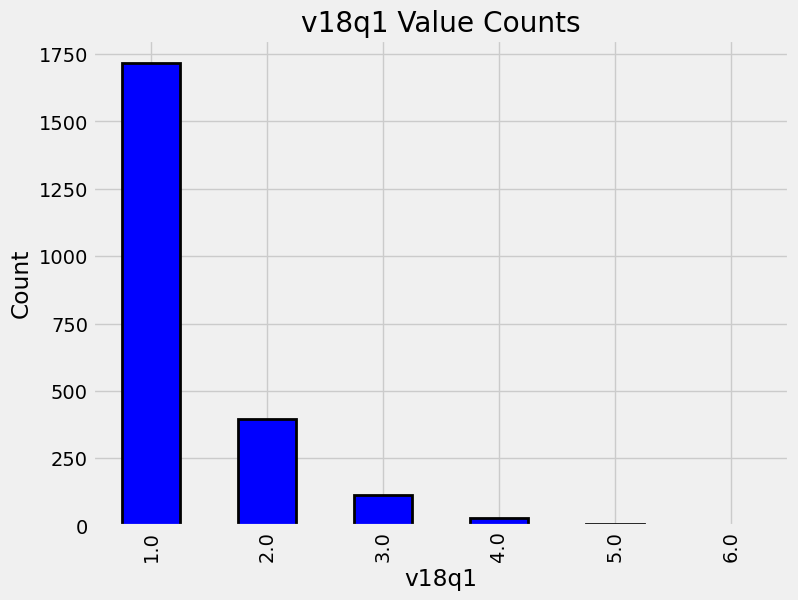

In [19]:
plot_value_counts(heads, 'v18q1')

It looks like the most common number of tablets to own is 1 if we go only by the data that is present. However, we also need to think about the data that is missing. In this case, it could be that families with a `nan` in this category just do not own a tablet! If we look at the data definitions, we see that `v18q` indicates whether or not a family owns a tablet. We should investigate this column combined with the number of tablets to see if our hypothesis holds.  
  
We can `groupby` the value of `v18q` (which is 1 for owns a tablet and 0 for does not) and then calculate the number of null values for `v18q1`. This will tell us if the null values represent that the family does not own a tablet.  
  
__DeepL 번역__  
현재 존재하는 데이터만 놓고 보면 가장 일반적인 태블릿 보유 대수는 1대인 것처럼 보입니다. 그러나 누락된 데이터에 대해서도 생각해 볼 필요가 있습니다. 이 경우, 이 카테고리에 `nan`이 있는 가족은 태블릿을 소유하고 있지 않을 수 있습니다! 데이터 정의를 살펴보면 `v18q`는 가족이 태블릿을 소유하고 있는지 여부를 나타냅니다. 이 열을 태블릿 수와 함께 조사하여 가설이 맞는지 확인해야 합니다.  
  
태블릿을 소유한 경우 1, 소유하지 않은 경우 0인 `v18q`의 값을 `groupby`한 다음 `v18q1`에 대한 null 값의 수를 계산할 수 있습니다. 이렇게 하면 해당 가족이 태블릿을 소유하고 있지 않음을 나타내는 null 값이 있는지 알 수 있습니다.

In [20]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

In [21]:
data['v18q1'] = data['v18q1'].fillna(0)

__v2a1__: Monthly rent payment  
  
The next missing column is `v2a1` which represents the montly rent payment.  
  
In addition to looking at the missing values of the monthly rent payment, it will be interesting to also look at the distribution of `tipovivi_`, the columns showing the ownership/renting status of the home. For this plot, we show the ownership status of those homes with a `nan` for the monthyl rent payment.  
  
__DeepL 번역__  
__v2a1__: 월 임대료 지불액  
  
다음으로 누락된 열은 월 임대료를 나타내는 `v2a1`입니다.  
  
월 임대료의 결측값을 살펴보는 것 외에도 주택의 소유/임차 상태를 나타내는 열인 `tipovivi_`의 분포도 살펴보는 것도 흥미로울 것입니다. 이 플롯에서는 월세 지불액이 `nan`인 주택의 소유 현황을 보여줍니다.  

In [22]:
for x in data:
    print(x)
    print(type(x))
    break

Id
<class 'str'>


Text(0.5, 1.0, 'Home Ownership Status for Households Missing Rent Payments')

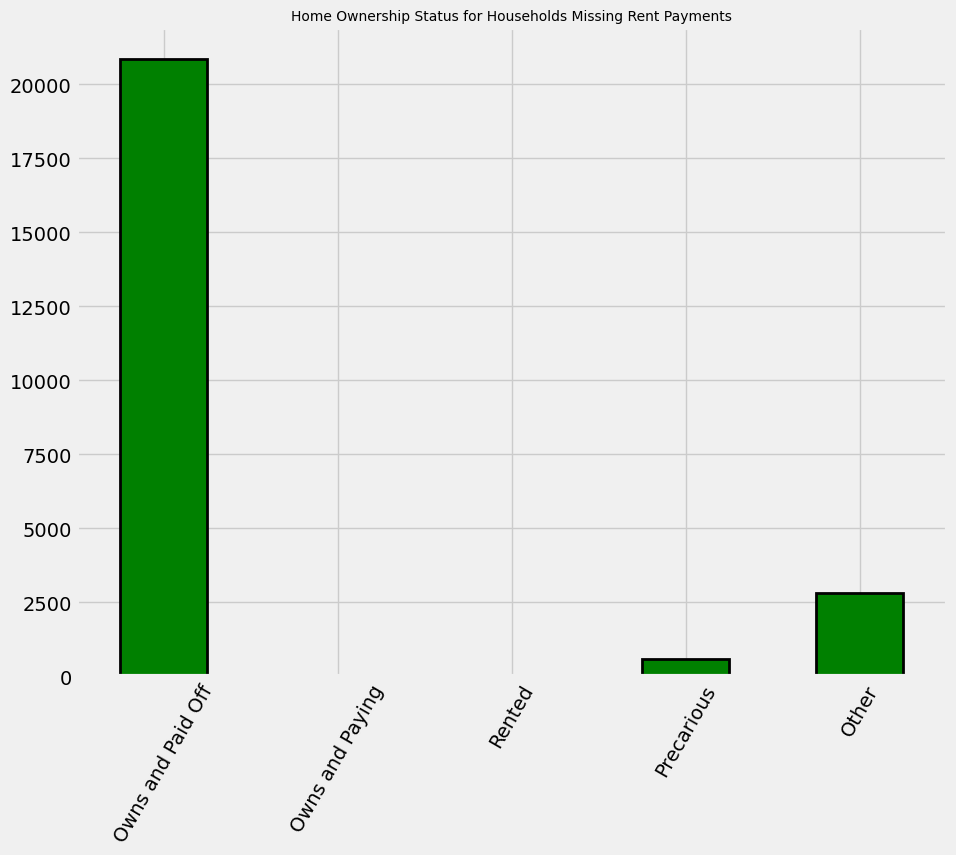

In [23]:
## Variables indicating home ownership
own_variables = [x for x in data if x.startswith('tipo')]
# str.startwith(v or (v1, vn)): 해당 str이 v로 시작 혹은 튜플 중 하나로 시작하는지 bool값 반환

## Plot of the home ownership variables for home missing rent payments
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize=(10,8),
                                                              color='green',
                                                              edgecolor='k',
                                                              linewidth=2)
plt.xticks([0,1,2,3,4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation=60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size=10)

The meaning of the home ownership variables is below:  
  
`tipovivi1, =1 own and fully paid house`  
`tipovivi2, "=1 own,  paying in installments"`  
`tipovivi3, =1 rented`  
`tipovivi4, =1 precarious`  
`tipovivi5, "=1 other(assigned,  borrowed)"`  
  
We've solved the issue! Well, mostly: the households that do not have a monthly rent payment generally own their own home. In a few other situations, we are not sure of the reason for the missing information.  
  
For the houses that are owned and have a missing monthly rent payment, we can set the value of the rent payment to zero. For the other homes, we can leave the missing values to be imputed but we'll add a flag (Boolean) column indicating that these households had missing values.  
  
__DeepL 번역__  
문제를 해결했습니다! 대부분 월 임대료를 지불하지 않는 가구는 일반적으로 자가 주택을 소유하고 있습니다. 몇 가지 다른 상황에서는 정보가 누락된 이유를 알 수 없습니다.  
  
소유하고 있지만 월 임대료가 누락된 주택의 경우 임대료 값을 0으로 설정할 수 있습니다. 다른 주택의 경우 누락된 값을 대입할 수 있지만 이러한 가구에 누락된 값이 있음을 나타내는 플래그(Boolen) 열을 추가할 수 있습니다.  

In [24]:
## Fill in households that own the house with 0 rent payment
data.loc[(data['tipovivi1']==1), 'v2a1'] = 0

## Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

v2a1-missing
False    29994
True      3419
Name: count, dtype: int64

__rez_esc__: years behind in school

The last column with a high percentage of missing values is `rez_esc` indicating years behind in school. For the families with a null value, is possible that they have no children currently in school. Let's test this out by finding the ages of those who have a missing value in this column and the ages of those who do not have a missing value.

__DeepL 번역__  
__rez_esc__: 학교를 늦게 졸업한 연도

누락된 값의 비율이 높은 마지막 열은 취학 연도를 나타내는 `rez_esc`입니다. 값이 0인 가족의 경우, 현재 학교에 다니는 자녀가 없을 가능성이 있습니다. 이 열에 결측값이 있는 사람의 나이와 결측값이 없는 사람의 나이를 구하여 이를 테스트해 보겠습니다.

In [25]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

What this tells us is that the oldest age with a missing value is 17. For anyone older than this, maybe we can assume that they are simply not in school. Let's look at the ages of those who have a missing value.  
  
__DeepL 번역__  
이를 통해 알 수 있는 것은 누락된 값이 있는 가장 오래된 연령이 17세라는 것입니다. 이보다 나이가 많은 사람은 단순히 학교에 다니지 않는다고 가정할 수 있습니다. 결측값이 있는 사람들의 나이를 살펴봅시다.

In [26]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

If we read through some of the [discussions for this competition](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403), we learn that this variable is only defined for individuals between 7 and 19. Anyone younger or older than this range presumably has no years behind and therefore the value should be set to 0. For this variable, if the individual is over 19 and they have a missing value, or if they are younger than 7 and have a missing value we can set it to zero. For anyone else, we'll leave the value to be imputed and add a boolean flag.  
  
__DeepL 번역__  
[이 대회에 대한 토론 내용](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403)을 읽어보면 이 변수는 7세에서 19세 사이의 개인에 대해서만 정의된다는 것을 알 수 있습니다. 이 범위보다 어리거나 나이가 많은 사람은 아마도 연차가 없을 것이므로 값을 0으로 설정해야 합니다. 이 변수의 경우 개인이 19세 이상이고 누락된 값이 있거나 7세 미만이고 누락된 값이 있는 경우 0으로 설정할 수 있습니다. 그 외의 경우에는 값을 대입할 수 있는 상태로 두고 부울 플래그를 추가합니다.

In [27]:
## If individual is over 19 or younger than 7 and missing years behind, set it to 0
data.loc[((data['age']>19) | (data['age']<7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

## Add a flag for those between 7 and 19 with a missing value
data['rez_esc-missing'] = data['rez_esc'].isnull()

There is also one outlier in the `rez_esc` column. Again, if we read through the competition discussions, we learn that the maximum value for this variable is 5. Therefore, any values above 5 should be set to 5.

In [28]:
data.loc[data['rez_esc']>5, 'rez_esc'] = 5

### Plot Two Categorical Variables
To show how two categorical variables interact with one another, there are a number of plotting options: scatterplots, faceted bar plots, boxplots, etc. I wasn't satisfied with any of these choices so I wrote the function below, which essentially is a scatterplot of two categoricals where the size of the points represent the percentage of a given y-value represented by each x-value.  
  
### DeepL 번역
두 범주형 변수가 서로 어떻게 상호 작용하는지 보여주기 위해 분산형 차트, 패싯 막대 차트, 박스형 차트 등 여러 가지 차트 옵션이 있습니다. 저는 이러한 옵션 중 어느 것도 만족스럽지 않아서 아래 함수를 작성했습니다. 이 함수는 기본적으로 점의 크기가 각 x값이 나타내는 주어진 y값의 백분율을 나타내는 두 범주형 변수의 산점도입니다.

In [29]:
def plot_categoricals(x, y, data, annotate=True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    ## Raw counts
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=False))
    raw_counts = raw_counts.rename(columns={'count': 'raw_count'})  # column명이 x와 다름

    ## Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=True))

    ## Rename the column and reset the index
    counts = counts.rename(columns={'proportion': 'normalized_count'}).reset_index()    # column명이 x와 다름
    counts['percent'] = 100*counts['normalized_count']

    ## Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])

    plt.figure(figsize=(14,10))
    ## Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor='k', color='lightgreen',
                s=100*np.sqrt(counts['raw_count']), marker='o',
                alpha=0.6, linewidths=1.5)
    
    if annotate:
        ## Annotate the plot with text
        for i, row in counts.iterrows():
            ## Put text with appropriate offsets
            plt.annotate(text=f"{round(row['percent'], 1)}%",   # s가 text로 바뀐듯
                         xy=(row[x]-(1/counts[x].nunique()),
                             row[y]-(0.15/counts[y].nunique())),
                        color='navy')
        
    ## Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())

    ## Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))

    ## 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max, int((sqr_max-sqr_min)/5)))
    markers = []

    ## Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s=100*size,
                                   label=f'{int(round(np.square(size)/100)*100)}',
                                   color='lightgreen',
                                   alpha=0.6, edgecolor='k', linewidths=1.5))
        
    ## Legend and formatting
    plt.legend(handles=markers, title='Counts',
               labelspacing=3, handletextpad=2,
               fontsize=16, loc=(1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy=(0,1), xycoords='figure points', size=10)
    
    ## Adjust axes limits
    plt.xlim((counts[x].min() - (6/counts[x].nunique()),
              counts[x].max() + (6/counts[x].nunique())))
    plt.ylim((counts[y].min() - (4/counts[y].nunique()),
              counts[y].max() + (4/counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{y} vs {x}');

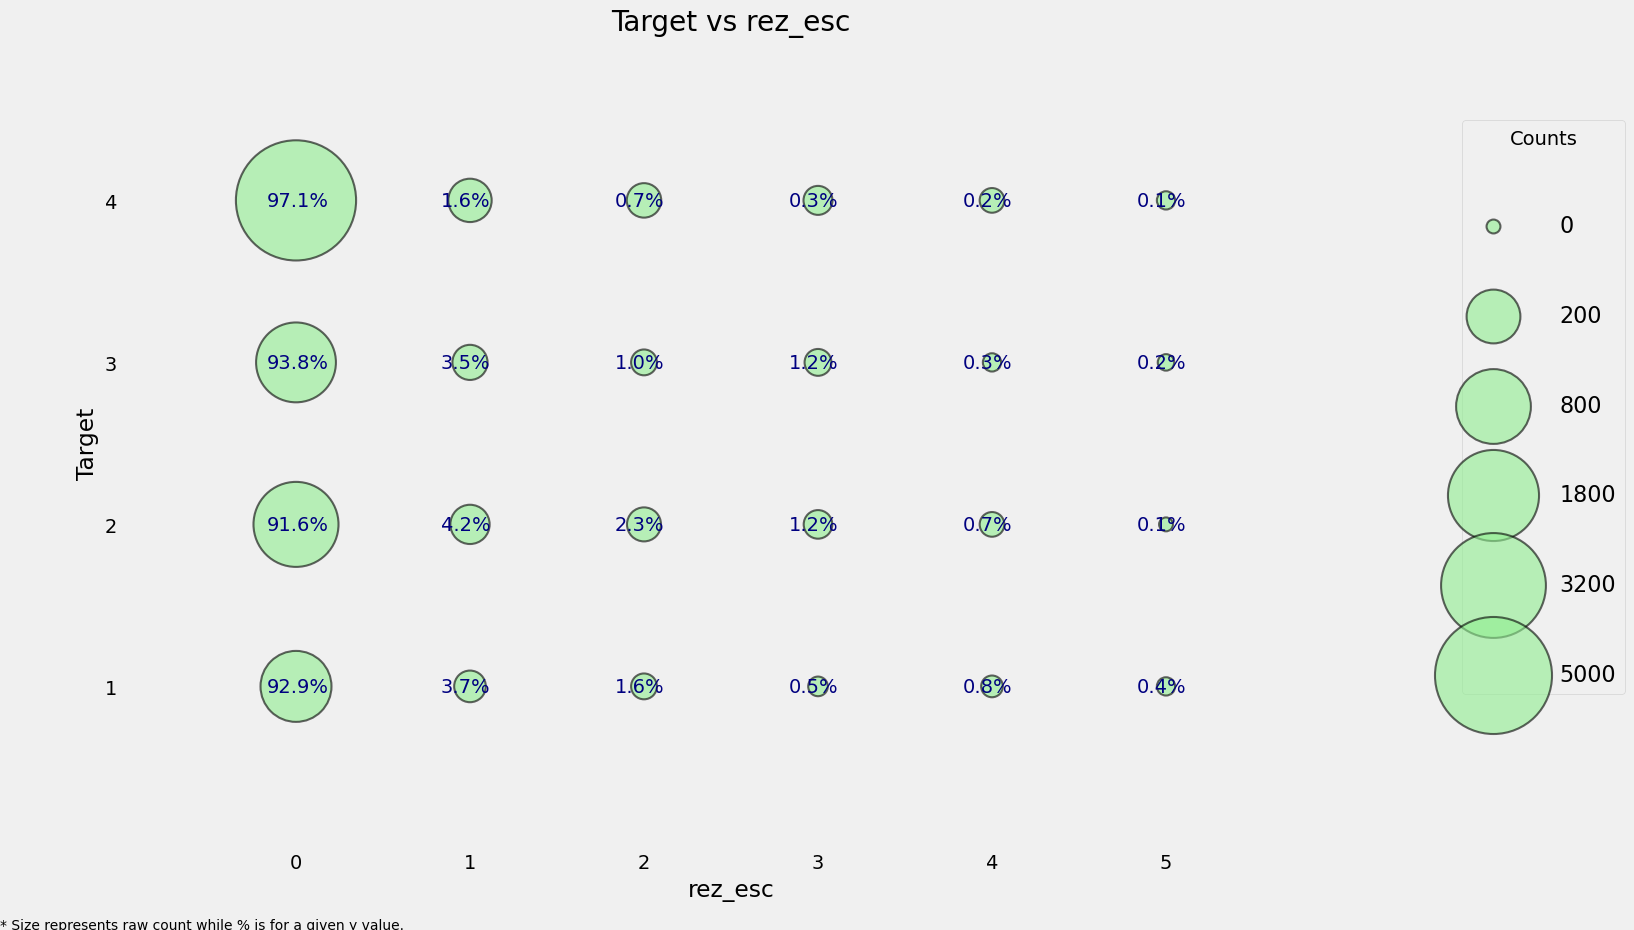

In [30]:
plot_categoricals('rez_esc', 'Target', data);

The size of the markers represents the raw count. To read the plot, choose a given y-value and then read across the row. For example, with a poverty level of 1, 93% of individuals have no years behind with a total count of around 800 individuals and about 0.4% of individuals are 5 years behind with about 50 total individuals in this category. This plot attempts to show both the overall counts and the within category proportion; it's not perfect , but I gave it a shot!  
  
__DeepL 번역__  
마커의 크기는 raw 개수를 나타냅니다. 그래프를 읽으려면 주어진 Y값을 선택한 다음 행을 가로질러 읽으면 됩니다. 예를 들어, 빈곤 수준이 1인 경우 93%의 개인은 연도가 뒤처지지 않으며 총 개수는 약 800명이고, 약 0.4%의 개인은 5년 뒤처지며 이 범주에 속하는 총 개수는 약 50명입니다. 이 플롯은 전체 수와 범주 내 비율을 모두 보여주기 위해 시도한 것으로, 완벽하지는 않지만 시도해 보았습니다!

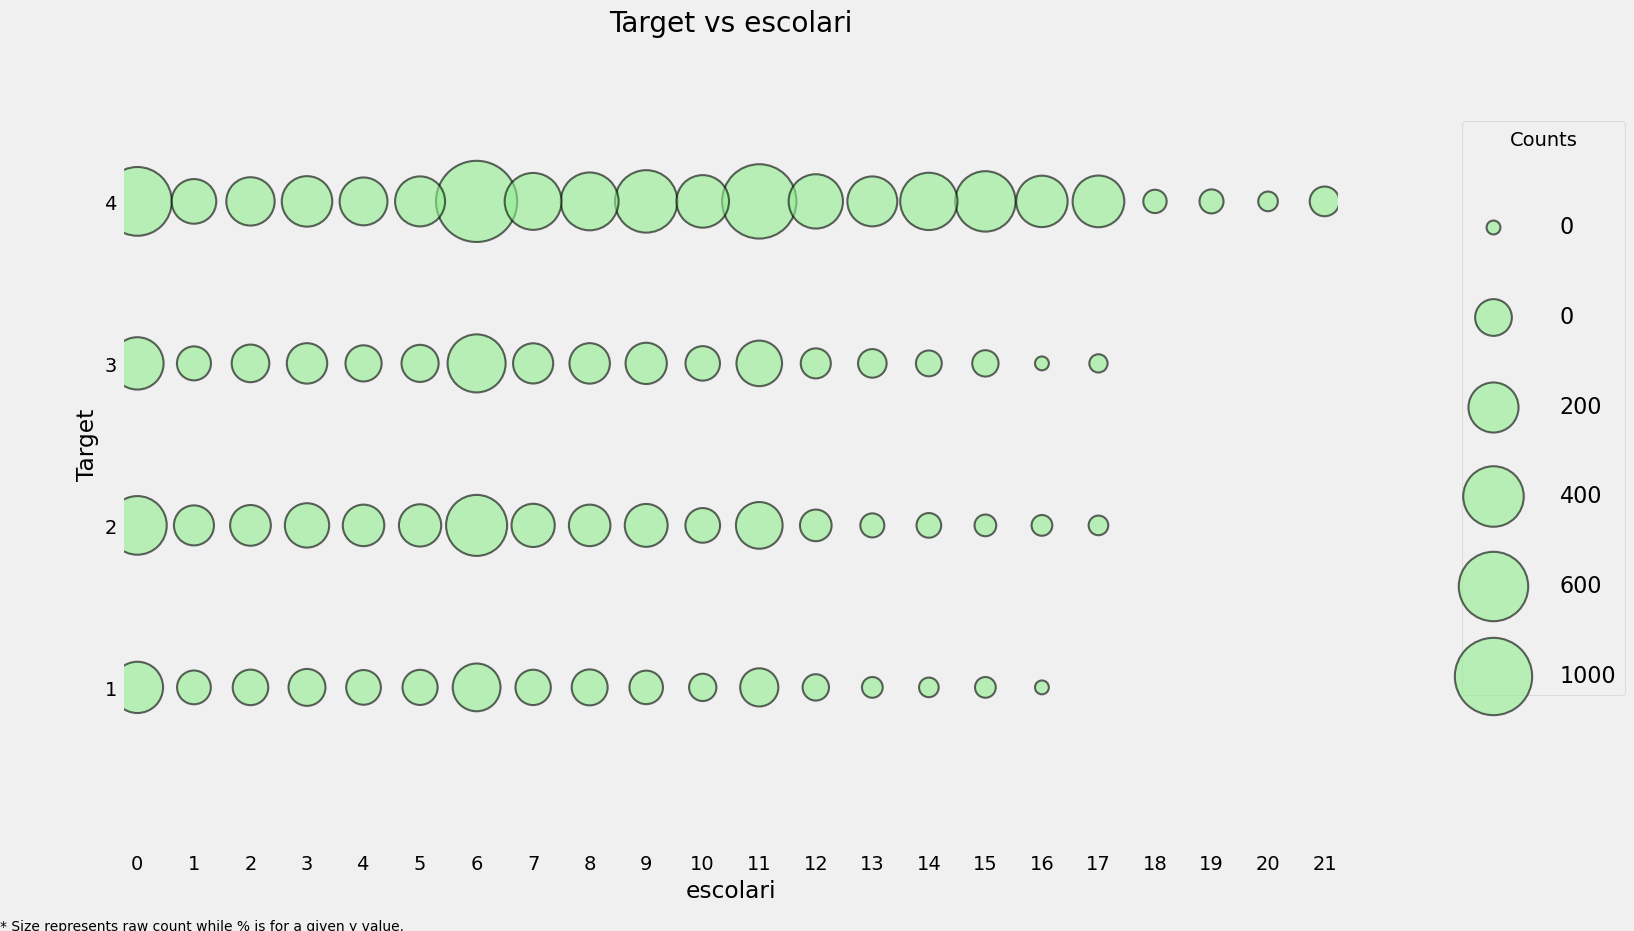

In [31]:
plot_categoricals('escolari', 'Target', data, annotate=False)

The remaining missing values in each column will be filled in, a process known as Imputation. There are several types of imputation commonly used, and one of the simplest and most effective methods is to fill in the missing values with the median of the column.  
  
As a final step with the missing values, we can plot the distribution of target for the case where either of these values are missing.  
  
__DeepL 번역__  
각 열의 나머지 결측값이 채워지는데, 이 과정을 대치라고 합니다. 일반적으로 사용되는 몇 가지 유형의 대입이 있으며, 가장 간단하고 효과적인 방법 중 하나는 열의 중앙값으로 누락된 값을 채우는 것입니다.  
  
누락된 값의 마지막 단계로, 두 값 중 하나가 누락된 경우에 대한 대상 분포를 그릴 수 있습니다.

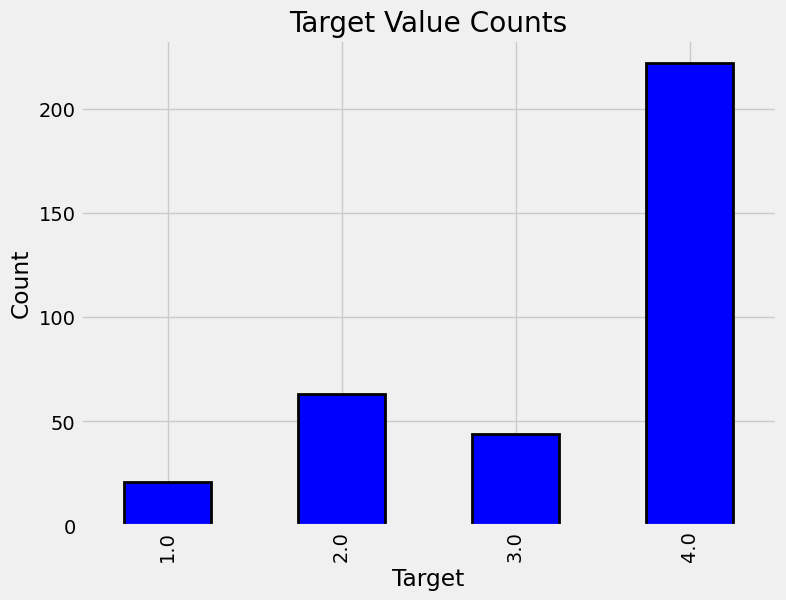

In [32]:
plot_value_counts(data[(data['rez_esc-missing']==1)], 'Target')

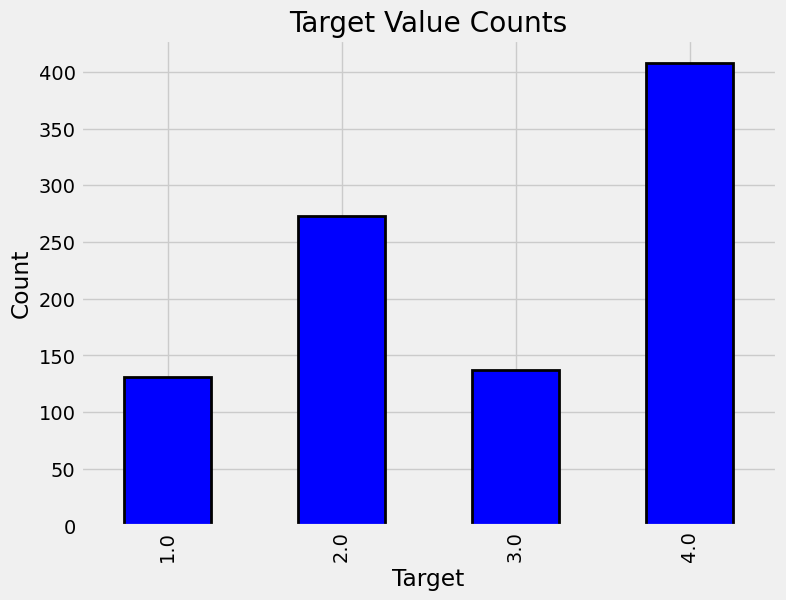

In [33]:
plot_value_counts(data[(data['v2a1-missing']==1)], 'Target')

This looks like it could be an indicator of more poverty given the higher prevalence of 2: moderate poverty.  
  
__This represents an important point__: sometimes the missing information is just as important as the information you are given.  
  
__DeepL 번역__  
이는 2번인 보통 빈곤의 유병률이 더 높다는 점에서 더 많은 빈곤을 나타내는 지표가 될 수 있는 것처럼 보입니다.  
  
__이것은 중요한 점을 나타냅니다__: 때로는 누락된 정보가 주어진 정보만큼이나 중요할 수 있습니다.

## Feature Engineering
There is plenty more exploratory data analysis we can do, but first we should work on consolidating our data at a household level. We already have some of the information for each household, but for training, we will need all of the information summarized for each household. This means grouping the individuals in a house (`groupby`) and performing an aggregation (`agg`) of the individual variables.  
  
In another notebook, I show how we can use automated feature engineering to do this, and __automated feature engineering__ should be a standard part of the machine learning workflow. Right now, we'll stick to doing this by hand, but definitely take a look at __automated feature engineering in Featuretools__.  
  
## DeepL 번역
더 많은 탐색적 데이터 분석을 할 수 있지만, 먼저 가구 수준에서 데이터를 통합하는 작업을 해야 합니다. 이미 각 가구에 대한 일부 정보가 있지만, 교육을 위해서는 각 가구에 대해 요약된 모든 정보가 필요합니다. 즉, 한 가구의 개인을 그룹화하고(`groupby`) 개별 변수의 집계(`agg`)를 수행해야 합니다.  
  
다른 노트북에서 자동화된 피처 엔지니어링을 사용하여 이 작업을 수행하는 방법을 보여드리며, __자동화된 피처 엔지니어링은__ 머신 러닝 워크플로우의 표준 부분이 되어야 합니다. 지금은 이 작업을 수작업으로 계속 진행하겠지만, Featuretools의 __자동화된 피처 엔지니어링을__ 꼭 살펴보세요.

### Column Definitions
Sometimes in data science we have to get our hands dirty digging through the data or do tedious tasks that take a lot of time. This is that part of the analysis: we have to define the columns that are at an individual level and at a household level using the [data decsriptions](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data). There is simply no other way to identify which variables at are the household level than to go through the variables themselves in the data description. Except, I've already done this for you, so all you have to do is copy and paste!  
  
We'll define different variables because we need to treat some of them in a different manner. Once we have the variables defined on each level, we can work to start aggregating them as needed.  
  
The process is as follows  
  
1. Break variables into household level and invididual level
2. Find suitable aggregations for the individual level data
    - Ordinal variables can use statistical aggregations
    - Boolean variables can also be aggregated but with fewer stats
3. Join the individual aggregations to the household level data
  
#### Define Variable Categories
There are several different categories of variables:  
  
1. Individual Variables: these are characteristics of each individual rather than the household
    - Boolean: Yes or No (0 or 1)
    - Ordered Discrete: Integers with an ordering
2. Household variables
    - Boolean: Yes or No
    - Ordered Discrete: Integers with an ordering
    - Continuous numeric
3. Squared Variables: derived from squaring variables in the data
4. Id variables: identifies the data and should not be used as features  
  
Below we manually define the variables in each category. This is a little tedious, but also necessary.

### DeepL 번역
데이터 과학에서는 때때로 데이터를 직접 손으로 파헤치거나 시간이 많이 걸리는 지루한 작업을 해야 할 때가 있습니다. 분석의 한 부분인 [데이터 설명](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data)을 사용하여 개인 수준과 가구 수준의 열을 정의해야 하는 경우가 여기에 해당합니다. 어떤 변수가 가구 수준인지 식별하는 방법은 데이터 설명에서 변수 자체를 살펴보는 것 외에 다른 방법이 없습니다. 하지만 제가 이미 이 작업을 수행했으므로 복사하여 붙여넣기만 하면 됩니다!  
  
일부 변수를 다른 방식으로 처리해야 하므로 다른 변수를 정의할 것입니다. 각 수준에서 변수를 정의하고 나면 필요에 따라 변수를 집계하는 작업을 시작할 수 있습니다.  
  
그 과정은 다음과 같습니다.  
  
1. 변수를 가구 수준과 불명확한 수준으로 나눕니다.
2. 개별 수준 데이터에 적합한 집계를 찾습니다.
    - 서수 변수는 통계 집계를 사용할 수 있습니다.
    - 부울 변수도 집계할 수 있지만 더 적은 수의 통계로 집계할 수 있습니다.
3. 개별 집계를 가구 수준 데이터에 조인합니다.
  
#### 변수 카테고리 정의
변수에는 여러 가지 카테고리가 있습니다:  
  
1. 개인 변수: 가구가 아닌 각 개인의 특성입니다.
    - 부울: 예 또는 아니오(0 또는 1)
    - 정렬된 이산형: 순서가 있는 정수
2. 가구 변수
    - 부울: 예 또는 아니요
    - 순서가 지정된 불연속형: 순서가 지정된 정수
    - 연속형 숫자
3. 제곱 변수: 데이터의 변수를 제곱하여 파생된 변수
4. ID 변수: 데이터를 식별하며 기능으로 사용해서는 안 됩니다.  
  
아래에서는 각 카테고리의 변수를 직접 정의합니다. 이 과정은 다소 지루하지만 꼭 필요한 작업입니다.

In [34]:
id_ = ['Id', 'idhogar', 'Target']

In [35]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [36]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [37]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [38]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats:', np.all(np.array(list(Counter(x).values()))==1))
print('We covered every variable: ', len(x)==data.shape[1])

There are no repeats: True
We covered every variable:  True


__Squared Variables__  
First, the easiest step: we'll remove all of the squared variables. Sometimes variables are squared or transformed as part of feature engineering because it can help linear models learn relationships that are non-linear. However, since we will be using more complex models, these squared features are redundant. They are highly correlated with the non-squared version, and hence can actually hurt our model by adding irrelevant information and also slowing down training.  
  
For an example, let's take a look at `SQBage` vs `age`.  
  
__DeepL 번역__  
먼저 가장 쉬운 단계로 제곱된 변수를 모두 제거합니다. 선형 모델이 비선형적인 관계를 학습하는 데 도움이 될 수 있기 때문에 피처 엔지니어링의 일부로 변수를 제곱하거나 변형하는 경우가 있습니다. 그러나 더 복잡한 모델을 사용할 것이므로 이러한 제곱된 특징은 중복됩니다. 제곱된 피처는 제곱되지 않은 피처와 상관관계가 높기 때문에 관련 없는 정보를 추가하고 학습 속도를 늦춤으로써 실제로 모델에 해를 끼칠 수 있습니다.  
  
예를 들어 `SQBage`와 `age`를 살펴보겠습니다.

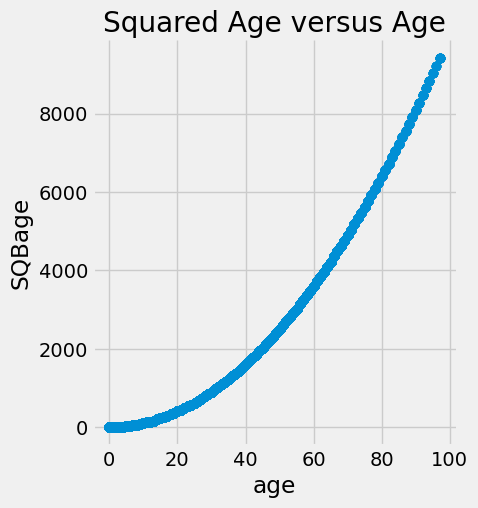

In [39]:
sns.lmplot(data=data, x='age', y='SQBage', fit_reg=False)
plt.title('Squared Age versus Age');

In [40]:
sqr_

['SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBhogar_nin',
 'SQBovercrowding',
 'SQBdependency',
 'SQBmeaned',
 'agesq']

In [41]:
## Remove squared variables
data = data.drop(columns=sqr_)
# sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
data.shape

(33413, 136)

### Id Variables
These are pretty simple: they will be kept as is in the data since we need them for identification.

### Household Level Variables
First let's subset to the heads of household and then to the household level variables.

In [42]:
# heads = data.loc[data['parentesco1']==1, :]
heads = data.loc[data['parentesco1']==1]    # 상동
heads = heads[id_+hh_bool+hh_cont+hh_ordered]
heads.shape

(10307, 99)

For most of the household level variables, we can simply keep them as is: since we want to make predictions for each household, we use these variables as features. However, we can also remove some redundant variables and also add in some more features derived from existing data.  
  
__Redundant Household Variables__  
Let's take a look at the correlations between all of the household variables. If there are any that are too highly correlated, then we might want to remove one of the pair of highly correlated variables.  
  
The following code identifies any variables with a greater than 0.95 absolute magnitude correlation.  
  
__DeepL 번역__  
대부분의 가구 수준 변수는 그대로 유지하면 됩니다. 각 가구에 대한 예측을 하고 싶기 때문에 이러한 변수를 기능으로 사용합니다. 그러나 일부 중복 변수를 제거하고 기존 데이터에서 파생된 몇 가지 기능을 추가할 수도 있습니다.  
  
__중복되는 가구 변수__  
모든 가구 변수 간의 상관관계를 살펴봅시다. 상관관계가 너무 높은 변수가 있는 경우 상관관계가 높은 변수 쌍 중 하나를 제거할 수 있습니다.  
  
다음 코드는 절대 크기 상관관계가 0.95보다 큰 변수를 식별합니다.

In [43]:
## Create correlation matrix
corr_matrix = heads.corr(numeric_only=True)

## Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
# np.triu: 상삼각행렬로 변환, k=기준
# df.where: 거짓값 대치

## Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [44]:
# These show one out of each pair of correlated variables. To find the other pair, we can subset the `corr_matrix`.

corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9]

r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000

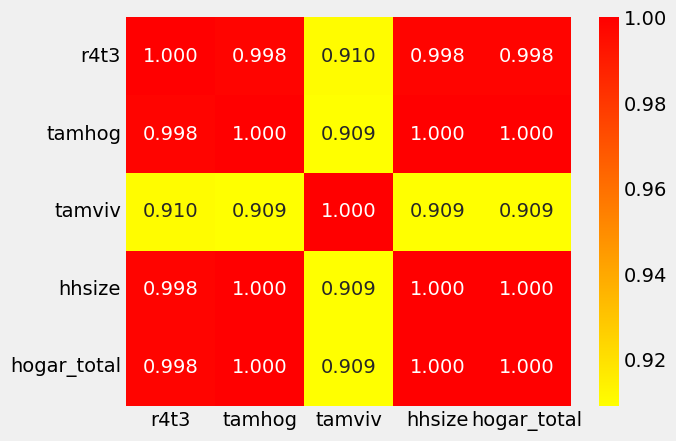

In [45]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9],
            annot=True, cmap=plt.cm.autumn_r, fmt='.3f');
# matplotlib 3.8(24.02.10. 기준 최신)버전은 annot가 첫 행만 나오는 문제가 있어 3.7로 다운그레이드 해야 함.

There are several variables here having to do with the size of the house:  
  
- r4t3, Total persons in the household
- tamhog, size of the household
- tamviv, number of persons living in the household
- hhsize, household size
- hogar_total, # of total individuals in the household
  
These variables are all highly correlated with one another. In fact, `hhsize` has a perfect correlation with `tamhog` and `hogar_total`. We will remove these two variables because the information is redundant. We can also remove `r4t3` because it has a near perfect correlation with `hhsize`.  
  
`tamviv` is not necessarily the same as `hhsize` because there might be family members that are not living in the household. Let's visualize this difference in a scatterplot.  
  
__DeepL번역__  
여기에는 집의 크기와 관련된 몇 가지 변수가 있습니다:  
  
- r4t3, 가구 내 총 인원수
- tamhog, 가구의 크기
- tamviv, 가구 내 거주 인원 수
- hhsize, 가구 크기
- hogar_total, 가구 내 총 개인 수
  
이러한 변수는 모두 서로 높은 상관관계를 가지고 있습니다. 실제로 `hhsize`는 `tamhog` 및 `hogar_total`과 완벽한 상관 관계를 갖습니다. 이 두 변수는 정보가 중복되므로 제거하겠습니다. 또한 `r4t3`은 `hhsize`와 거의 완벽한 상관 관계를 가지므로 제거할 수 있습니다.  
  
`tamviv`는 가구에 거주하지 않는 가족 구성원이 있을 수 있으므로 `hhsize`와 반드시 같을 수는 없습니다. 이 차이를 분산형 차트로 시각화해 보겠습니다.

In [46]:
heads = heads.drop(columns=['tamhog', 'hogar_total', 'r4t3'])

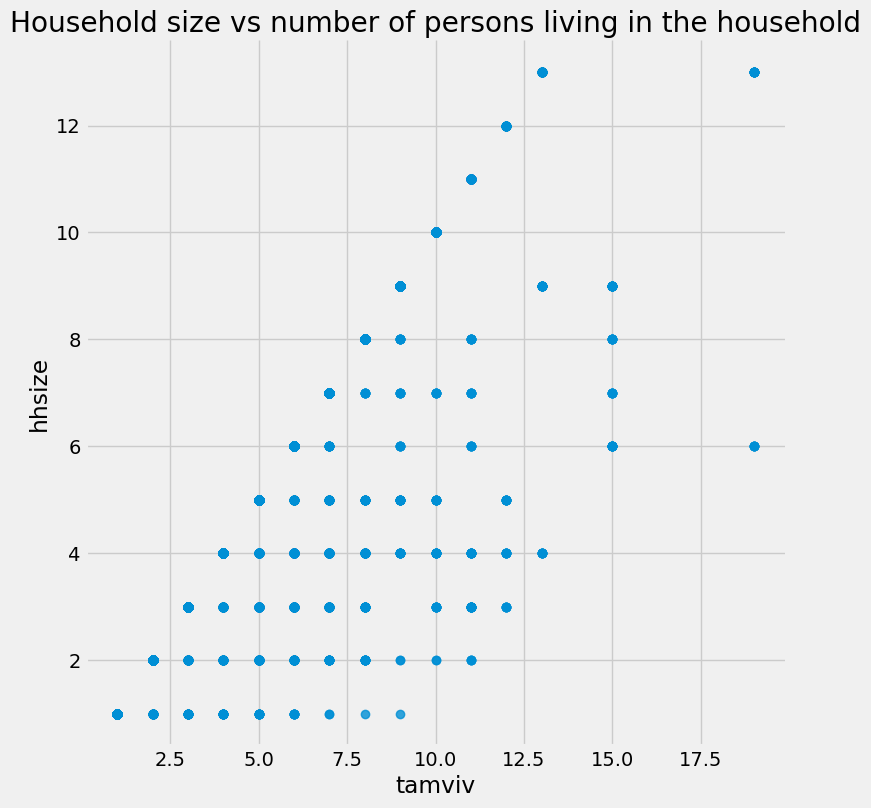

In [47]:
sns.lmplot(data=data, x='tamviv', y='hhsize', fit_reg=False, height=8)
plt.title('Household size vs number of persons living in the household');

We see for a number of cases, there are more people living in the household than there are in the family. This gives us a good idea for a new feature: __the difference between these two measurements!__  
  
Let's make this new feature.  
  
__DeepL 번역__  
가족 구성원 수보다 더 많은 사람이 함께 사는 경우가 많습니다. 이는 새로운 기능에 대한 좋은 아이디어를 제공합니다: __이 두 측정값의 차이!__  
  
이 새로운 기능을 만들어 봅시다.

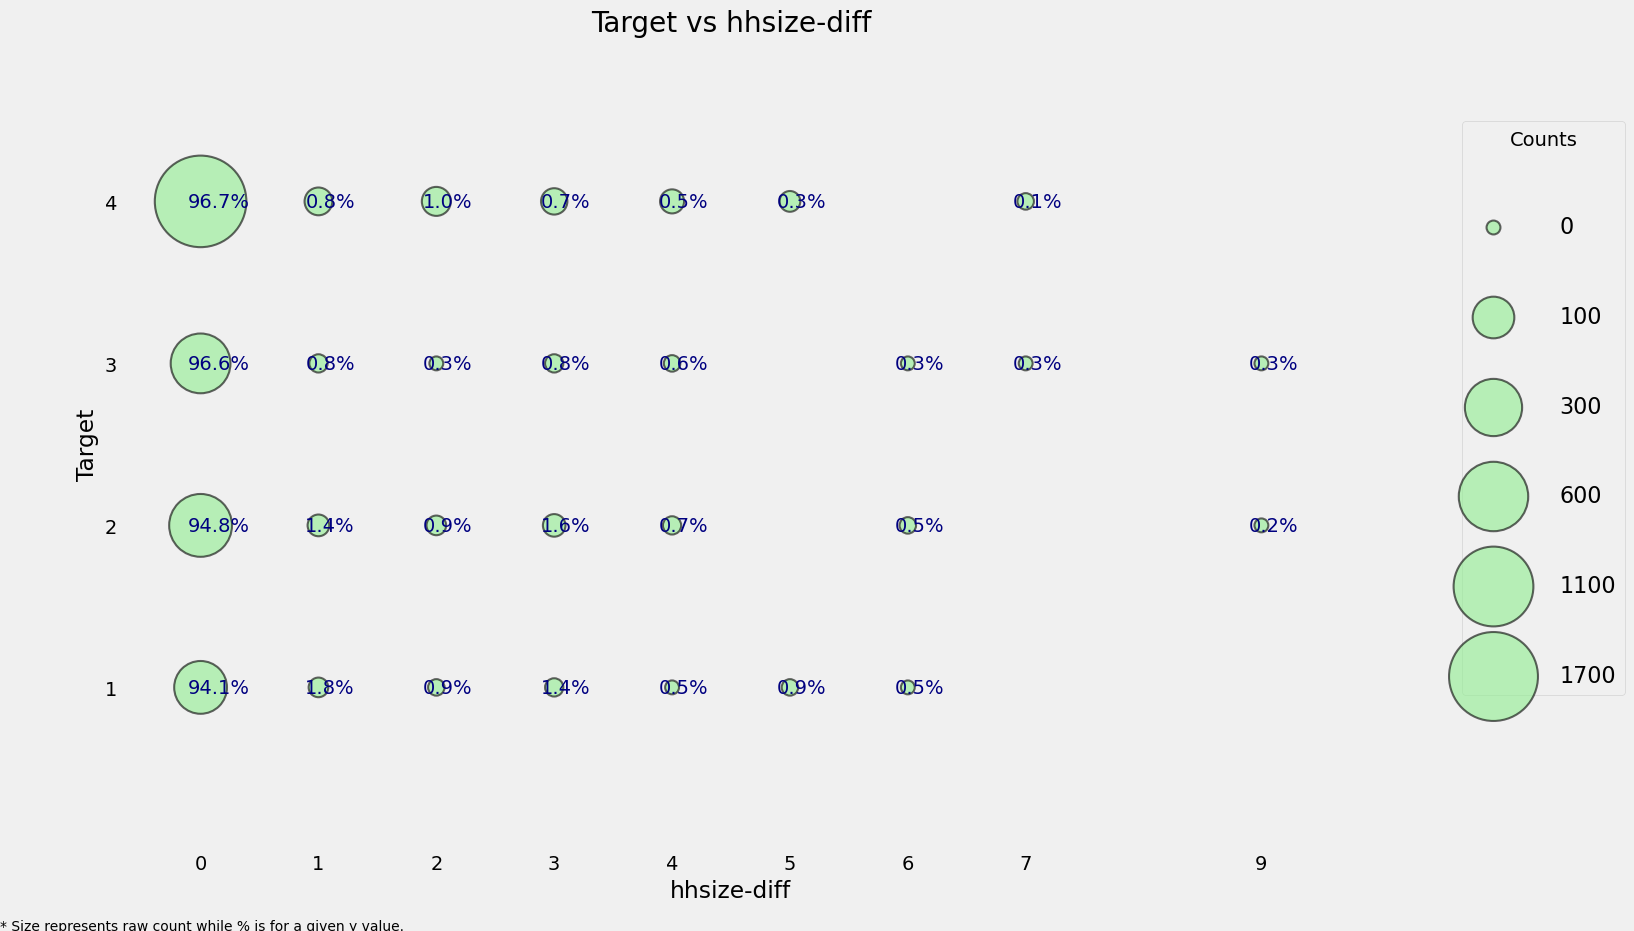

In [48]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

Even though most households do not have a difference, there are a few that have more people living in the household than are members of the household.

Let's move on to the other redundant variables. First we can look at `coopele`

In [49]:
corr_matrix.loc[corr_matrix['coopele'].abs()>0.9, corr_matrix['coopele'].abs()>0.9]

public   coopele
public   1.000000 -0.967759
coopele -0.967759  1.000000

These variables indicate where the electricity in the home is coming from. There are four options, and the families that don't have one of these two options either have no electricity (`noelec`) or get it from a private plant (`planpri`).

#### Creating Ordinal Variable
I'm going to compress these four variables into one by creating an ordinal variable. I'm going to choose the mapping myself, based on the data decriptions:  
  
`0: No electricity`  
`1: Electricity from cooperative`  
`2: Electricity from CNFL, ICA, ESPH/JASEC`  
`3: Electricity from private plant`  
  
An ordered variable has an inherent ordering, and for this we choose our own based on the domain knowledge. After we create this new ordered variable, we can drop the four others. There are several households that do not have a variable here, so we will use a `nan` (which will be filled in during imputation) and add a Boolean column indicating there was no measure for this variable.  
  
#### DeepL 번역
서수 변수를 생성하여 이 네 가지 변수를 하나로 압축하겠습니다. 데이터 설명에 따라 매핑을 직접 선택하겠습니다:  
  
`0: 전기 없음`  
`1: cooperative의 전기`  
`2: CNFL, ICA, ESPH/JASEC의 전기`  
`3: 민간 발전소의 전기`  
  
정렬된 변수는 고유한 순서를 가지며, 이를 위해 도메인 지식을 기반으로 자체적으로 순서를 선택합니다. 이 새로운 정렬 변수를 생성한 후에는 다른 네 개의 변수를 삭제할 수 있습니다. 여기에는 변수가 없는 가구가 여러 개 있으므로 `nan`(대입 중에 채워질 것임)을 사용하고 이 변수에 대한 측정값이 없음을 나타내는 부울 열을 추가합니다.

In [50]:
elec = []

## Assign values
for i, row in heads.iterrows():
    if row['noelec']==1:
        elec.append(0)
    elif row['coopele']==1:
        elec.append(1)
    elif row['public']==1:
        elec.append(2)
    elif row['planpri']==1:
        elec.append(3)
    else:
        elec.append(np.nan)

## Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()
## head = heads.drop(columns=['noelec', 'coopele', 'public', 'planpri'])   

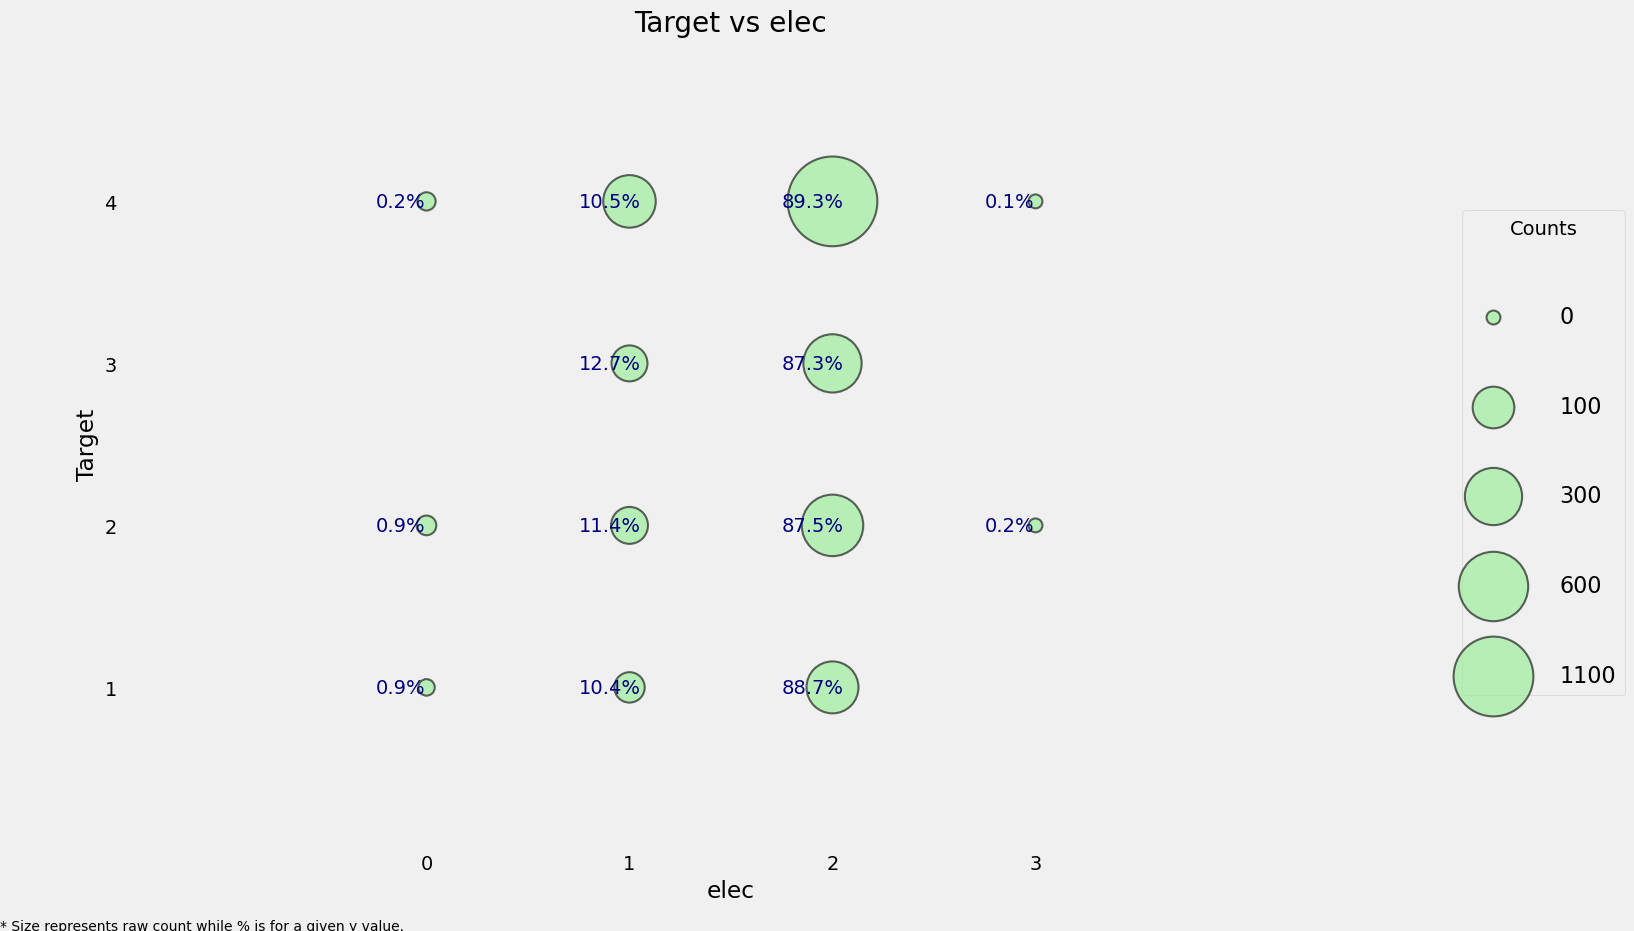

In [51]:
plot_categoricals('elec', 'Target', heads)

We can see that for every value of the Target, the most common source of electricity is from one of the listed providers.  
  
The final redundant column is `area2`. This means the house is in a rural zone, but it's redundant because we have a column indicating if the house is in a urban zone. Therefore, we can drop this column.
  
__DeepL 번역__  
Target의 모든 값에 대해 가장 일반적인 전력 공급원은 나열된 공급업체 중 하나라는 것을 알 수 있습니다.  
  
마지막 중복 열은 'area2'입니다. 이는 집이 시골 지역에 있다는 것을 의미하지만, 집이 도시 지역에 있는지를 나타내는 열이 있기 때문에 중복됩니다. 따라서 이 열을 삭제할 수 있습니다.

In [52]:
heads = heads.drop(columns='area2')

heads.groupby('area1')['Target'].value_counts(normalize=True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: proportion, dtype: float64

It seems like households in an urban area (value of 1) are more likely to have lower poverty levels than households in a rural area (value of 0).  
  
### Creating Ordinal Variables
For the walls, roof, and floor of the house, there are three columns each: the first indicating 'bad', the second 'regular', and the third 'good'. We could leave the variables as booleans, but to me it makes more sense to turn them into ordinal variables because there is an inherent order: `bad < regular < good`. To do this, we can simply find whichever column is non-zero for each household using `np.argmax`.  
  
Once we have created the ordinal variable, we are able to drop the original variables.  
  
### DeepL 번역
도시 지역(값 1)의 가구가 농촌 지역(값 0)의 가구보다 빈곤 수준이 낮을 가능성이 더 높은 것으로 보입니다.  
  
### 서수 변수 만들기
집의 벽, 지붕, 바닥에 대해 각각 세 개의 열이 있는데, 첫 번째 열은 '나쁨', 두 번째 열은 '보통', 세 번째 열은 '좋음'을 나타냅니다. 변수를 부울로 남겨둘 수도 있지만, 나쁜 <일반 <좋은 순서가 내재되어 있기 때문에 서수 변수로 바꾸는 것이 더 합리적입니다. 이렇게 하려면 np.argmax를 사용하여 각 가구에서 0이 아닌 열을 간단히 찾을 수 있습니다.  
  
서수 변수를 생성한 후에는 원래 변수를 삭제할 수 있습니다.

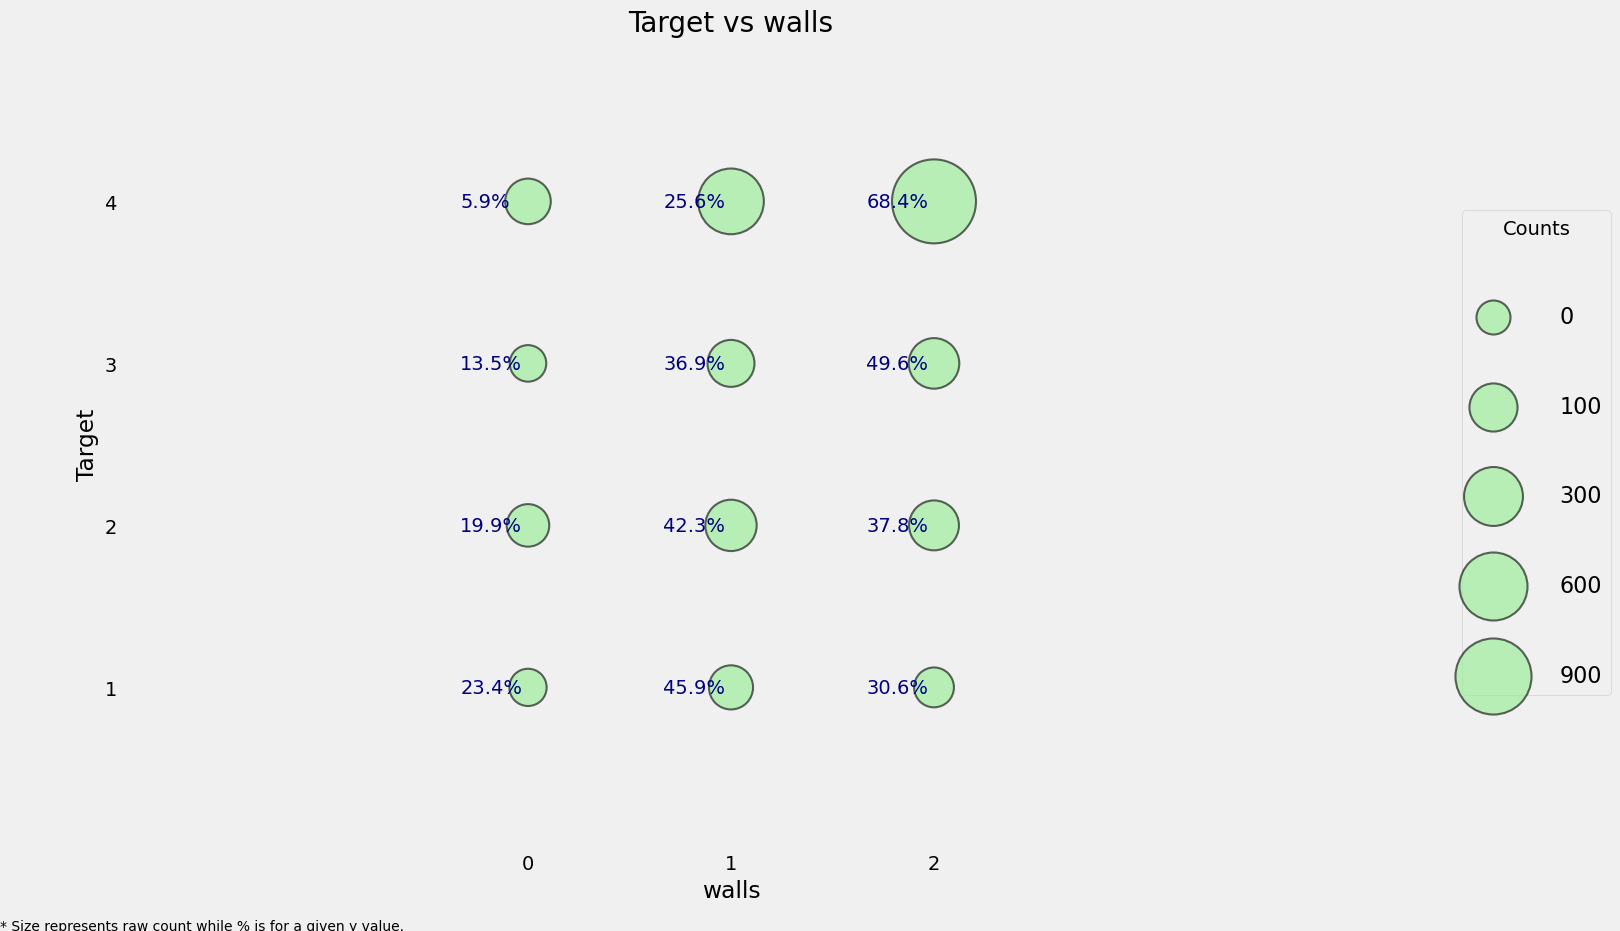

In [53]:
## Wall ordinal variable
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),
                           axis=1)

## heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])
plot_categoricals('walls', 'Target', heads)

In [54]:
## Roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                          axis=1)
heads = heads.drop(columns=['etecho1', 'etecho2', 'etecho3'])

## Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis=1)
## heads = heads.drop(columns = ['eviv1'], 'eviv2', 'eviv3'])

### Feature Construction

In addition to mapping variables to ordinal features, we can also create entirely new features from the existing data, known as feature construction. For example, we can add up the previous three features we just created to get an overall measure of the quality of the house's structure.  
  
### DeepL 번역
변수를 서수형 특징에 매핑하는 것 외에도 기존 데이터에서 완전히 새로운 특징을 만들 수 있는데, 이를 특징 구성이라고 합니다. 예를 들어, 방금 만든 세 가지 특징을 합산하여 집의 구조 품질에 대한 전반적인 측정값을 얻을 수 있습니다.

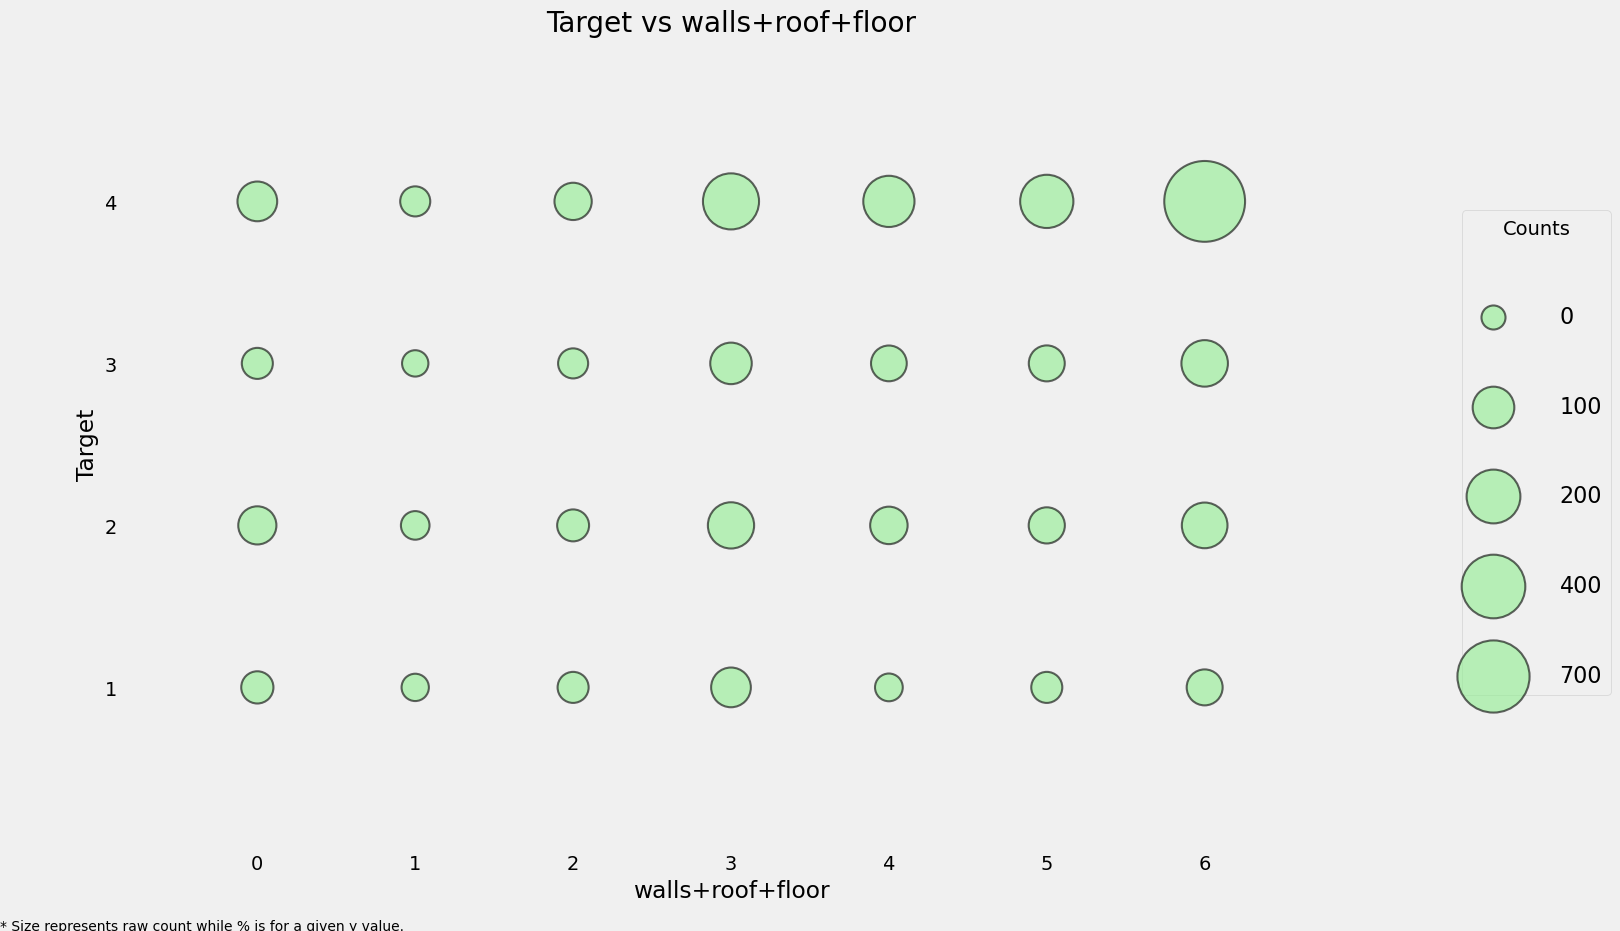

In [55]:
## Create new feature
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']
# heads['walls+roof+floor'] = heads[['walls', 'roof', 'floor']].sum(axis=1) # 이렇게 해도 된다.

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)

This new feature may be useful because it seems like a Target of 4 (the lowest poverty level) tends to have higher values of the 'house quality' variable. We can also look at this in a table to get the fine-grained details.  
  
__DeepL 번역__  
이 새로운 기능은 목표가 4(최저 빈곤 수준)인 경우 '주택 품질' 변수의 값이 더 높은 경향이 있기 때문에 유용할 수 있습니다. 또한 이를 표로 표시하여 세분화된 세부 정보를 얻을 수도 있습니다.

In [56]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize=True)).rename(columns={'Target': 'Normalized Count'}).reset_index()
counts.head()

walls+roof+floor  Target  proportion
0                 0     4.0    0.376404
1                 0     2.0    0.320225
2                 0     1.0    0.162921
3                 0     3.0    0.140449
4                 1     4.0    0.323529

The next variable will be a `warning` about the quality of the house. It will be a negative value, with -1 point each for no toilet, electricity, floor, water service, and ceiling.  
  
__DeepL 번역__  
다음 변수는 집의 품질에 대한 `warning`입니다. 화장실, 전기, 바닥, 수도, 천장이 없는 경우 각각 -1점의 음수 값으로 표시됩니다.

In [57]:
## No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1']+
                        (heads['elec']==0)+
                         heads['pisonotiene']+
                         heads['abastaguano']+
                         (heads['cielorazo']==0))

We can keep using our `plot_categoricals` function to visualize these relationships, but `seaborn` also has a number of plotting options that can work with categoricals. One is the `violinplot` which shows the distribution of a variable on the y axis with the width of each plot showing the number of observations in that category.  
  
__DeepL 번역__  
이러한 관계를 시각화하기 위해 `plot_categoricals` 함수를 계속 사용할 수 있지만, `seaborn`에는 범주형에 사용할 수 있는 여러 가지 플롯 옵션도 있습니다. 그 중 하나는 `violinplot`으로, 각 플롯의 너비가 해당 범주의 관측 횟수를 나타내는 Y축에 변수의 분포를 표시합니다.

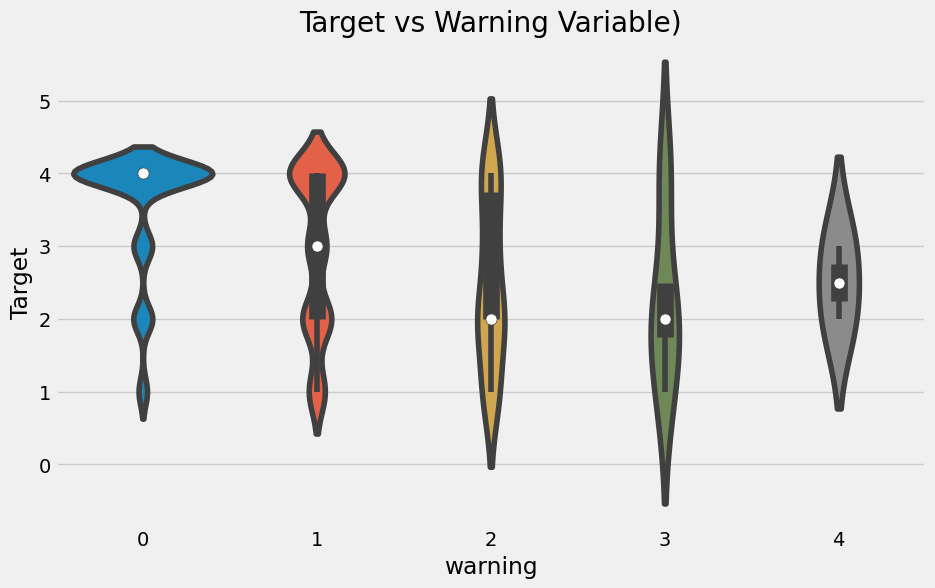

In [58]:
plt.figure(figsize=(10,6))
sns.violinplot(x='warning', y='Target', data=heads)
plt.title('Target vs Warning Variable)');

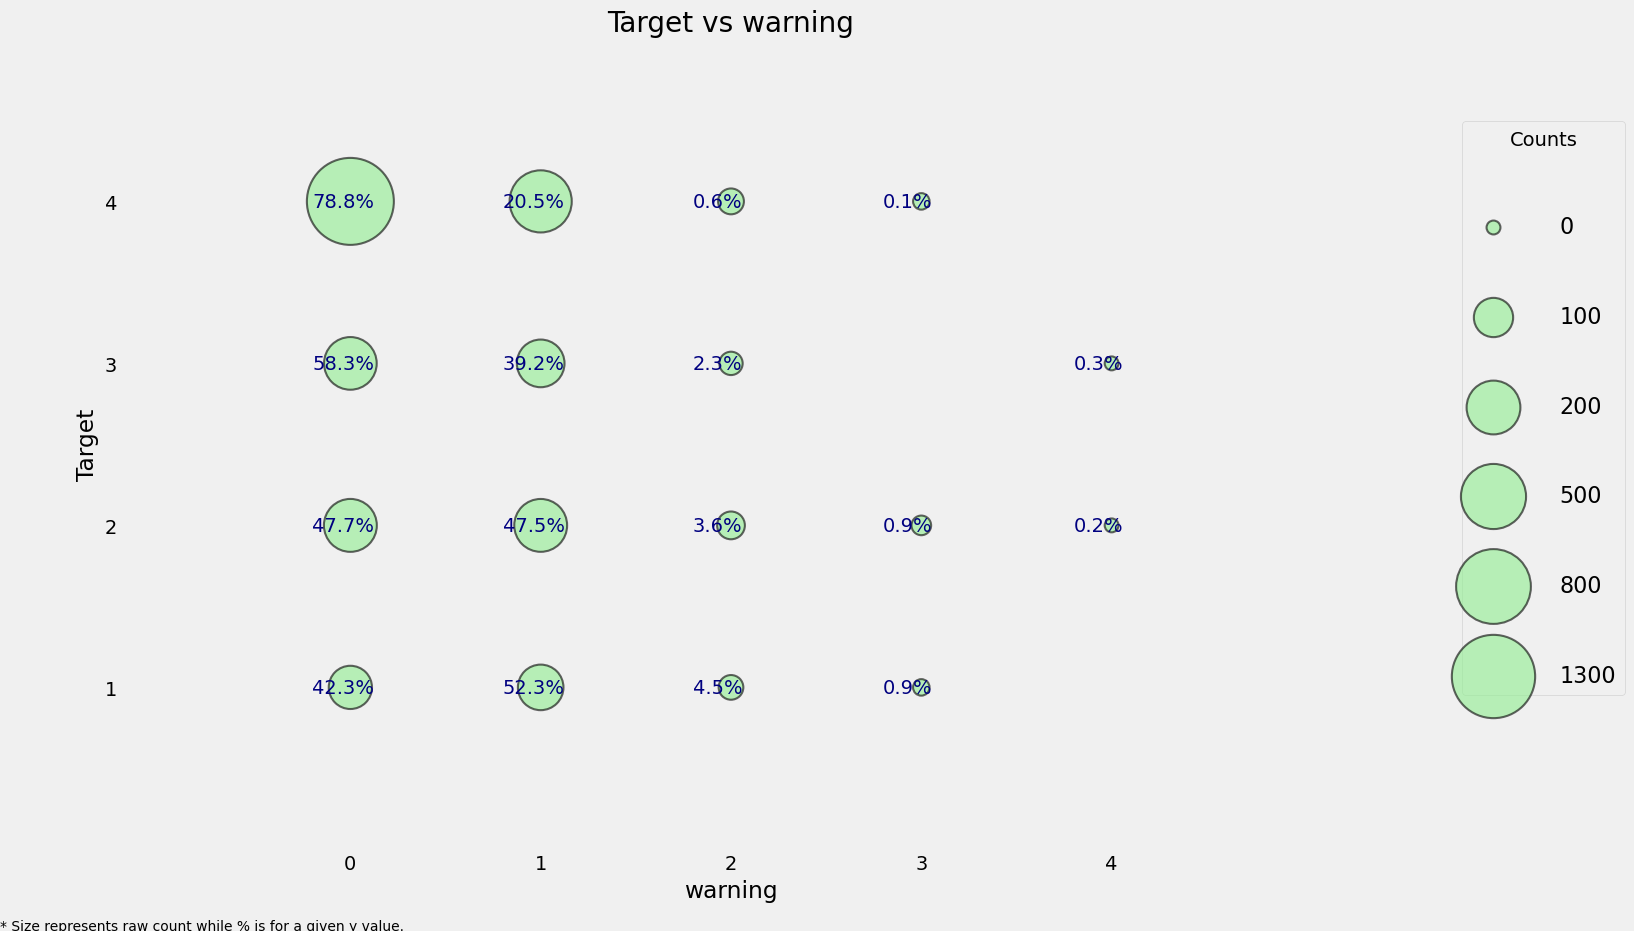

In [59]:
plot_categoricals('warning', 'Target', data=heads)

The violinplot is not great here because it smooths out the categorical variable with the effect that it looks as if the Target can take on lesser and greater values than in reality. Nonetheless, we can see a high concentration of households that have no warning signs and have the lowest level of poverty. It looks as if this may be a useful feature, but we can't know for sure until we get to modeling!  
  
The final household feature we can make for now is a `bonus` where a family gets a point for having a refrigerator, computer, tablet, or television.  
  
__DeepL 번역__  
바이올린 플롯은 범주형 변수를 평활화하여 목표가 실제보다 작거나 큰 값을 가질 수 있는 것처럼 보이게 하는 효과가 있기 때문에 여기서 그다지 좋은 방법은 아닙니다. 그럼에도 불구하고 경고 신호가 없고 빈곤 수준이 가장 낮은 가구가 집중되어 있는 것을 볼 수 있습니다. 이 기능이 유용한 기능인 것처럼 보이지만 모델링을 해봐야 확실히 알 수 있습니다!  
  
마지막 household 피쳐로 우리는 이제 `bonus`로써 냉장고, 컴퓨터, 태블릿 또는 TV를 보유한 가구에 점수를 부여할 수 있습니다.

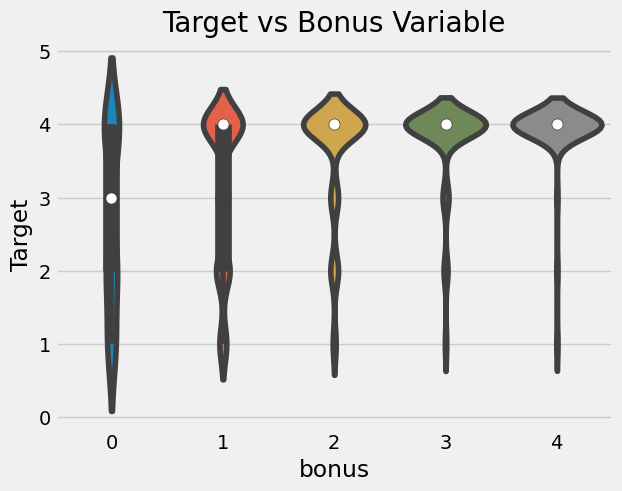

In [60]:
## Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1*(heads['refrig']+
                    heads['computer']+
                    (heads['v18q1']>0)+
                    heads['television'])

sns.violinplot(data=heads, x='bonus', y='Target',
               figsize=(10,6))
plt.title('Target vs Bonus Variable');

### Per Capita Features
Additional features we can make calculate the number of certain measurements for each person in the house hold.

In [61]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

### Exploring Household Variables
After going to all the trouble of getting our features in order, now we can take a look at them in relation to the Target. We've already done a little of this, but now we can try to quantify relationships.  
  
__Measuring Relationships__  
There are many ways for measuring relationships between two variables. Here we will examine two of these: 
  
1. The Pearson Correlation: from -1 to 1 measuring the linear relationship between two variables
2. The Spearman Correlation: from -1 to 1 measuring the monotonic relationship between two variables
  
The Spearman correlation is 1 if as one variable increases, the other does as well, even if the relationship is not linear. On the other hand, the Pearson correlation can only be one if the increase is exactly linear. These are best illustrated by example.  
  
### DeepL 번역

In [62]:
from scipy.stats import spearmanr

In [63]:
def plot_corrs(x, y):
    """Plot data and show the spearman and pearson correlation."""

    ## Calculate coreelations
    spr = spearmanr(x, y).correlation
    pcr = np.corrcoef(x, y)[0, 1]

    ## Scatter plot
    data = pd.DataFrame({'x': x, 'y': y})
    plt. figure(figsize=(6,4))
    sns.regplot(data=data, x='x', y='y', fit_reg=False)
    plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');

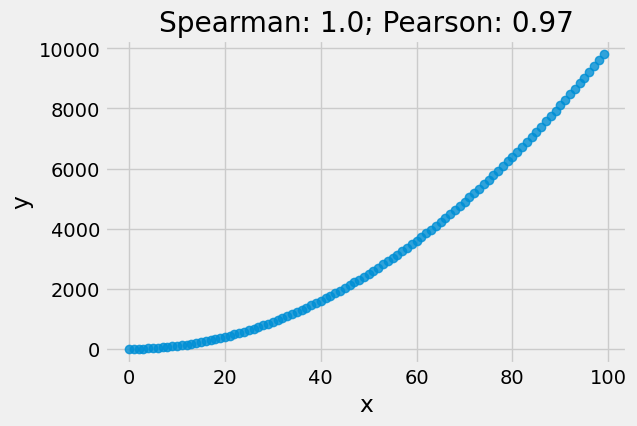

In [64]:
x = np.array(range(100))
y = x**2

plot_corrs(x, y)

The Spearman correlation is often considered to be better for ordinal variables such as the Target or the years of education. Most relationshisp in the real world aren't linear, and although the Pearson correlation can be an approximation of how related two variables are, it's inexact and not the best method of comparison.  
  
__DeepL 번역__  

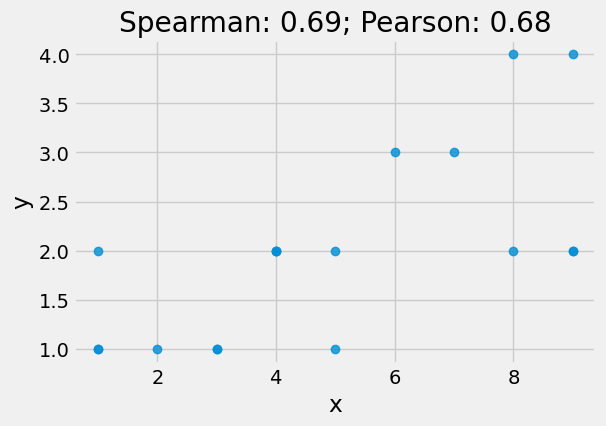

In [65]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

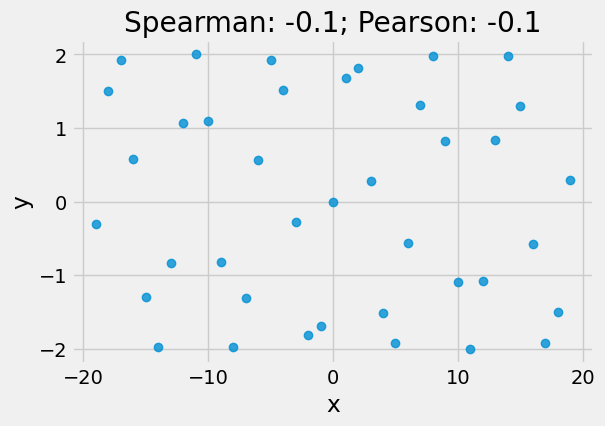

In [66]:
x = np.array(range(-19, 20))
y = 2 * np.sin(x)

plot_corrs(x, y)

In [67]:
## First, we'll calculate the Pearson correlation of every variable with the Target.

## Use only training data
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr(numeric_only=True)['Target'].sort_values()).rename(columns={'Target': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns={'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

Most positively correlated variables:
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000


For the negative correlations, as we increase the variable, the Target decreases indicating the poverty severity increases. Therefore, as the warning increases, the poverty level also increases which makes sense because this was meant to show potential bad signs about a house. The hogar_nin is the number of children 0 - 19 in the family which also makes sense: younger children can be financial source of stress on a family leading to higher levels of poverty. Or, families with lower socioeconomic status have more children in the hopes that one of them will be able to succeed. Whatever the explanation, there is a [real link between family size and poverty](https://www.adb.org/sites/default/files/publication/157217/adbi-rp68.pdf)  
  
On the other hand, for the positive correlations, a higher value means a higher value of Target indicating the poverty severity decreases. The most highly correlated household level variable is meaneduc, the average education level of the adults in the household. This relationship between education and poverty intuitively makes sense: [greater levels of education generally correlate with lower levels of poverty](https://www.childfund.org/poverty-and-education/). We don't necessarily know which causes which, but we do know these tend to move in the same direction.  
  
The general guidelines for correlation values are below, but these will change depending on who you ask ([source](https://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) for these):
  
- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”
  
What these correlations show is that there are some weak relationships that hopefully our model will be able to use to learn a mapping from the features to the Target.  
  
Now we can move on to the Spearman correlation.  
  
__DeepL 번역__  
음의 상관관계의 경우, 변수가 증가하면 목표가 감소하여 빈곤의 심각성이 증가함을 나타냅니다. 따라서 경고가 증가함에 따라 빈곤 수준도 증가하는데, 이는 집에 대한 잠재적인 나쁜 징후를 보여주기 위한 것이므로 의미가 있습니다. 호가_닌은 가족 내 0~19세 자녀 수로, 어린 자녀가 많을수록 가족의 경제적 스트레스가 커져 빈곤 수준이 높아질 수 있다는 점에서 의미가 있습니다. 또는 사회경제적 지위가 낮은 가정에서는 자녀 중 한 명이 성공할 수 있기를 바라며 더 많은 자녀를 낳을 수도 있습니다. 설명이 무엇이든, [가족 규모와 빈곤 사이에는 실제 연관성](https://www.adb.org/sites/default/files/publication/157217/adbi-rp68.pdf)이 있습니다.  
  
반면에 양의 상관관계의 경우, 값이 높을수록 빈곤의 심각성이 감소함을 나타내는 목표 값이 높다는 것을 의미합니다. 가장 상관관계가 높은 가구 수준 변수는 가구 내 성인의 평균 교육 수준인 평균 학력입니다. 교육 수준과 빈곤의 관계는 직관적으로 이해할 수 있습니다: [일반적으로 교육 수준이 높을수록 빈곤 수준이 낮습니다](https://www.childfund.org/poverty-and-education/). 어떤 것이 어떤 원인인지는 정확히 알 수 없지만, 같은 방향으로 움직이는 경향이 있다는 것은 알 수 있습니다.  
  
상관관계 값에 대한 일반적인 가이드라인은 아래와 같지만, 질문하는 사람에 따라 달라질 수 있습니다([출처](https://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) 참조):
  
- .00-.19 "매우 약함"
- .20-.39 "약함"
- .40-.59 "보통"
- .60-.79 "강함"
- .80-1.0 "매우 강함"
  
이러한 상관 관계에서 알 수 있는 것은 모델이 기능에서 Target으로의 매핑을 학습하는 데 사용할 수 있는 몇 가지 약한 관계가 있다는 것입니다.  
  
이제 스피어만 상관관계로 넘어가겠습니다.

In [68]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

feats = []
scorr = []
pvalues = []

## Iterate through each column
for c in heads:
    ## Only valid for numbers
    if heads[c].dtype != 'object':
        feats.append(c)

        ## Calculate spearman correlation
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

The Spearman correlation coefficient calculation also comes with a pvalue indicating the significance level of the relationship. Any pvalue less than 0.05 is genearally regarded as significant, although since we are doing multiple comparisons, we want to divide the p-value by the number of comparisons, a process known as the Bonferroni correction.  
  
__DeepL 번역__  
스피어만 상관관계 계수 계산에는 관계의 유의 수준을 나타내는 p값도 함께 제공됩니다. 일반적으로 0.05 미만의 p값은 유의미한 것으로 간주되지만, 여러 비교를 수행하기 때문에 본페로니 보정이라고 하는 과정을 통해 p값을 비교 수로 나누고자 합니다.

In [69]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


In [70]:
## For the most part, the two methods of calculating correlations are in agreement. 
## Just out of curiousity, we can look for the values that are furthest apart.

corrs = pcorrs.merge(scorrs, on='feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

feature     pcorr     scorr        pvalue      diff
77    rooms-per-capita  0.152185  0.223303  6.521453e-35 -0.071119
85               v18q1  0.197493  0.244200  1.282664e-41 -0.046708
87  tablets-per-capita  0.204638  0.248642  3.951568e-43 -0.044004
2                 r4t1 -0.260917 -0.219226  1.112230e-33 -0.041691
97   phones-per-capita  0.299026  0.337377  4.760104e-80 -0.038351

In [71]:
corrs.sort_values('diff').dropna().tail()

feature     pcorr     scorr        pvalue      diff
57    techozinc  0.014357  0.003404  8.528369e-01  0.010954
49  hogar_mayor -0.025173 -0.041722  2.290994e-02  0.016549
88       edjefe  0.235687  0.214736  2.367521e-32  0.020951
66       edjefa  0.052310  0.005114  7.804715e-01  0.047197
17   dependency -0.126465 -0.281516  2.792620e-55  0.155051

The largest discrepancy in the correlations is `dependency`. We can make a scatterplot of the `Target` versus the `dependency` to visualize the relationship. We'll add a little jitter to the plot because these are both discrete variables.  
  
__DeeL 번역__  
상관관계에서 가장 큰 불일치는 `dependency`입니다. 관계를 시각화하기 위해 `Target` 대 `dependency`의 산점도를 만들 수 있습니다. 이 두 변수는 불연속형 변수이므로 플롯에 약간의 지터를 추가하겠습니다.

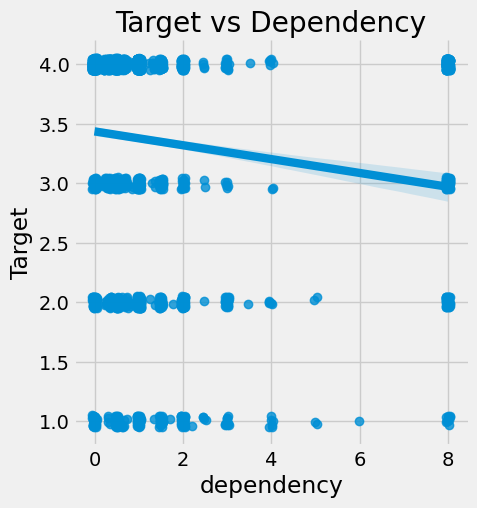

In [72]:
sns.lmplot(data=train_heads, x='dependency', y='Target', fit_reg=True, x_jitter=0.05, y_jitter=0.05)
plt.title('Target vs Dependency');

It's hard to see the relationship, but it's slightly negative: as the `dependency` increases, the value of the `Target` decreases. This makes sense: the `dependency` is the number of dependent individuals divided by the number of non-dependents. As we increase this value, the poverty severty tends to increase: having more dependent family members (who usually are non-working) leads to higher levels of poverty because they must be supported by the non-dependent family members.  
  
__DeepL 번역__  
'dependency'가 증가하면 'Target'의 값은 감소하는 약간 음의 관계입니다. 'dependency'는 부양 가족의 수를 비부양 가족의 수로 나눈 값입니다. 이 값이 증가하면 빈곤 심각도가 증가하는 경향이 있습니다. 부양 가족 구성원(일반적으로 비근로자)이 많으면 비부양 가족 구성원의 부양을 받아야 하기 때문에 빈곤 수준이 높아집니다.

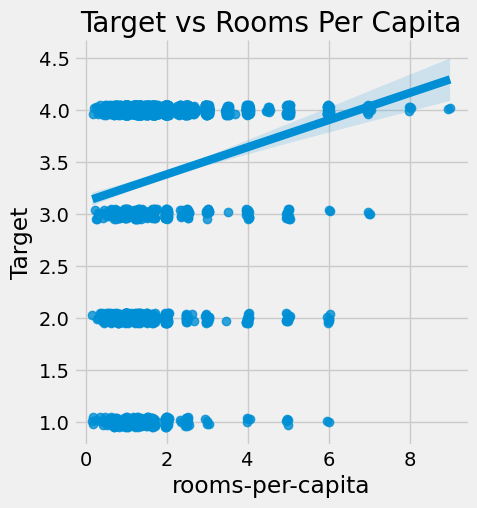

In [73]:
sns.lmplot(x='rooms-per-capita', y='Target', fit_reg=True, data=train_heads, x_jitter=0.05, y_jitter=0.05)
plt.title('Target vs Rooms Per Capita');

__Correlation Heatmap__  
One of my favorite plots is the correlation heatmap because it shows a ton of info in one image. For the heatmap, we'll pick 7 variables and show the correlations between themselves and with the target.  
  
__DeepL 번역__  
제가 가장 좋아하는 플롯 중 하나는 상관관계 히트맵으로, 하나의 이미지에 많은 정보를 보여주기 때문입니다. 이 히트맵에서는 7개의 변수를 선택하고 변수 간의 상관관계와 대상과의 상관관계를 표시하겠습니다.

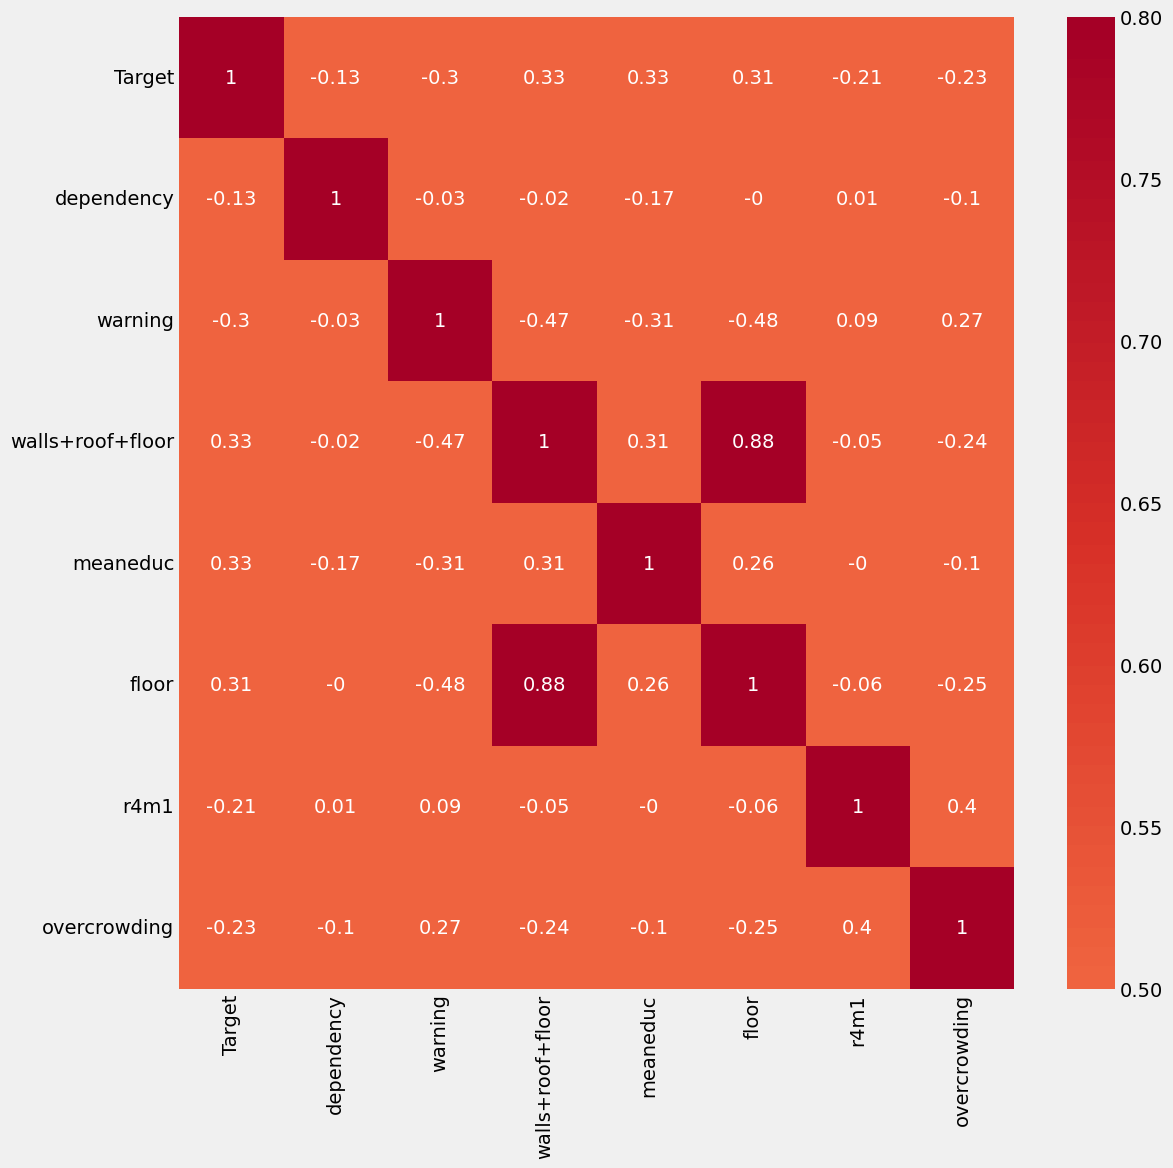

In [74]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc', 'floor', 'r4m1', 'overcrowding']

## Calculate the correlations
corr_mat = train_heads[variables].corr().round(2)

## Draw a correlation heatmap
# plt.rcParams['font.size'] = 18
plt.figure(figsize=(12, 12))
sns.heatmap(corr_mat, vmin=0.5, vmax=0.8, center=0, cmap=plt.cm.RdYlGn_r, annot=True);
# 색이 다르게 나오는데 방법을 찾지 못함

This plot shows us that there are a number of variables that have a weak correlation with the `Target`. There are also high correlations between some variables (such as `floor` and `walls+roof+floor`) which could pose an issue because of collinearity.  
  
### Features Plot
For the final exploration of the household level data, we can make a plot of some of the most correlated variables with the Target. This shows scatterplots on the upper triangle, kernel density estimate (kde) plots on the diagonal, and 2D KDE plots on the lower triangle.  
  
__DeepL 번역__  
이 플롯은 `Target`과 상관관계가 약한 변수가 많다는 것을 보여줍니다. 또한 일부 변수(예: `floor` 및 `walls+roof+floor`) 간에는 상관관계가 높아 상관관계로 인해 문제가 될 수 있습니다.  
  
### Features Plot
가구 수준 데이터의 최종 탐색을 위해 타겟과 가장 상관관계가 높은 몇 가지 변수를 플롯으로 만들 수 있습니다. 위쪽 삼각형에는 산점도가, 대각선에는 커널 밀도 추정치(KDE) 플롯이, 아래쪽 삼각형에는 2D KDE 플롯이 표시됩니다.

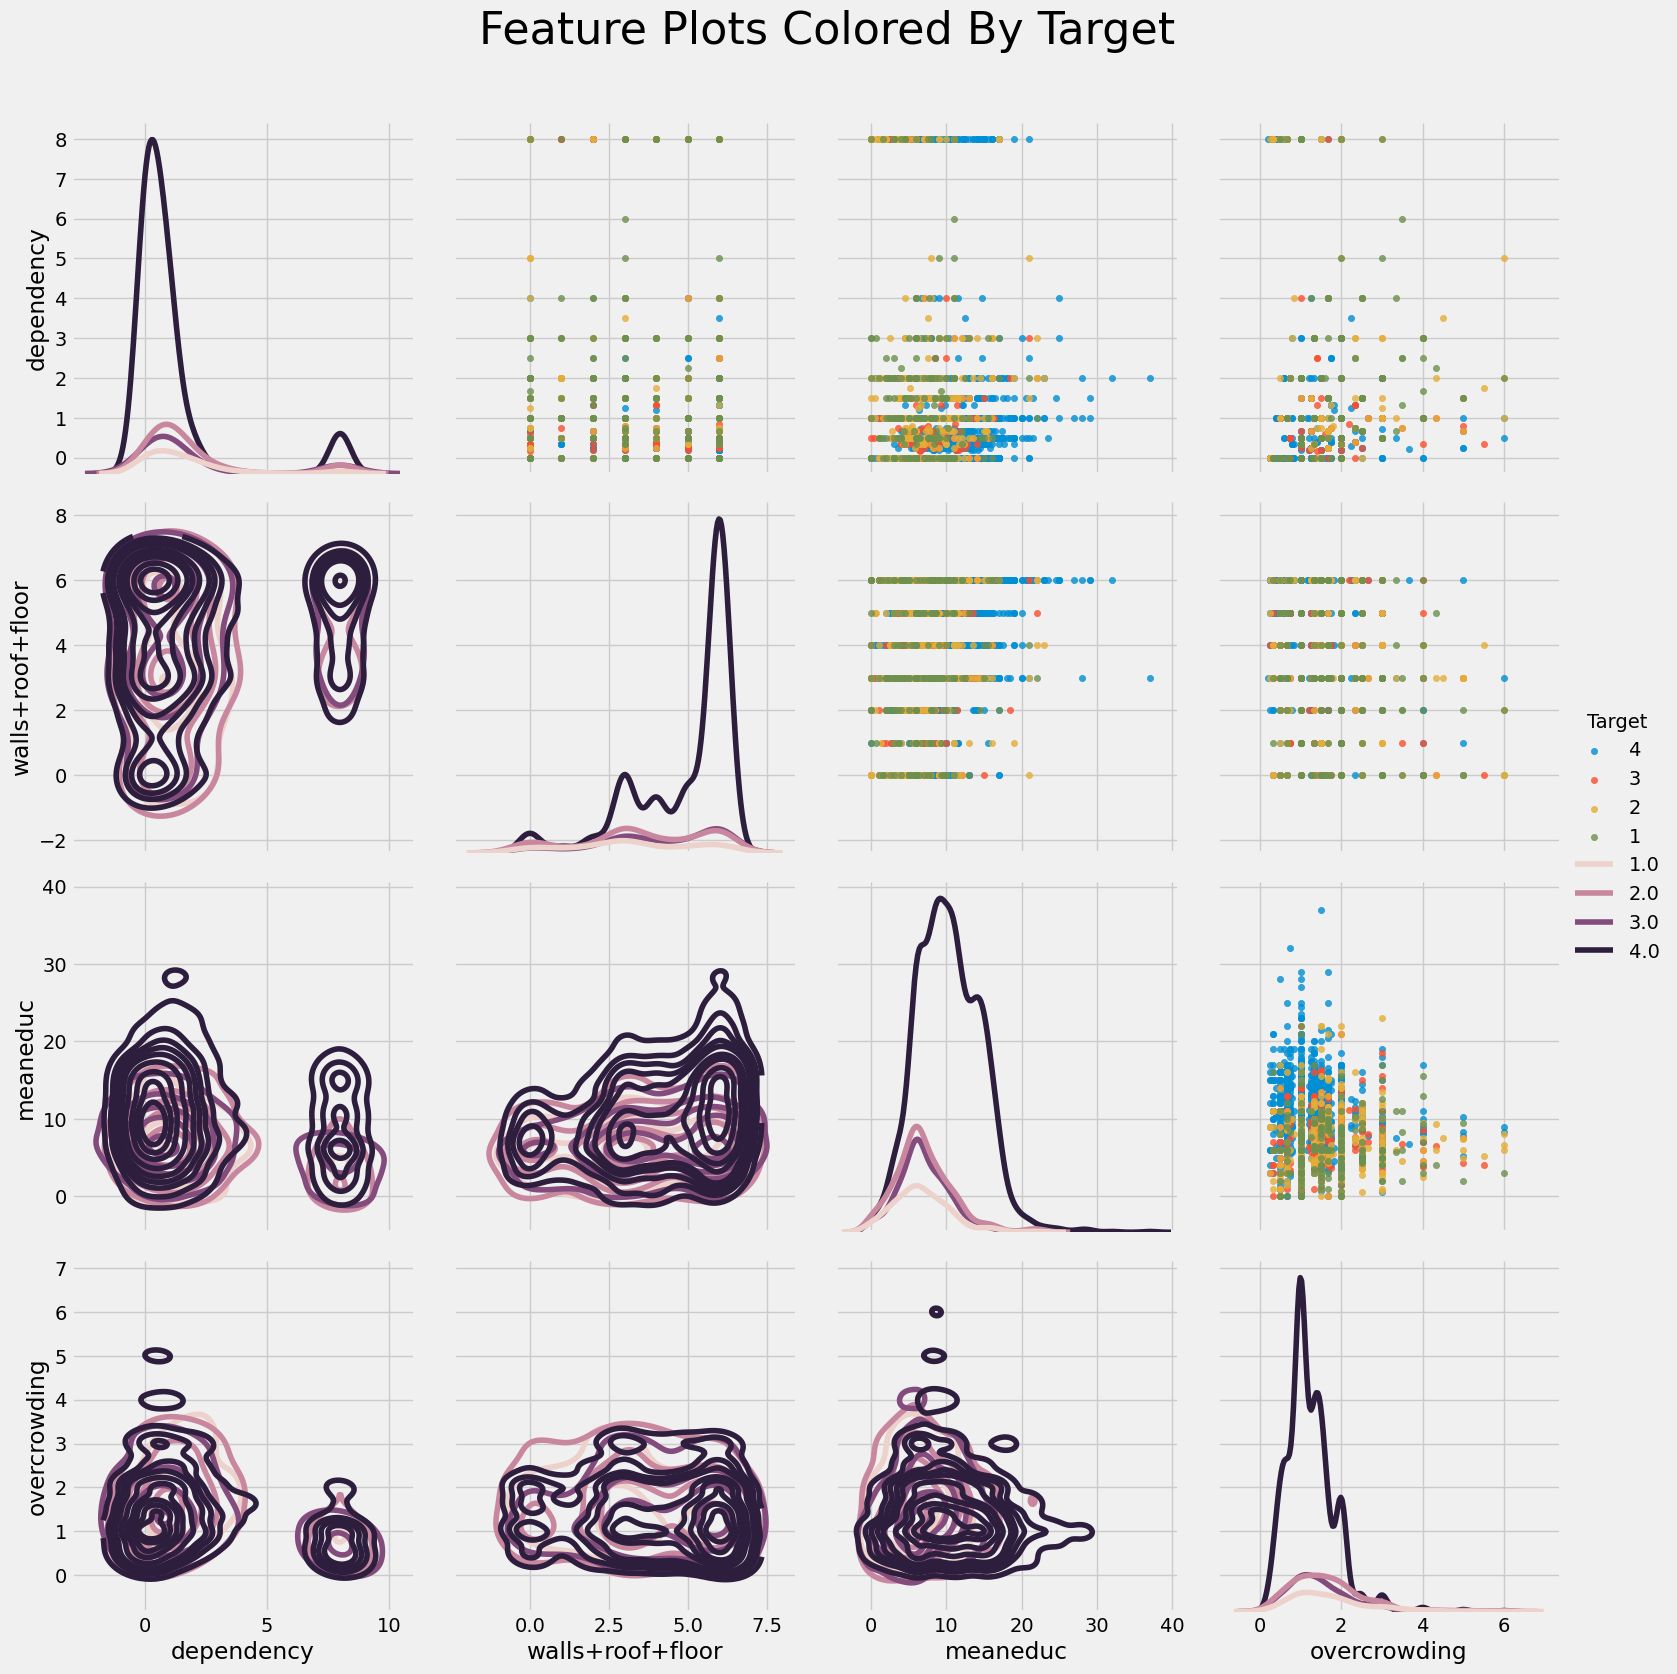

In [75]:
import warnings

warnings.filterwarnings('ignore')

## Copy the data for plotting
plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor', 'meaneduc', 'overcrowding']]

## Create the pairgrid object
grid = sns.PairGrid(data=plot_data, height=4, diag_sharey=False, hue='Target', hue_order=[4,3,2,1],
                    vars=[x for x in list(plot_data.columns) if x != 'Target'])

## Upper is a scatter plot
grid.map_upper(plt.scatter, alpha=0.8, s=20)

## Diagnal is a histogram
grid.map_diag(sns.kdeplot)

## Bottom is density plot
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size=32, y=1.05);

# 색과 값 등이 많이 다른데 해결하지 못함

In [76]:
# We'll leave the feature engineering of the household variables for now.
# Later, we can come back to this step if we are not pleased with the model performance.

household_feats = list(heads.columns)

## Individual Level Variables
There are two types of individual level variables: Boolean (1 or 0 for True or False) and ordinal (discrete values with a meaningful ordering).

In [77]:
ind = data[id_+ind_bool+ind_ordered]
ind.shape

(33413, 40)

### Redundant Individual Variables
We can do the same process we did with the household level variables to identify any redundant individual variables. We'll focus on any variables that have an absolute magnitude of the correlation coefficient greater than 0.95.  
  
### DeepL 번역
가구 수준 변수와 동일한 프로세스를 수행하여 중복되는 개별 변수를 식별할 수 있습니다. 상관 계수의 절대 크기가 0.95보다 큰 모든 변수에 초점을 맞출 것입니다.

In [78]:
## Create correlation matrix
corr_matrix = ind.corr(numeric_only=True)

## Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

## Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]

to_drop

['female']

In [79]:
ind = ind.drop(columns='male')

### Creating Ordinal Variables
Much as we did with the household level data, we can map existing columns to an ordinal variable. Here we will focus on the `instlevel_` variables which indicate the amount of education an individual has from `instlevel1`: no level of education to `instlevel9`: postgraduate education.  
  
To create the ordinal variable, for each individual, we will simply find which column is non-zero. The education has an inherent ordering (higher is better) so this conversion to an ordinal variable makes sense in the problem context.  
  
### DeepL 번역
가구 수준 데이터에서 했던 것과 마찬가지로 기존 열을 서수 변수에 매핑할 수 있습니다. 여기서는 개인의 교육 수준을 나타내는 `instlevel_` 변수에 초점을 맞추겠습니다. `instlevel1`: 무학에서 `instlevel9`: 대학원 교육까지 교육 수준을 나타냅니다.  
  
서수 변수를 만들려면 각 개인에 대해 어떤 열이 0이 아닌지 찾으면 됩니다. 교육에는 고유한 순서(높을수록 좋음)가 있으므로 이러한 서수 변수로의 변환은 문제 맥락에서 의미가 있습니다.

In [80]:
ind[[c for c in ind if c.startswith('instl')]].head()

instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
0           0           0           0           1           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           1           0   
3           0           0           0           1           0           0   
4           0           0           0           0           1           0   

   instlevel7  instlevel8  instlevel9  
0           0           0           0  
1           0           1           0  
2           0           0           0  
3           0           0           0  
4           0           0           0

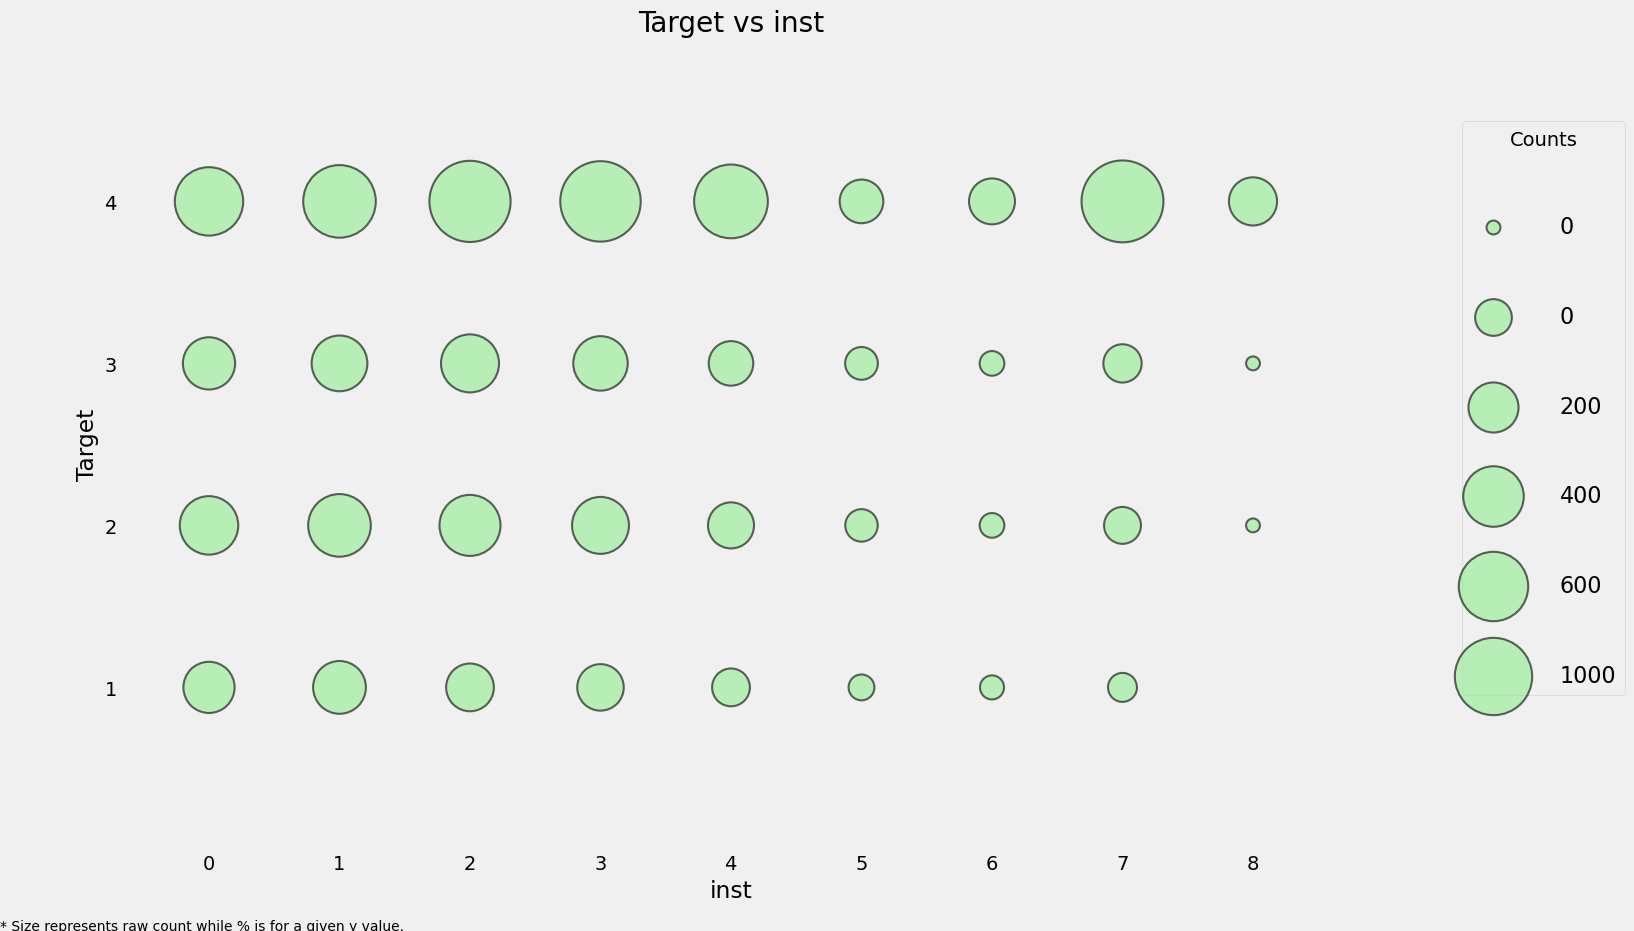

In [81]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis=1)

plot_categoricals('inst', 'Target', ind, annotate=False);

Higher levels of education seem to correspond to less extreme levels of poverty. We do need to keep in mind this is on an individual level though and we eventually will have to aggregate this data at the household level.  
  
__DeepL 번역__  
교육 수준이 높을수록 빈곤 수준이 덜 극단적인 것으로 보입니다. 하지만 이는 개인 수준이라는 점을 염두에 두어야 하며, 결국 가구 수준에서 이 데이터를 집계해야 할 것입니다.

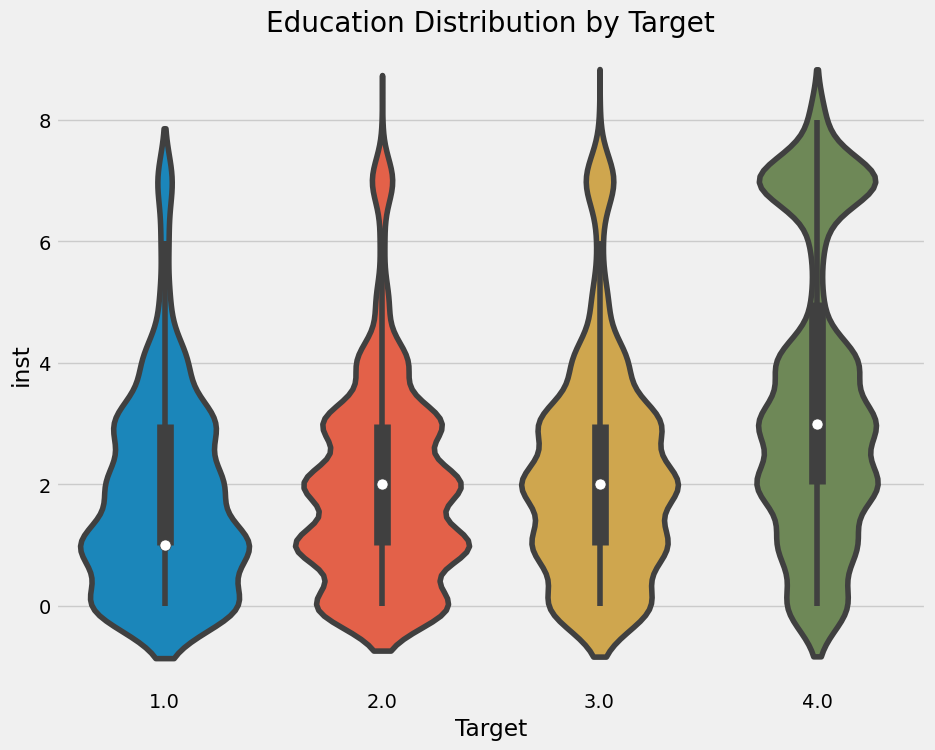

In [82]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Target', y='inst', data=ind)
plt.title('Education Distribution by Target');

In [83]:
## Drop the education columns
## ind = ind.drop(columns=[c for c in ind if c.startswith('instlevel')])
ind.shape

(33413, 40)

### Feature Construction¶
We can make a few features using the existing data. For example, we can divide the years of schooling by the age.

<Axes: xlabel='Target', ylabel='escolari/age'>

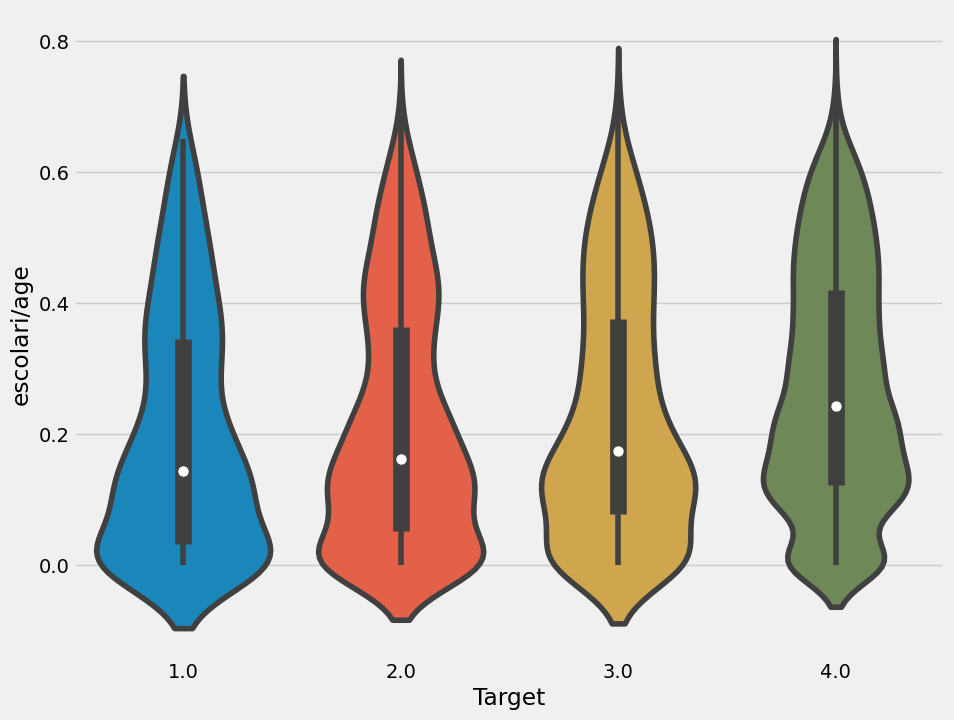

In [84]:
ind['escolari/age'] = ind['escolari']/ind['age']

plt.figure(figsize=(10,8))
sns.violinplot(x='Target', y='escolari/age', data=ind)

We can also take our new variable, `inst`, and divide this by the age. The final variable we'll name `tech`: this represents the combination of tablet and mobile phones.

In [85]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

### Feature Engineering through Aggregations
In order to incorporate the individual data into the household data, we need to aggregate it for each household. The simplest way to do this is to `groupby` the family id `idhogar` and then `agg` the data. For the aggregations for ordered or continuous variables, we can use six, five of which are built in to pandas, and one of which we define ourselves `range_`. The boolean aggregations can be the same, but this will create many redundant columns which we will then need to drop. For this case, we'll use the same aggregations and then go back and drop the redundant columns.  
  
### DeepL 번역
개별 데이터를 가구 데이터에 통합하려면 각 가구별로 데이터를 집계해야 합니다. 이를 수행하는 가장 간단한 방법은 가족 ID `idhogar`를 `groupby`한 다음 데이터를 `agg`하는 것입니다. 정렬 또는 연속형 변수에 대한 집계에는 6개를 사용할 수 있으며, 그 중 5개는 팬더에 내장되어 있고 하나는 `range_`로 정의합니다. 부울 집계는 동일할 수 있지만, 이렇게 하면 중복 열이 많이 생성되므로 삭제해야 합니다. 이 경우에는 동일한 집계를 사용한 다음 돌아가서 중복 열을 삭제하겠습니다.

In [86]:
# ind.info(verbose=2)
ind['rez_esc-missing'].unique()

array([False,  True])

In [87]:
## Define custom function
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

## Group and aggregate
# ind_agg = ind.drop(columns='Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg = ind.drop(columns=['Target', 'Id', 'rez_esc-missing']).groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                ...  inst/age  \
           min max sum count  std range_ min max sum count  ...       sum   
idhogar                                                     ...             
000a08204    1   1   3     3  0.0      0   0   0   0     3  ...  0.483333   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  ...  0.016667   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  ...  0.511959   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  ...  0.184211   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  ...  0.213768   

                                    tech                            
          count       std    range_  min max sum count  std range_  
idhogar                                                             
000a08204     3  0.139775  0.250000    2   2   6     3  0.0      0  
000bce7c4     2  0.011785  0.016667    1   1   2     2  0.0      0  
001845fb0     4  0.060123  0.128205    1   1   4     4  0.0      0  
001ff74ca     1       NaN  0.000000    2   2   4     2  0.0      0  
003123ec2     4  0.064636  0.130435    1   1   4     4  0.0      0  

[5 rows x 234 columns]

In [88]:
## With just that one line, we go from 30 features to 180. Next we can rename the columns to make it easier to keep track.

## Rename the columns
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')

ind_agg.columns = new_col
ind_agg.head()


v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count  ...  inst/age-sum  \
idhogar                                          ...                 
000a08204        0        0        0          3  ...      0.483333   
000bce7c4        0        1        1          2  ...      0.016667   
001845fb0        0        0        0          4  ...      0.511959   
001ff74ca        0        0        0          2  ...      0.184211   
003123ec2        0        0        0          4  ...      0.213768   

           inst/age-count  inst/age-std  inst/age-range_  tech-min  tech-max  \
idhogar                                                                        
000a08204               3      0.139775         0.250000         2         2   
000bce7c4               2      0.011785         0.016667         1         1   
001845fb0               4      0.060123         0.128205         1         1   
001ff74ca               1           NaN         0.000000         2         2   
003123ec2               4      0.064636         0.130435         1         1   

           tech-sum  tech-count  tech-std  tech-range_  
idhogar                                                 
000a08204         6           3       0.0            0  
000bce7c4         2           2       0.0            0  
001845fb0         4           4       0.0            0  
001ff74ca         4           2       0.0            0  
003123ec2         4           4       0.0            0  

[5 rows x 234 columns]

In [89]:
ind_agg.iloc[:, [0,1,2,3,6,7,8,9]].head()

v18q-min  v18q-max  v18q-sum  v18q-count  dis-min  dis-max  \
idhogar                                                                 
000a08204         1         1         3           3        0        0   
000bce7c4         0         0         0           2        0        1   
001845fb0         0         0         0           4        0        0   
001ff74ca         1         1         2           2        0        0   
003123ec2         0         0         0           4        0        0   

           dis-sum  dis-count  
idhogar                        
000a08204        0          3  
000bce7c4        1          2  
001845fb0        0          4  
001ff74ca        0          2  
003123ec2        0          4

### Feature Selection
As a first round of feature selection, we can remove one out of every pair of variables with a correlation greater than 0.95.

In [90]:
## Create correlation matrix
corr_matrix = ind_agg.corr()

## Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

## Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 111 correlated columns to remove.


In [91]:
## We'll drop the columns and then merge with the heads data to create a final dataframe.

ind_agg = ind_agg.drop(columns=to_drop)
ind_feats = list(ind_agg.columns)

## Merge on the household id
final = heads.merge(ind_agg, on='idhogar', how='left')

print('Final features shape:', final.shape)

Final features shape: (10307, 228)


In [92]:
final.head()

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
3  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
4  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb  ...  escolari/age-sum  escolari/age-std  \
0            0          0  ...          0.232558               NaN   
1            0          0  ...          0.179104               NaN   
2            0          0  ...          0.119565               NaN   
3            0          0  ...          1.366183          0.126943   
4            0          0  ...          0.965584          0.168946   

   escolari/age-range_  inst/age-max  inst/age-std  inst/age-range_  tech-min  \
0             0.000000      0.069767           NaN         0.000000         1   
1             0.000000      0.104478           NaN         0.000000         2   
2             0.000000      0.043478           NaN         0.000000         0   
3             0.279412      0.176471      0.033010         0.071207         2   
4             0.392857      0.142857      0.060063         0.142857         1   

   tech-sum  tech-std  tech-range_  
0         1       NaN            0  
1         2       NaN            0  
2         0       NaN            0  
3         8       0.0            0  
4         4       0.0            0  

[5 rows x 228 columns]

### Final Data Exploration
We'll do a little bit of exploration.

In [93]:
corrs = final.corr(numeric_only=True)['Target']

In [94]:
corrs.sort_values().head()

warning          -0.301791
instlevel2-sum   -0.297868
instlevel1-sum   -0.271204
hogar_nin        -0.266309
r4t1             -0.260917
Name: Target, dtype: float64

In [95]:
corrs.sort_values().dropna().tail()

walls+roof+floor    0.332446
meaneduc            0.333652
inst-max            0.368229
escolari-max        0.373091
Target              1.000000
Name: Target, dtype: float64

We can see some of the variables that we made are highly correlated with the Target. Whether these variables are actually useful will be determined in the modeling stage.

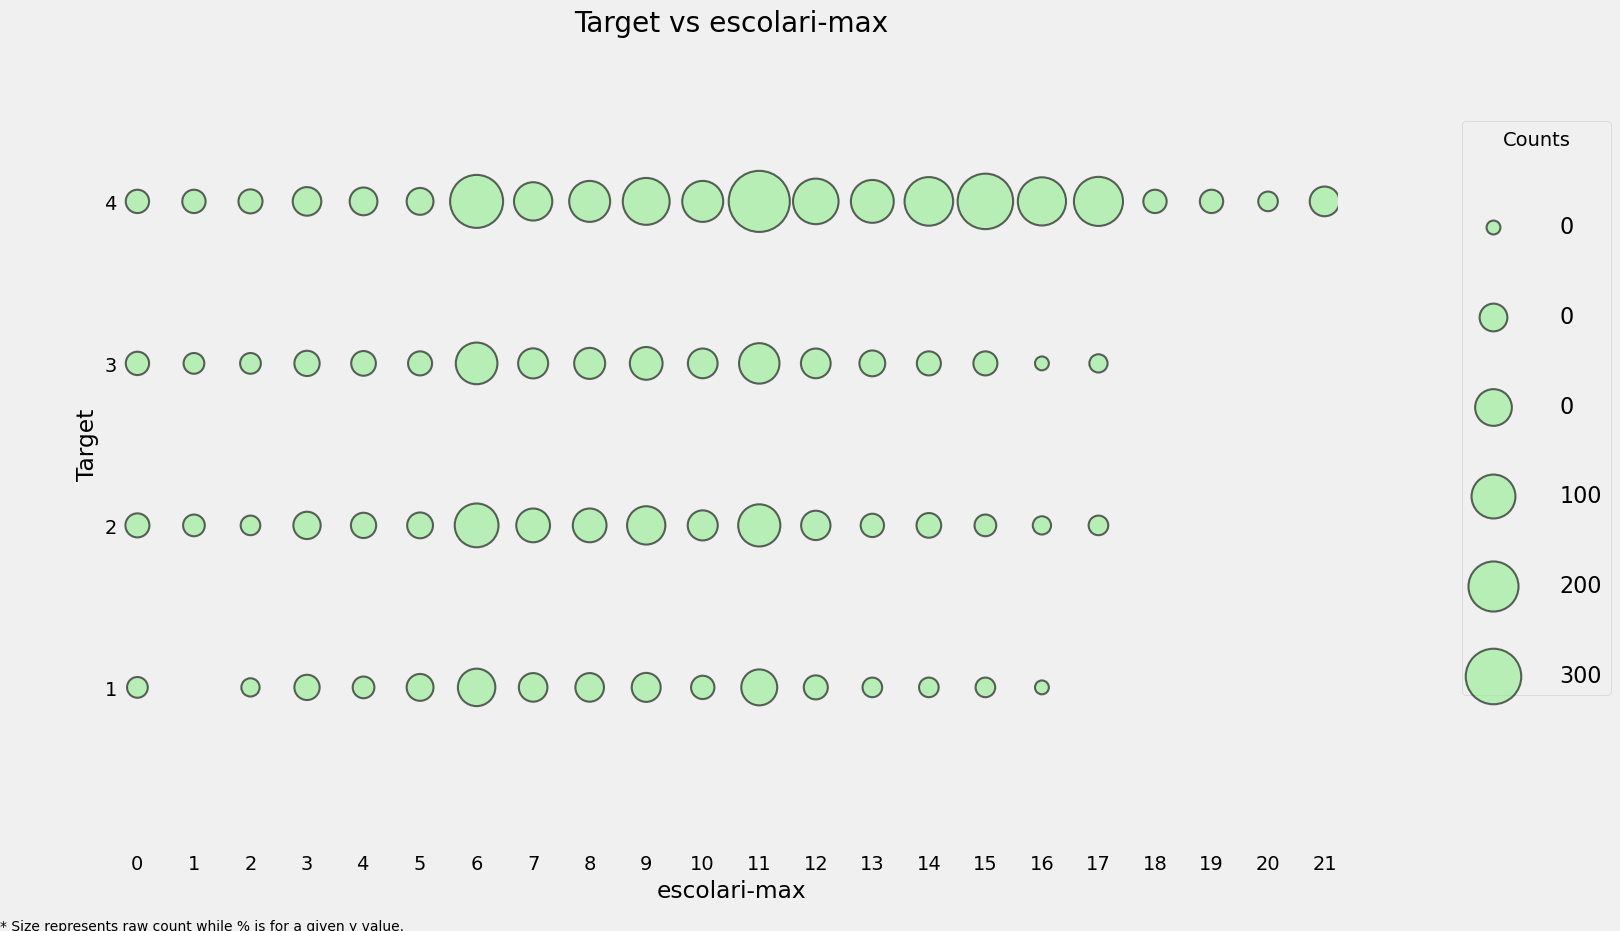

In [96]:
plot_categoricals('escolari-max', 'Target', final, annotate=False)

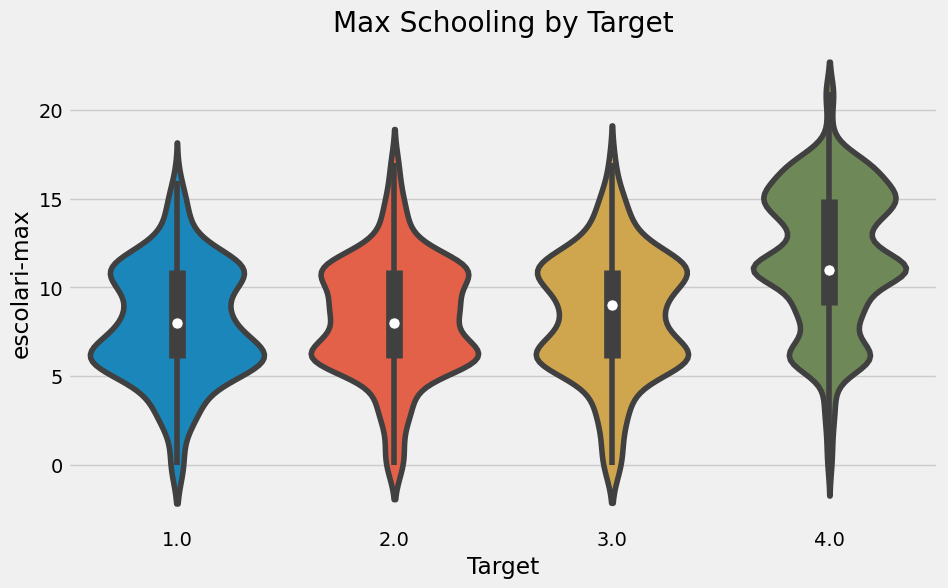

In [97]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Target', y='escolari-max', data=final)
plt.title('Max Schooling by Target');

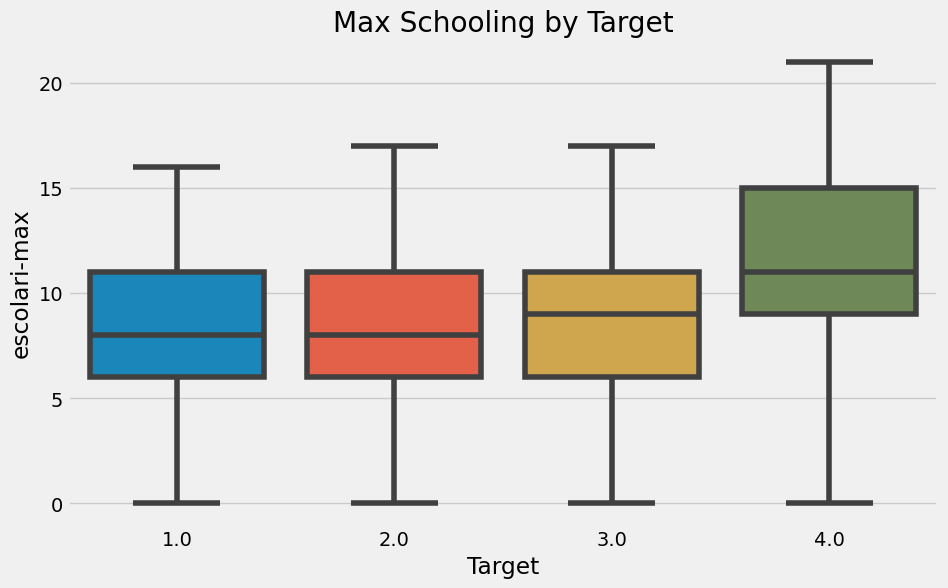

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Target', y='escolari-max', data=final)
plt.title('Max Schooling by Target');

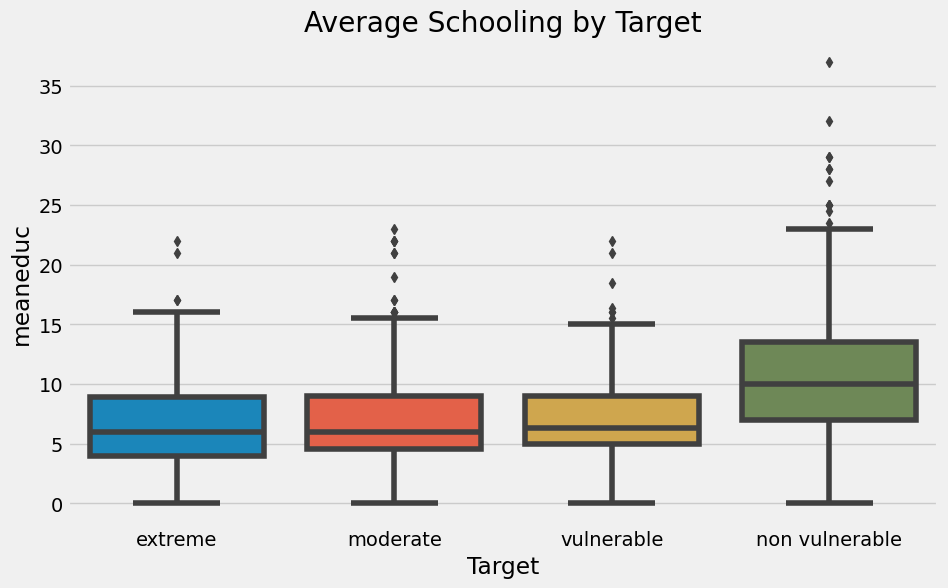

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Target', y='meaneduc', data=final)
plt.xticks([0,1,2,3], poverty_mapping.values())
plt.title('Average Schooling by Target');

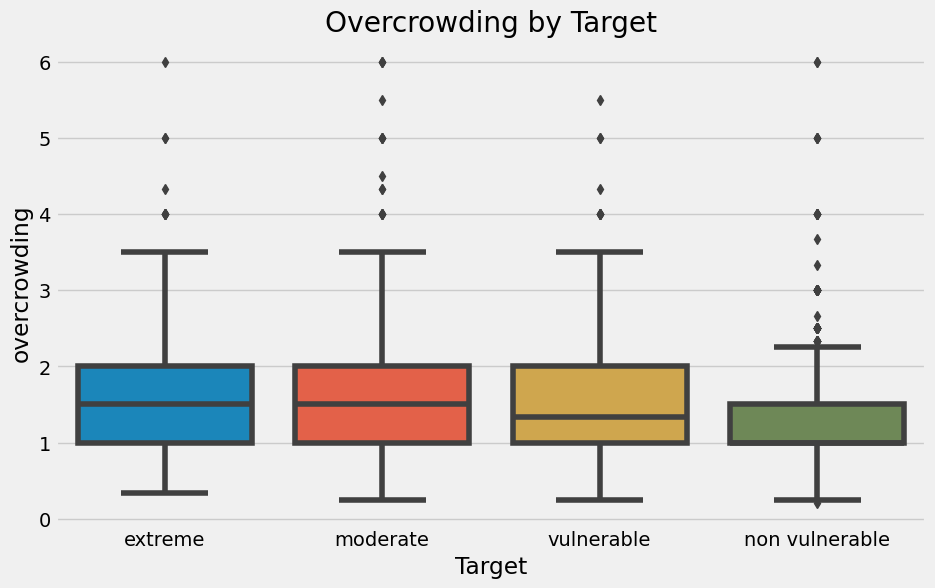

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Target', y='overcrowding', data=final)
plt.xticks([0,1,2,3], poverty_mapping.values())
plt.title('Overcrowding by Target');

One other feature that might be useful is the gender of the head of household. Since we aggregated the data, we'll have to go back to the individual level data and find the gender for the head of household.  
  
__DeepL 번역__  
유용할 수 있는 또 다른 기능은 세대주의 성별입니다. 데이터를 집계했기 때문에 개인 수준 데이터로 돌아가서 세대주의 성별을 찾아야 합니다.

In [101]:
head_gender = ind.loc[ind['parentesco1']==1, ['idhogar', 'female']]
final = final.merge(head_gender, on='idhogar', how='left').rename(columns={'female': 'female-head'})

In [102]:
final.columns

Index(['Id', 'idhogar', 'Target', 'hacdor', 'hacapo', 'v14a', 'refrig',
       'paredblolad', 'paredzocalo', 'paredpreb',
       ...
       'escolari/age-std', 'escolari/age-range_', 'inst/age-max',
       'inst/age-std', 'inst/age-range_', 'tech-min', 'tech-sum', 'tech-std',
       'tech-range_', 'female-head'],
      dtype='object', length=229)

In [103]:
final.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: proportion, dtype: float64

It looks like households where the head is female are slightly more likely to have a severe level of poverty.

Text(0.5, 1.0, 'Target by Female Head of Household')

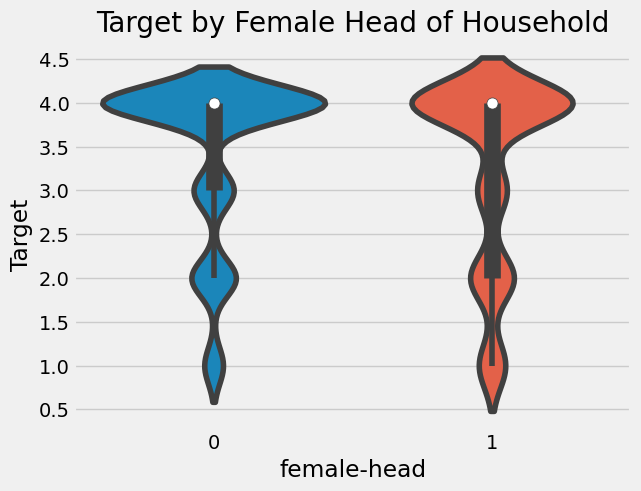

In [104]:
sns.violinplot(x='female-head', y='Target', data=final)
plt.title('Target by Female Head of Household')

We can also look at the difference in average education by whether or not the family has a female head of household.

Text(0.5, 1.0, 'Average Education by Target and Female Head of Household')

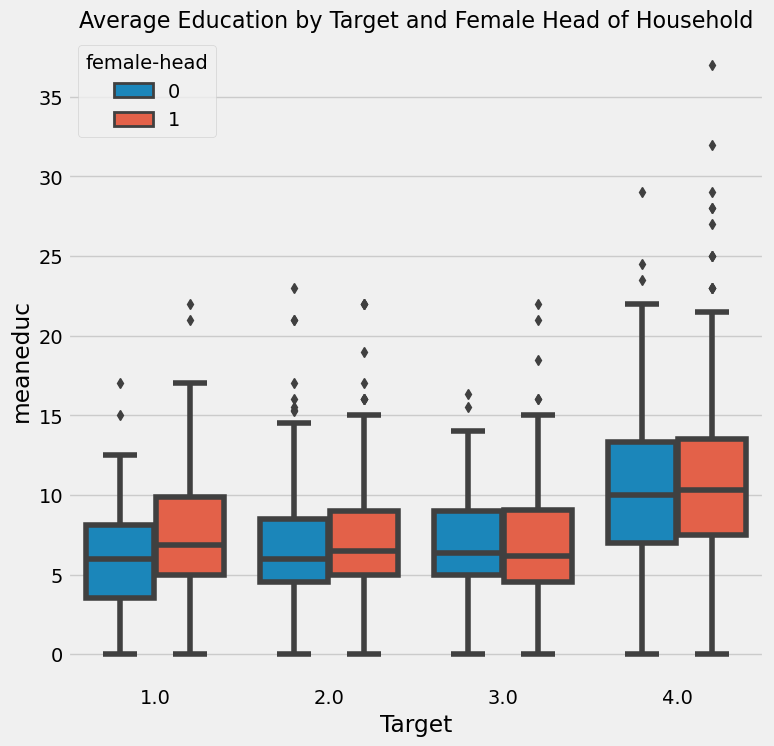

In [105]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Target', y='meaneduc', hue='female-head', data=final)
# plt.title('Average Education by Target and Female Head of Household', size=16)
plt.title('Average Education by Target and Female Head of Household', fontdict={'fontsize': 16})

It looks like at every value of the `Target`, households with female heads have higher levels of education. Yet, we saw that overall, households with female heads are more likely to have severe poverty.

In [106]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

mean  count
female-head                 
0            8.968025   6384
1            9.237013   3903

Overall, the average education of households with female heads is slightly higher than those with male heads. I'm not too sure what to make of this, but it seems right to me.

## Machine Learning Modeling
Once feature engineering/construction is done, we can get started with the machine learning! All of our data (both training and testing) is aggregated for each household and so can be directly used in a model. To first show the process of modeling, we'll use the capable Random Forest Classifier in Scikit-Learn. This probably won't get us to the top of the leaderboard, but it will allow us to establish a baseline. Later we'll try several other models including the powerful Gradient Boosting Machine.  
  
To assess our model, we'll use 10-fold cross validation on the training data. This will essentially train and test the model 10 times using different splits of the training data. 10-fold cross validation is an effective method for estimating the performance of a model on the test set. We want to look at the average performance in cross validation as well as the standard deviation to see how much scores change between the folds. We use the `F1 Macro` measure to evaluate performance.  
  
## DeepL 번역
기능 엔지니어링/구축이 완료되면 머신 러닝을 시작할 수 있습니다! 모든 데이터(학습과 테스트 모두)는 각 가구별로 집계되므로 모델에 바로 사용할 수 있습니다. 먼저 모델링 과정을 보여드리기 위해 Scikit-Learn의 랜덤 포레스트 분류기를 사용하겠습니다. 이 방법으로 순위표의 최상위에 오를 수는 없겠지만 기준선을 설정할 수 있을 것입니다. 나중에 강력한 그라디언트 부스팅 머신을 포함한 몇 가지 다른 모델을 시도해 보겠습니다.

모델을 평가하기 위해 훈련 데이터에 대해 10배 교차 검증을 사용합니다. 이는 기본적으로 훈련 데이터의 서로 다른 분할을 사용하여 모델을 10번 훈련하고 테스트하는 것입니다. 10배 교차 검증은 테스트 세트에서 모델의 성능을 추정하는 데 효과적인 방법입니다. 교차 검증의 평균 성능과 표준 편차를 살펴봄으로써 교차 검증 간에 점수가 얼마나 변화하는지 확인하고자 합니다. `F1 Macro` 측정값을 사용하여 성능을 평가합니다.

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

## Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average='macro')

In [108]:
## Labels for training
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

## Extract the training data
train_set = final[final['Target'].notnull()].drop(columns=['Id', 'idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns=['Id', 'idhogar', 'Target'])

## submission base which is used for making submissions to the competition
submission_base = test[['Id', 'idhogar']].copy()

Because we are going to be comparing different models, we want to scale the features (limit the range of each column to between 0 and 1). For many ensemble models this is not necessary, but when we use models that depend on a distance metric, such as KNearest Neighbors or the Support Vector Machine, feature scaling is an absolute necessity. When comparing different models, it's always safest to scale the features. We also impute the missing values with the median of the feature.  
  
For imputing missing values and scaling the features in one step, we can make a pipeline. This will be fit on the training data and used to transform the training and testing data.  
  
__deepL 번역__   
서로 다른 모델을 비교할 것이므로 피처의 스케일링(각 열의 범위를 0에서 1 사이로 제한)을 하고자 합니다. 많은 앙상블 모델에서는 이 작업이 필요하지 않지만, 가장 가까운 이웃이나 서포트 벡터 머신과 같이 거리 메트릭에 의존하는 모델을 사용할 때는 피처 스케일링이 절대적으로 필요합니다. 서로 다른 모델을 비교할 때는 항상 피처를 스케일링하는 것이 가장 안전합니다. 또한 결측값은 피처의 중앙값으로 추정합니다.  
  
결측값을 대입하고 피처를 한 번에 확장하기 위해 파이프라인을 만들 수 있습니다. 이 파이프라인은 학습 데이터에 적합하고 학습 및 테스트 데이터를 변환하는 데 사용됩니다.  

In [109]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', MinMaxScaler())])

## Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

In [110]:
## The data has no missing values and is scaled between zero and one. This means it can be directly used in any Scikit-Learn model.

model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs=-1)
## 10 fold corss validation
cv_score = cross_val_score(model, train_set, train_labels, cv=10, scoring=scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std={round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3439 with std=0.0438


### Feature Importances
With a tree-based model, we can look at the feature importances which show a relative ranking of the usefulness of features in the model. These represent the sum of the reduction in impurity at nodes that used the variable for splitting, but we don't have to pay much attention to the absolute value. Instead we'll focus on relative scores.  
  
If we want to view the feature importances, we'll have to train a model on the whole training set. Cross validation does not return the feature importances.  
  
### DeepL 번역
트리 기반 모델을 사용하면 모델에서 기능의 유용성에 대한 상대적 순위를 보여주는 기능 중요도를 살펴볼 수 있습니다. 이는 분할에 변수를 사용한 노드에서 불순물 감소의 합계를 나타내지만 절대값에 크게 신경 쓸 필요는 없습니다. 대신 상대 점수에 집중하겠습니다.  
  
특징의 중요도를 보려면 전체 학습 집합에 대해 모델을 학습시켜야 합니다. 교차 유효성 검사는 기능 중요도를 반환하지 않습니다.  

In [111]:
model.fit(train_set, train_labels)

## Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

feature  importance
0       hacdor    0.000643
1       hacapo    0.000283
2         v14a    0.000460
3       refrig    0.001798
4  paredblolad    0.006024

Below is a short function we'll use to plot the feature importances. I use this function a lot and often copy and paste it between scripts. I hope the documentation makes sense!

In [112]:
def plot_feature_importances(df, n=10, threshold=None):
    """Plots n most important features. Also plots the cumulative importance 
    if threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances.
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance"
        
        n (int): Number of most important features to plot. Default is 15.
        
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a norm alized column (sums to 1)
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1.
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most tmportant features needed to reach 90% of cumulative importance
        
    """
    # plt.style.use('fivethirtyeight')

    ## Sort features with most important at the head
    df = df.sort_values('importance', ascending=False).reset_index(drop=True)

    ## Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # plt.rcParams['font.size'] = 12

    ## Bar plot of n most important features
    df.loc[:n, :].plot.barh(y='importance_normalized',
                            x='feature', color='darkgreen',
                            edgecolor='k', figsize=(12,8),
                            legend=False, linewidth=2)
    
    plt.xlabel('Normalized Importance', size=18); plt.ylabel('')
    plt.title(f'{n} Most Important Features', size=18)
    plt.gca().invert_yaxis()


    if threshold:
        # Cumulative importance plot
        plt.figure(figsize=(8,6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Num,ber of Features', size=16); plt.ylabel('Cumulative Importance', size=16)
        plt.title('Cumulative Feature Importance', size=18)

        ## Number of features needed for threshold cumulative importance
        ## This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))

        ## Add vertical line to plot
        plt. vlines(importance_index+1, ymin=0, ymax=1.05, linestyles='--', colors='red')
        plt.show()

        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index+1, 100*threshold))

        return df

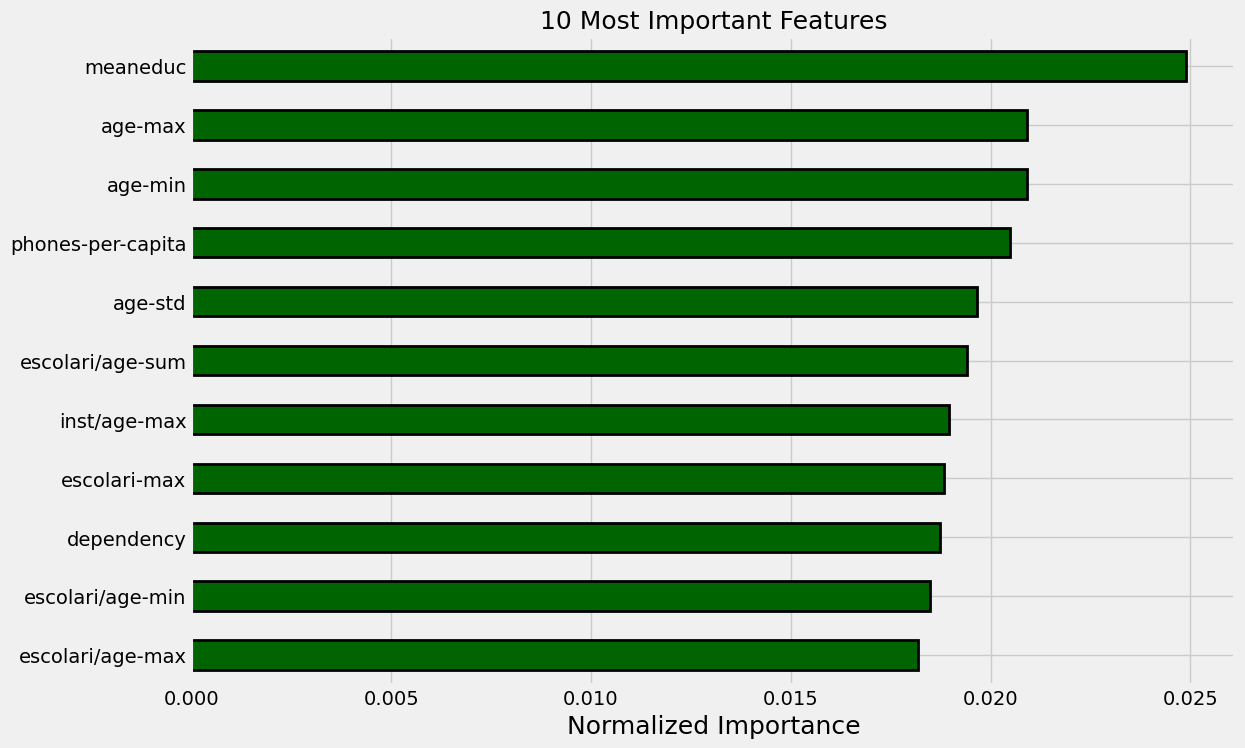

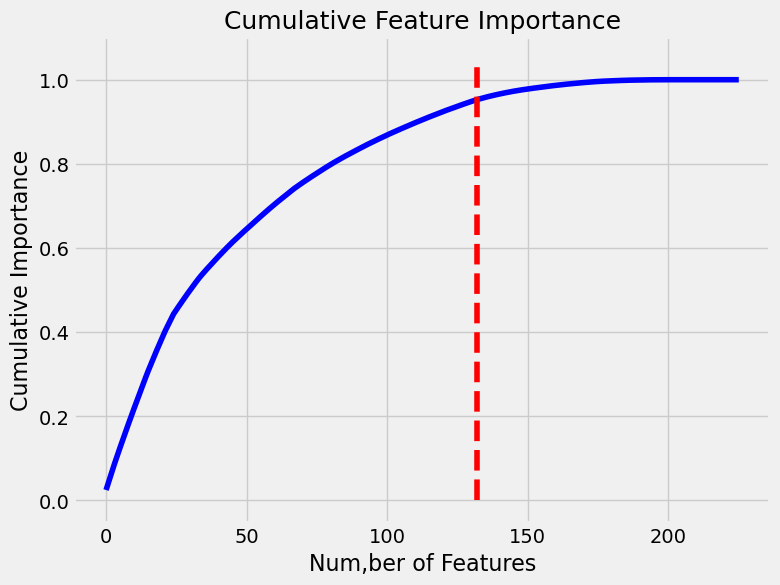

132 features required for 95% of cumulative importance.


In [113]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

__Education reigns supreme!__ The most important variable is the average amount of education in the household, followed by the maximum education of anyone in the household. I have a suspicion these variables are highly correlated (collinear) which means we may want to remove one of them from the data. The other most important features are a combination of variables we created and variables that were already present in the data.  
  
It's interesting that we only need 106 of the ~180 features to account for 90% of the importance. This tells us that we may be able to remove some of the features. However, feature importances don't tell us which direction of the feature is important (for example, we can't use these to tell whether more or less education leads to more severe poverty) they only tell us which features the model considered relevant.  
  
__DeepL 번역__  
__교육 기간이 최고입니다!__ 가장 중요한 변수는 가구의 평균 교육 수준이며, 그 다음이 가구 내 구성원의 최대 교육 수준입니다. 이 변수들은 상관관계(상관관계)가 높기 때문에 데이터에서 이 중 하나를 제거할 수 있을 것 같습니다. 다른 가장 중요한 특징은 우리가 만든 변수와 데이터에 이미 존재하는 변수의 조합입니다.  
  
180여 개의 기능 중 중요도의 90%를 차지하는 106개의 기능만 있으면 된다는 점이 흥미롭습니다. 이는 일부 기능을 제거할 수 있다는 것을 의미합니다. 그러나 기능 중요도는 어떤 방향의 기능이 중요한지 알려주는 것이 아니라(예를 들어, 더 많은 교육이 더 심각한 빈곤으로 이어지는지 여부를 알려주는 데는 사용할 수 없습니다) 모델이 어떤 기능을 관련성이 있다고 생각했는지를 알려줄 뿐입니다.

In [114]:
def kde_target(df, variable):
    """Plots the distribution of 'variable' in 'df' colored by the 'Target' column"""

    colors ={1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}

    plt.figure(figsize=(12,8))

    df = df[df['Target'].notnull()]

    for level in df['Target'].unique():
        subset = df[df['Target']==level].copy()
        sns.kdeplot(subset[variable].dropna(),
                    label=f'Poverty Level: {level}',
                    color=colors[int(subset['Target'].unique())])
        
    plt.xlabel(variable); plt.ylabel('Density');
    plt.title('{} Distribution'.format(variable.capitalize()));
    # str.capitalize(): 첫글자 대문자, 외 소문자

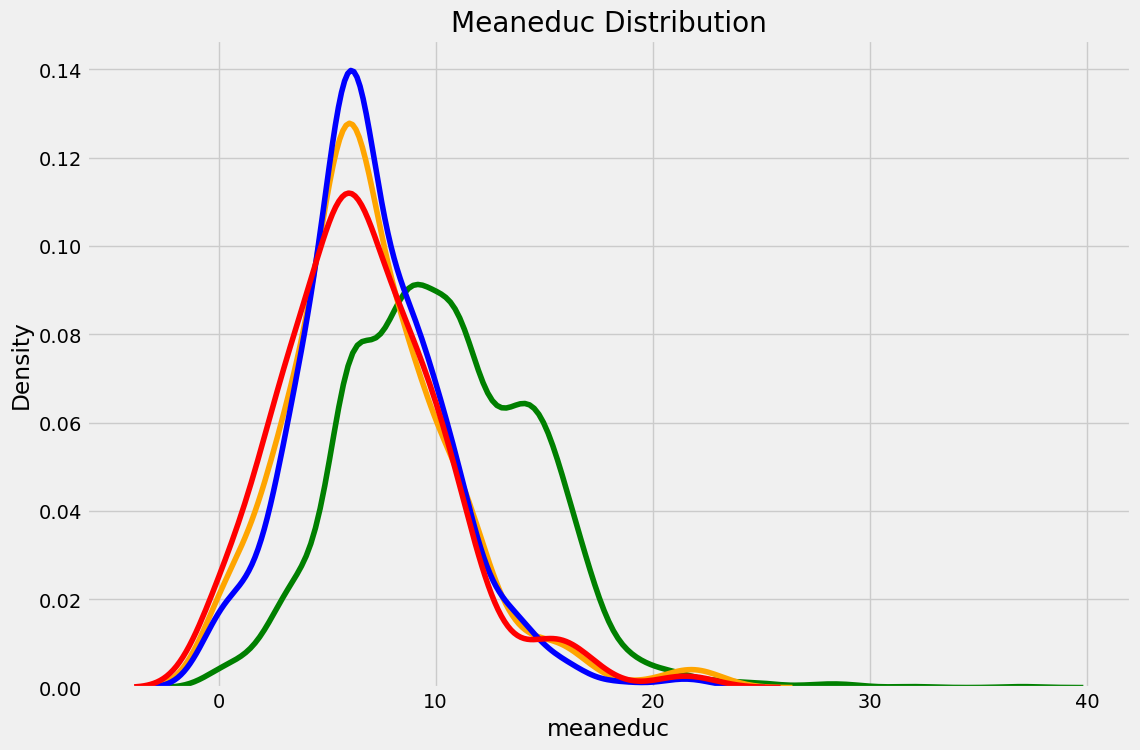

In [115]:
kde_target(final, 'meaneduc')

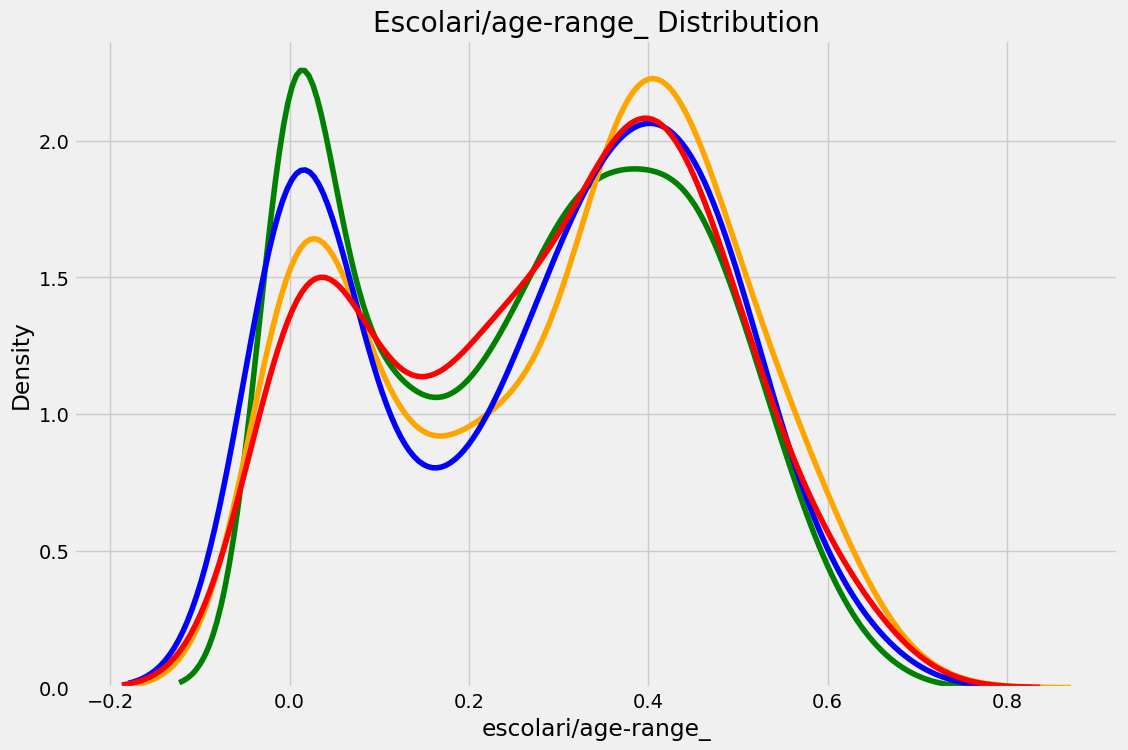

In [116]:
kde_target(final, 'escolari/age-range_')

## Model Selection

Now that we have a good set of features, it's time to get into the modeling. We already tried one basic model, the Random Forest Classifier which delivered a best macro F1 of 0.35. However, in machine learning, there is no way to know ahead of time which model will work best for a given dataset. The following plot shows __that there are some problems where even Gaussian Naive Bayes will outperform a gradient boosting machine.__ This is from [an excellent paper by Randal Olson that discusses many points of machine learning](https://psb.stanford.edu/psb-online/proceedings/psb18/olson.pdf)  
  
What this plot tells us is that we have to try out a number of different models to see which is optimal. Most people eventually settle on the __gradient boosting machine__ and we will try that out, but for now we'll take a look at some of the other options. There are literally dozens (maybe hundreds) of multi-class machine learning models if we look at the [Scikit-Learn documentation](http://scikit-learn.org/stable/modules/multiclass.html). We don't have to try them all, but we should sample from the options.  
  
What we want to do is write a function that can evaluate a model. This will be pretty simple since we already wrote most of the code. In addition to the Random Forest Classifier, we'll try eight other Scikit-Learn models. Luckily, this dataset is relatively small and we can rapidly iterate through the models. We will make a dataframe to hold the results and the function will add a row to the dataframe for each model.  
  
## DeepL 번역
이제 좋은 기능 세트를 갖추었으니 모델링을 시작할 차례입니다. 우리는 이미 하나의 기본 모델인 랜덤 포리스트 분류기(Random Forest Classifier)를 사용해 보았는데, 이 모델은 0.35의 최고 매크로 F1을 제공했습니다. 하지만 머신 러닝에서는 어떤 모델이 주어진 데이터 세트에 가장 적합한지 미리 알 수 있는 방법이 없습니다. 다음 도표는 __가우시안 나이브 베이즈(Gaussian Naive Bayes)조차도 그라데이션 부스팅 머신보다 성능이 떨어지는 문제가 있다는 것을__ 보여줍니다. 이 도표는 [머신 러닝의 많은 점을 논의하는 Randal Olson의 훌륭한 논문](https://psb.stanford.edu/psb-online/proceedings/psb18/olson.pdf)에서 가져온 것입니다.  
  
이 도표에서 알 수 있는 것은 어떤 모델이 최적인지 확인하기 위해 여러 가지 모델을 시도해봐야 한다는 것입니다. 대부분의 사람들은 결국 __gradient boosting machine__ 정착하고 이를 시도해 보겠지만, 지금은 다른 옵션 몇 가지를 살펴볼 것입니다. [Scikit-Learn documentation](http://scikit-learn.org/stable/modules/multiclass.html)를 보면 말 그대로 수십 개(어쩌면 수백 개)의 멀티클래스 머신 러닝 모델이 있습니다. 모든 모델을 다 시도할 필요는 없지만 옵션 중에서 샘플을 만들어야 합니다.  
  
우리가 하고 싶은 것은 모델을 평가할 수 있는 함수를 작성하는 것입니다. 이미 대부분의 코드를 작성했기 때문에 매우 간단할 것입니다. 랜덤 포레스트 분류기 외에도 8개의 다른 Scikit-Learn 모델을 시도해 보겠습니다. 다행히도 이 데이터 세트는 비교적 작아서 모델을 빠르게 반복할 수 있습니다. 결과를 담을 데이터 프레임을 만들고 함수는 각 모델에 대해 데이터 프레임에 행을 추가합니다.

In [117]:
## Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [118]:
import warnings
from sklearn.exceptions import ConvergenceWarning

## Filter out warnings from models
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""

    cv_scores = cross_val_score(model, train, train_labels, cv=10, scoring=scorer, n_jobs=-1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')

    if model_results is not None:
        ## pd.append 함수 제거로 변경
        # model_results = model_results.append(pd.DataFrame({'model': name,
        #                                                     'cv_mean': cv_scores.mean(),
        #                                                     'cv_std': cv_scores.std()},
        #                                                     index=[0]),
        #                                                     ignore_index=True)
        model_results = pd.concat([model_results, pd.DataFrame({'model': name,
                                                            'cv_mean': cv_scores.mean(),
                                                            'cv_std': cv_scores.std()},
                                                            index=[0])],
                                                            ignore_index=True)
    
    return model_results

In [119]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 'LSVC', model_results)

10 Fold CV Score: 0.28552 with std: 0.03985


In [120]:
# That's one model to cross off the list 
# (although we didn't perform hyperparameter tuning so the actual performance could possibly be improved).

model_results = cv_model(train_set, train_labels, GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.18451 with std: 0.03657


In [121]:
# That performance is very poor. I don't think we need to revisit the Gaussian Naive Bayes method 
# (although there are problems on which it can outperform the Gradient Boosting Machine).

model_results = cv_model(train_set, train_labels, MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)), 'MLPB', model_results)

10 Fold CV Score: 0.3192 with std: 0.05951


In [122]:
# The multi-layer perceptron (a deep neural network) has decent performance. 
# This might be an option if we are able to hyperparameter tune the network. 
# However, the limited amount of data could be an issue with a neural network as these generally require hundreds of thousands of examples to learn effectively.

model_results = cv_model(train_set, train_labels, LinearDiscriminantAnalysis(), 'LDA', model_results)

10 Fold CV Score: 0.31792 with std: 0.06199


__If you run `LinearDiscriminantAnalysis` without filtering out the `UserWarning`s, you get many messages saying "Variables are collinear."__ This might give us a hint that we want to remove some collinear features! We might want to try this model again after removing the collinear variables because the score is comparable to the random forest.  

__DeepL 번역__  
__`사용자 경고`를 필터링하지 않고 `LinearDiscriminantAnalysis`를 실행하면 "변수가 공선형입니다."라는 메시지가 많이 표시됩니다.__ 이것은 일부 공선형 특징을 제거하라는 힌트를 줄 수 있습니다! 점수가 랜덤 포레스트와 비슷하므로 선형 변수를 제거한 후 이 모델을 다시 시도해 볼 수 있습니다.

In [123]:
model_results = cv_model(train_set, train_labels, RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.27803 with std: 0.0342


In [124]:
# The linear model (with ridge regularization) does surprisingly well.
# This might indicate that a simple model can go a long way in this problem
# (although we'll probably end up using a more powerful method).

for n in [5, 10, 20]:
    print(f'\nKNN with {n} neigbors\n')
    model_results = cv_model(train_set, train_labels,
                             KNeighborsClassifier(n_neighbors=n),
                             f'knn-{n}', model_results)


KNN with 5 neigbors

10 Fold CV Score: 0.34765 with std: 0.03354

KNN with 10 neigbors

10 Fold CV Score: 0.31992 with std: 0.03213

KNN with 20 neigbors

10 Fold CV Score: 0.30723 with std: 0.04762


In [125]:
# As one more attempt, we'll consider the ExtraTreesClassifier,
# a variant on the random forest using ensembles of decision trees as well.

from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels,
                         ExtraTreesClassifier(n_estimators=100, random_state=10),
                         'EXT', model_results)

10 Fold CV Score: 0.32681 with std: 0.05096


### Comparing Model Performance
With the modeling results in a dataframe, we can plot them to see which model does the best.

In [126]:
model_results = cv_model(train_set, train_labels,
                         RandomForestClassifier(100, random_state=10),
                         'RF', model_results)

10 Fold CV Score: 0.34394 with std: 0.04381


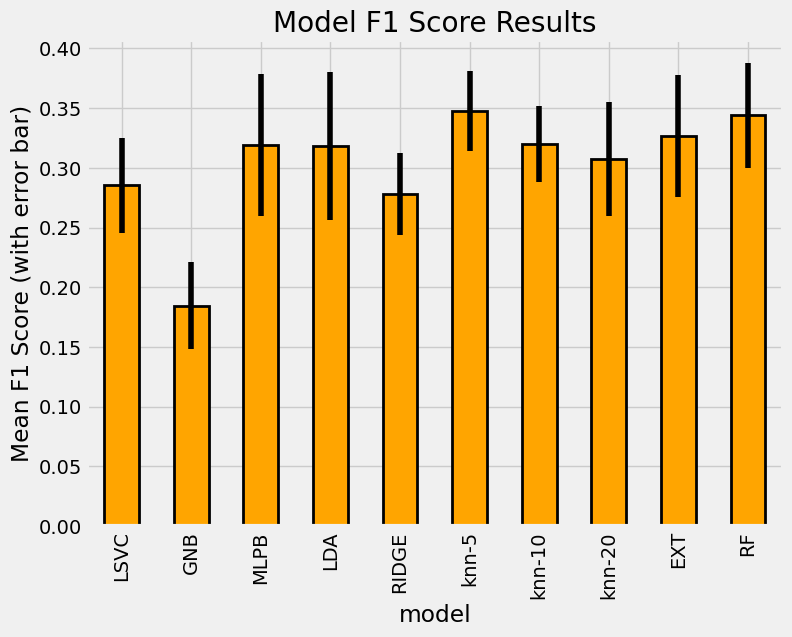

In [127]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8,6),
                                  yerr=list(model_results['cv_std']),
                                  edgecolor='k', linewidth=2)
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

The most likely candidate seems to be the Random Forest because it does best right out of the box. While we didn't tune any of the hyperparameters so the comparison between models is not perfect, these results reflect those of many other Kaggle competitiors finding that tree-based ensemble methods (including the Gradient Boosting Machine) perform very well on structured datasets. Hyperparameter performance does improve the performance of machine learning models, but we don't have time to try all possible combinations of settings for all models. The graph below ([from the paper by Randal Olson](https://psb.stanford.edu/psb-online/proceedings/psb18/olson.pdf)) shows the effect of hyperparameter tuning versus the default values in Scikit-Learn.  
  
In most cases the accuracy gain is less than 10% so the worst model is probably not suddenly going to become the best model through tuning.  
  
For now we'll say the random forest does the best. Later we'll look at using the Gradient Boosting Machine, although not implemented in Scikit-Learn. Instead we'll be using the more powerful [LightGBM version](https://lightgbm.readthedocs.io/en/latest/). Now, let's turn to making a submission using the random forest.  
  
__DeepL 번역__  
가장 유력한 후보로는 가장 좋은 성능을 보인 랜덤 포레스트로 보입니다. 하이퍼파라미터를 조정하지 않았기 때문에 모델 간의 비교가 완벽하지는 않지만, 이러한 결과는 트리 기반 앙상블 방법(그라데이션 부스팅 머신 포함)이 구조화된 데이터 세트에서 매우 우수한 성능을 보인다는 다른 많은 Kaggle 경쟁사의 결과를 반영합니다. 하이퍼파라미터 성능은 머신 러닝 모델의 성능을 향상시키기는 하지만, 모든 모델에 대해 가능한 모든 설정 조합을 시도할 시간이 없습니다. 아래 그래프([랜달 올슨의 논문에서 발췌](https://psb.stanford.edu/psb-online/proceedings/psb18/olson.pdf))는 하이퍼파라미터 튜닝의 효과와 Scikit-Learn의 기본값을 비교하여 보여줍니다.  
  
대부분의 경우 정확도 향상은 10% 미만이므로 튜닝을 통해 최악의 모델이 갑자기 최고의 모델이 되지는 않을 것입니다.  
  
지금은 무작위 포리스트가 가장 잘 수행한다고 가정하겠습니다. 나중에 Scikit-Learn에는 구현되어 있지 않지만 그라디언트 부스팅 머신을 사용하는 방법을 살펴보겠습니다. 대신 더 강력한 [LightGBM 버전](https://lightgbm.readthedocs.io/en/latest/)을 사용하겠습니다. 이제 랜덤 포레스트를 사용하여 제출물을 만들어 보겠습니다.

## Making a Submission
In order to make a submission, we need the test data. Fortunately, we have the test data formatted in exactly the same manner as the train data.  
  
The format of a testing submission is shown below. Although we are making predictions for each household, we actually need one row per individual (identified by the `Id`) but only the prediction for the head of household is scored.  
  
The `submission_base` will have all the individuals in the test set since we have to have a "prediction" for each individual while the `test_ids` will only contain the `idhogar` from the heads of households. When predicting, we only predict for each household and then we merge the `predictions` dataframe with all of the individuals on the household id (`idhogar`). This will set the `Target` to the same value for everyone in a household. For the test households without a head of household, we can just set these predictions to 4 since they will not be scored.  
  
## DeepL 번역
제출을 하려면 테스트 데이터가 필요합니다. 다행히도 열차 데이터와 똑같은 형식의 테스트 데이터가 준비되어 있습니다.  
  
테스트 제출 형식은 아래와 같습니다. 각 가구에 대한 예측을 하고 있지만 실제로는 개인당 한 행(`Id`로 식별)이 필요하지만 세대주에 대한 예측만 채점됩니다.
  
`submission_base`에는 각 개인에 대한 '예측'이 있어야 하므로 테스트 세트의 모든 개인이 포함되며 `test_ids`에는 세대주의 `idhogar`만 포함됩니다. 예측할 때는 각 가구에 대해서만 예측한 다음 'predictions' 데이터 프레임을 가구 id(`idhogar`)에 있는 모든 개인과 병합합니다. 이렇게 하면 `Target`가 가구의 모든 사람에 대해 동일한 값으로 설정됩니다. 세대주가 없는 테스트 가구의 경우 점수가 매겨지지 않으므로 이러한 예측을 4로 설정하면 됩니다.

In [128]:
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

The function below takes in a model, a training set, the training labels, and a testing set and performs the following operations:  
  
- Trains the model on the training data using fit
- Makes predictions on the test data using predict
- Creates a submission dataframe that can be saved and uploaded to the competition

In [129]:
from sklearn.metrics import classification_report, f1_score

def submit(model, train, train_labels, test, test_ids):
    """Reain and test a model on the dataset"""

    ## Train on the data
    model.fit(train, train_labels)
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar': test_ids, 'Target': predictions})

    ## Make a submission dataframe
    submission = submission_base.merge(predictions,
                                       on='idhogar',
                                       how='left'
                                       ).drop(columns=['idhogar'])
    
    ## Fill in households missing a head
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)

    return submission

In [130]:
## Let's make a submission with the Random Forest.

rf_submission = submit(RandomForestClassifier(n_estimators=100,
                                              random_state=10, n_jobs=-1),
                       train_set, train_labels, test_set, test_ids)
rf_submission.to_csv('rf_submission.csv', index=False)

## Feature Selection
One potential method for improving model performance is feature selection. This is the process where we try to keep only the most useful features for our model. "Most useful" can mean many different things, and there are numerous heuristics for selecting the most important features. For feature selection in this notebook, we'll first remove any columns with greater than 0.95 correlation (we already did some of this during feature engineering) and then we'll apply recursive feature elimination with the Scikit-Learn library.  
  
First up are the correlations. 0.95 is an arbitrary threshold - feel free to change the values and see how the performance changes!  
  
## DeepL 번역
모델 성능을 개선하기 위한 한 가지 잠재적인 방법은 기능 선택입니다. 이는 모델에 가장 유용한 기능만 유지하려고 노력하는 프로세스입니다. "가장 유용하다"는 것은 다양한 의미를 가질 수 있으며, 가장 중요한 기능을 선택하기 위한 수많은 휴리스틱이 있습니다. 이 노트북의 기능 선택을 위해 먼저 상관관계가 0.95보다 큰 열을 제거한 다음(기능 엔지니어링 중에 이미 이 작업을 일부 수행했습니다), Scikit-Learn 라이브러리로 재귀적 기능 제거를 적용하겠습니다.  
  
먼저 상관관계를 살펴보겠습니다. 0.95는 임의의 임계값이므로 자유롭게 값을 변경하고 성능이 어떻게 변하는지 확인해 보세요!

In [131]:
train_set = pd.DataFrame(train_set, columns=features)

## Create correlation matrix
corr_matrix = train_set.corr()

## Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

## Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]

to_drop

['coopele', 'elec', 'v18q-count', 'female-sum']

In [132]:
train_set = train_set.drop(columns=to_drop)
train_set.shape

(2973, 222)

In [133]:
test_set = pd.DataFrame(test_set, columns=features)
train_set, test_set = train_set.align(test_set, axis=1, join='inner')
features = list(train_set.columns)

### Recursive Feature Elimination with Random Forest
The `RFECV` in Sklearn stands for Recursive Feature Elimination with Cross Validation. The selector operates using a model with feature importances in an iterative manner. At each iteration, it removes either a fraction of features or a set number of features. The iterations continue until the cross validation score no longer improves.  
  
To create the `selector` object, we pass in the the model, the number of features to remove at each iteration, the cross validation folds, our custom scorer, and any other parameters to guide the selection.  
  
### DeepL 번역
Sklearn의 `RFECV`는 교차 검증을 통한 재귀적 특징 제거를 의미합니다. 이 선택기는 반복적인 방식으로 특징 중요도가 있는 모델을 사용하여 작동합니다. 각 반복마다 특징의 일부 또는 설정된 수의 특징을 제거합니다. 교차 유효성 검사 점수가 더 이상 개선되지 않을 때까지 반복이 계속됩니다.  
  
`selector` 개체를 생성하려면 모델, 각 반복에서 제거할 기능 수, 교차 검증 폴드, 사용자 지정 점수 및 선택을 안내하는 기타 매개 변수를 전달합니다.  

In [134]:
from sklearn.feature_selection import RFECV

## Create a model for feature selection
estimator = RandomForestClassifier(random_state=10, n_estimators=100, n_jobs=-1)

## Create the object
selector = RFECV(estimator, step=1, cv=3, scoring=scorer, n_jobs=-1)

In [135]:
## Then we `fit` the selector on the training data as with any other sklearn model.
## This will continue the feature selection until the cross validation scores no longer improve.

selector.fit(train_set, train_labels)

RFECV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
      n_jobs=-1,
      scoring=make_scorer(f1_score, response_method='predict', average=macro))

169

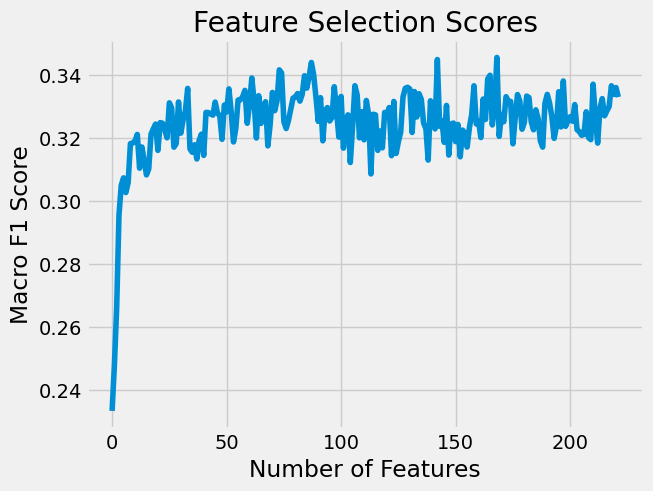

In [136]:
## We can investigate the object to see the training scores for each iteration.
## The following code will plot the validation scores versus the number of features for the training.

# plt.plot(selector.grid_scores)
# grid_scores과 제거되고 cv_results_에 사전 형태로 저장된다.
# selector.cv_results_.keys() = dict_keys(['mean_test_score', 'std_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score'])
plt.plot(selector.cv_results_['mean_test_score'])
plt.xlabel('Number of Features')
plt.ylabel('Macro F1 Score')
plt.title('Feature Selection Scores')
selector.n_features_

We can see that the score improves as we add features up until 96 features. According to the selector, this is the optimal number of features.  
  
The rankings of each feature can be found by inspecting the trained object. These represent essentially the importance of features averaged over the iterations. Features can share the same ranking, and only features with a rank of 1 are retained.  
  
__DeepL 번역__  
96개 기능까지 기능을 추가할수록 점수가 향상되는 것을 볼 수 있습니다. 선택기에 따르면 이것이 최적의 특징 수입니다.  
  
각 특징의 순위는 학습된 객체를 검사하여 확인할 수 있습니다. 이는 기본적으로 반복에 걸쳐 평균화된 특징의 중요성을 나타냅니다. 특징은 동일한 순위를 공유할 수 있으며 순위가 1인 특징만 유지됩니다.

In [137]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)
# 순서가 다를 뿐 값은 같거나 유사함. 아래는 캐글 노트북의 인덱스 조회 코드
# ranking.loc[[73, 173, 130, 129, 198, 197, 86, 177, 109, 187]]

feature  rank
110     female-range_     1
124  estadocivil5-sum     1
125  estadocivil6-min     1
126  estadocivil6-max     1
127  estadocivil7-min     1
128  estadocivil7-max     1
129  estadocivil7-sum     1
130  estadocivil7-std     1
133   parentesco1-std     1
135   parentesco2-max     1

In [138]:
## Finally, we select the features and then evaluate in cross validation.

train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [139]:
## Convert back to dataframe
selected_features = train_set.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns=selected_features)

In [140]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10 Fold CV Score: 0.35016 with std: 0.04098


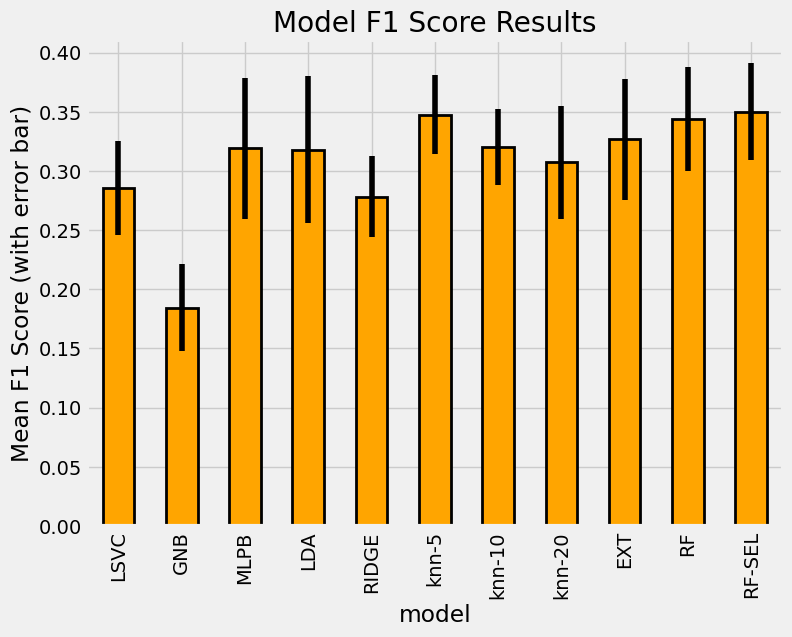

In [141]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8,6),
                                  yerr=list(model_results['cv_std']),
                                  edgecolor='k', linewidth=2)
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)
# The model with selected features does slightly better in cross-validation.
# We can keep both sets of features for use in our next model, the Gradient Boosting Machine.

## Upgrading Our Model: Gradient Boosting Machine
After using the Random Forest and getting decent scores, it's time to step up and use the gradient boosting machine. If you spend any time on Kaggle, you'll notice that the Gradient Boosting Machine (GBM) wins a high percentage of competitions where the data is structured (in tables) and the datasets are not that large (less than a million observations).  
  
I won't go too much into the details here, but instead will focus on the implementation. We'll use the GBM in LightGBM, although there are also options in Scikit-Learn, XGBOOST, and CatBoost. The first set of hyperparameters we'll use were based on those I've found have worked well for other problems.  
  
__Choosing Number of Estimators with Early Stopping__  
To choose the number of estimators (the number of decision trees in the ensemble, called `n_estimators` or `num_boost_rounds`), we'll use early stopping with 5-fold cross validation. This will keep adding estimators until the performance as measured by the Macro F1 Score has not increased for 100 training rounds. To use this metric, we'll have to define a custom metric.  
  
## DeepL 번역
Random Forest를 사용해 괜찮은 점수를 얻었다면 이제 한 단계 업그레이드하여 gradient boosting machine을 사용할 차례입니다. Kaggle을 사용해 본 적이 있다면, Gradient Boosting Machine(GBM)이 데이터가 구조화(in tables)되어 있고 데이터 집합이 그리 크지 않은(100만 개 미만의 관측값) 경연 대회에서 높은 비율로 승리한다는 것을 알 수 있을 것입니다.  
  
여기서는 자세한 내용은 다루지 않고 구현에 초점을 맞추겠습니다. 여기서는 LightGBM의 GBM을 사용하겠지만, Scikit-Learn, XGBOOST 및 CatBoost에도 옵션이 있습니다. 우리가 사용할 첫 번째 하이퍼파라미터 세트는 다른 문제에서 잘 작동하는 것으로 확인된 것을 기반으로 했습니다.  
  
__조기 중지를 사용하여 추정자 수 선택하기__  
추정자 수(앙상블의 의사 결정 트리 수, `n_estimators` 또는 `num_boost_rounds`라고 함)를 선택하기 위해 5배 교차 검증을 통한 조기 중지를 사용합니다. 이렇게 하면 매크로 F1 점수로 측정한 성능이 100번의 훈련 라운드 동안 증가하지 않을 때까지 추정자를 계속 추가합니다. 이 지표를 사용하려면 사용자 지정 지표를 정의해야 합니다.

In [142]:
def macro_f1_score(labels, predictions):
    ## Reshape the predictions as needed
    predictions = predictions.reshape(len(np.unique(labels)), -1).argmax(axis=0)

    metric_value = f1_score(labels, predictions, average='macro')

    ## Return is name, value, is_higher_better
    return 'macro_f1', metric_value, True

## Light Gradient Boosting Machine Implementation
The function below implements training the gradient boosting machine with Stratified Kfold cross validation and early stopping to prevent overfitting to the training data (although this can still occur). The function performs training with cross validation and records the predictions in probability for each fold. To see how this works, we can return the predictions from each fold and then we'll return a submission to upload to the competition.  
  
Choosing hyperparameters for the Gradient Boosting Machine can be tough and generally is done through model optimization. In this notebook, we'll use a set of hyperparameters that I've found work well on previous problems (although they will not necessarily translate to this competition).  
  
We set the `n_estimators` to 10000 but we won't actually reach this number because we are using early stopping which will quit training estimators when the cross validation metric does not improve for `early_stopping_rounds`. There's a lot going on in this function, and read through it carefully to make sure you have it all! I've tried to make the comments and code straightforward. (The `display` is used to show custom information during training in combination with `%%capture` so we don't have to see all the LightGBM information during training).  
  
## DeepL 번역
아래 함수는 훈련 데이터에 대한 과적합을 방지하기 위해 계층화된 Kfold cross validation 및 early stopping로 gradient boosting machine의 훈련을 구현합니다(여전히 발생할 수 있지만). 이 함수는 교차 검증을 통해 훈련을 수행하고 각 폴드에 대한 예측을 확률로 기록합니다. 이것이 어떻게 작동하는지 확인하기 위해 각 폴드에서 예측을 반환한 다음 대회에 업로드할 제출물을 반환할 수 있습니다.  
  
Gradient Boosting Machine의 하이퍼파라미터를 선택하는 것은 어려울 수 있으며 일반적으로 모델 최적화를 통해 이루어집니다. 이 노트북에서는 이전 문제에서 효과가 좋았던 하이퍼파라미터 세트를 사용하겠습니다(반드시 이 대회에 적용되지는 않겠지만).  
  
`n_estimators`를 10000으로 설정했지만, 교차 검증 메트릭이 `early_stopping_rounds`에 대해 개선되지 않을 때 추정자 훈련을 종료하는 조기 중지를 사용하기 때문에 실제로 이 수치에 도달하지는 않을 것입니다. 이 함수에는 많은 내용이 있으므로 자세히 읽어보고 모든 내용을 이해했는지 확인하세요! 주석과 코드를 간단하게 만들려고 노력했습니다. (`display`는 `%%capture`와 함께 훈련 중에 사용자 지정 정보를 표시하는 데 사용되므로 훈련 중에 모든 LightGBM 정보를 볼 필요는 없습니다).

In [143]:
from sklearn.model_selection import StratifiedKFold
# StratifiedKFold는 KFold와는 다르게 같은 비율로 값 추출.
import lightgbm as lgb
from IPython.display import display

def model_gbm(features, labels, test_features, test_ids, nfolds=5, return_preds=False, hyp=None):
    """ Model using th GBM and cross validation.
        Train with early stopping on each fold.
        Hyperparameters probably need to be tuned."""
    
    feature_names = list(features.columns)

    ## Option for user specified hyperparameters
    if hyp is not None:
        ## Using early stopping so do not need number of estimators
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
    
    else:
        ## Model hyperparameters
        params = {'boosting_type': 'dart',
                  'colsample_bytree': 0.88,
                  'learning_rate': 0.028,
                  'min_chid_samples' : 10,
                  'num_leaves': 36, 'reg_alpha': 0.76,
                  'reg_lambda': 0.43,
                  'subsample_for_bin': 40000,
                  'subsample': 0.54,
                  'class_weight': 'balanced'}
    
    ## Build the model
    model = lgb.LGBMClassifier(**params, objective='multiclass',
                                n_jobs=-1, n_estimators=10000,
                                random_state=10)
    
    ## Using stratified kfold cross validation
    strkfold =StratifiedKFold(n_splits = nfolds, shuffle=True)

    ## Hold all the predictions from each fold
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))

    ## Convert to arrays for indexing
    features = np.array(features)
    test_features = np.array(test_features)
    labes = np.array(labels).reshape(-1)

    valid_scores = []

    ## Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):

        ## Dataframe for fold predictions
        fold_predictions = pd.DataFrame()
        
        ## Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]

        ## Train with early stopping
        model.fit(X_train, y_train, 
                #   early_stopping_rounds = 100,
                  callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=200)],
                  eval_metric = macro_f1_score,
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                #   verbose=200,
                  )
        
        ## Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])

        ## Make predictions from the fold as probabilites
        fold_probabilitites = model.predict_proba(test_features)

        ## Record each prediction for each class as a separate column
        for j in range(4):
            fold_predictions[(j+1)] = fold_probabilitites[:, j]

        ## Add needed information for predictions
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)

        ## Add the predictions as new rows to the existing predictions
        # predictions = predictions.appendconcat(fold_predictions)
        predictions = pd.concat([predictions, fold_predictions])

        ## Feature importances
        importances += model.feature_importances_/nfolds

        ## Display fold information
        display(f'Fold {i+1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    ## Feature importances dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': importances})
    
    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}')

    ## If we want to examine predictions don't average over folds
    if return_preds:
        predictions['Target'] = predictions[[1,2,3,4]].idxmax(axis=1)
        predictions['confidence'] = predictions[[1,2,3,4]].max(axis=1)
        return predictions, feature_importances

    ## Average the predictions over folds
    predictions = predictions.groupby('idhogar', as_index=False).mean()

    ## Find the class and associated probability
    predictions['Target'] = predictions[[1,2,3,4]].idxmax(axis=1)
    predictions['confidence'] = predictions[[1,2,3,4]].max(axis=1)
    predictions = predictions.drop(columns=['fold'])

    ## Merge with the base to have one prediction for each individual
    submission = submission_base.merge(predictions[['idhogar', 'Target']], on='idhogar', how='left').drop(columns=['idhogar'])

    ## Fill in the individuals that do not have a head of house hold with 4 since these will not be scored
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)

    ## return the submission and feature importance along with validation scores
    return submission, feature_importances, valid_scores

### Cross Validation with Early Stopping Notes
Cross validation with early stopping is one of the most effective methods for preventing overfitting on the training set because it prevents us from continuing to add model complexity once it is clear that validation scores are not improving. Repeating this process across multiple folds helps to reduce the bias that comes from using a single fold. Early stopping also lets us train the model much quicker. Overall, `early stopping with cross validation` is the best method to select the number of estimators in the Gradient Boosting Machine and should be our default technique when we desig an implementation.  
  
### DeepL 번역 
조기 중지를 통한 교차 검증은 검증 점수가 개선되지 않는 것이 분명한 경우 모델 복잡성을 계속 추가하는 것을 방지하기 때문에 훈련 세트의 과적합을 방지하는 가장 효과적인 방법 중 하나입니다. 이 과정을 여러 번 반복하면 단일 폴드 사용으로 인한 편향성을 줄이는 데 도움이 됩니다. 또한 조기 중지를 사용하면 모델을 훨씬 더 빠르게 훈련할 수 있습니다. 전반적으로 `early stopping with cross validation`는 Gradient Boosting Machine에서 추정자 수를 선택하는 가장 좋은 방법이며, 구현을 설계할 때 기본 기술로 사용해야 합니다.

In [144]:
%%capture --no-display
predictions, gbm_fi = model_gbm(train_set, train_labels, test_set, test_ids, return_preds=True)

'Fold 1, Validation Score: 0.22934, Estimators Trained: 0'

'Fold 2, Validation Score: 0.24052, Estimators Trained: 0'

'Fold 3, Validation Score: 0.21952, Estimators Trained: 0'

'Fold 4, Validation Score: 0.19879, Estimators Trained: 0'

'Fold 5, Validation Score: 0.23735, Estimators Trained: 0'

'5 cross validation score: 0.22511 with std: 0.01503'

In [145]:
# The power of the Gradient Boosting Machine can be seen here!
# The cross validation score blows away anything we've done previously.
# Let's take a look at the predictions to understand what is going on with the predictions in each fold.

predictions.head()

1         2         3         4    idhogar  fold Target  confidence
0  0.000942  0.000438  0.004657  0.993963  72958b30c     1      4    0.993963
1  0.011875  0.000185  0.000434  0.987506  5b598fbc9     1      4    0.987506
2  0.011965  0.204363  0.061368  0.722304  1e2fc704e     1      4    0.722304
3  0.000479  0.001622  0.001270  0.996628  8ee7365a8     1      4    0.996628
4  0.006473  0.027161  0.010089  0.956276  ff69a6fc8     1      4    0.956276

For each fold, the `1, 2, 3, 4` columns represent the probability for each `Target`. The `Target` is the maximum of these with the `confidence` the probability. We have the predictions for all 5 folds, so we can plot the confidence in each `Target` for the different folds.  
  
__DeepL 번역__  
각 fold에 대해 `1, 2, 3, 4` 열은 각 `Target`에 대한 확률을 나타냅니다. `Target`은 이 중 최대값이며 `confidence`는 확률입니다. 5개의 fold 모두에 대한 예측값이 있으므로 각 folde에 대한 각 `Target`의 신뢰도를 플롯할 수 있습니다.

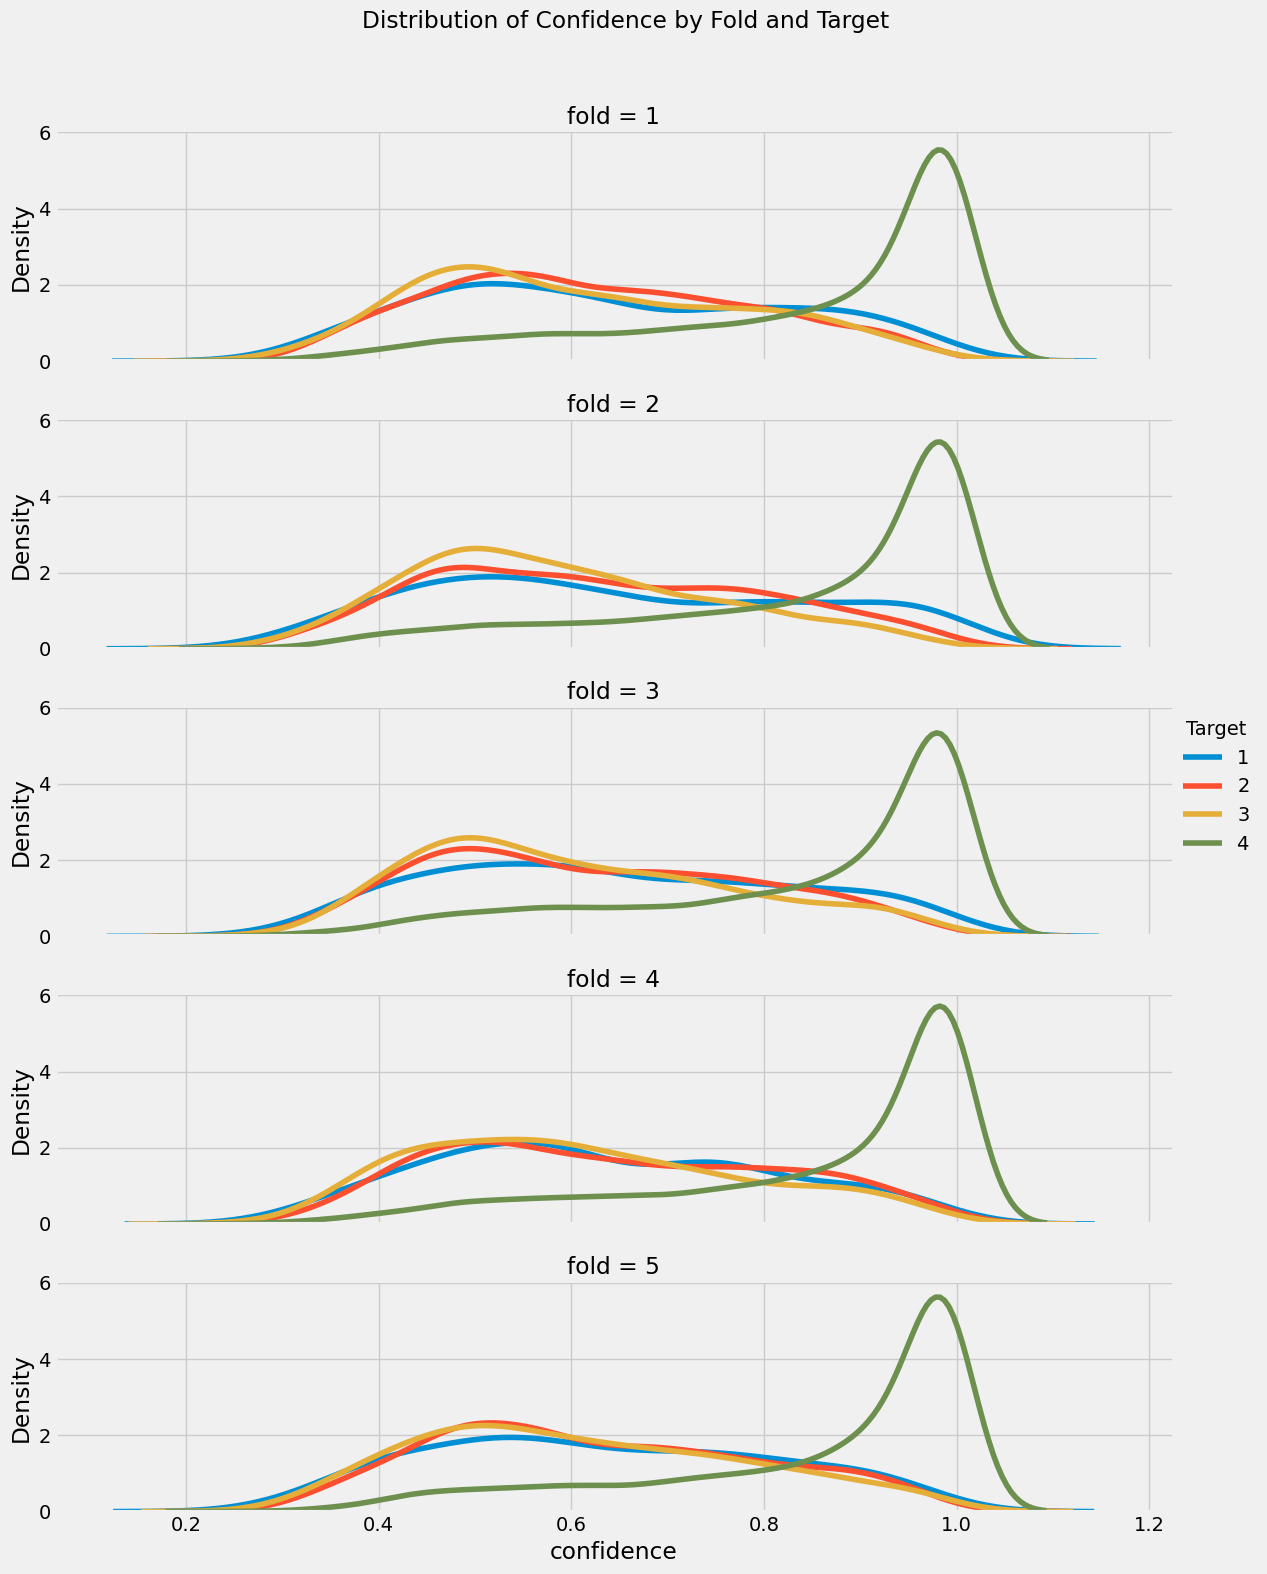

In [146]:
# plt.rcParams['font.size'] = 18

## Kdeplot
g = sns.FacetGrid(predictions, row='fold', hue='Target', height=3, aspect=4)
g.map(sns.kdeplot, 'confidence')
g.add_legend()

plt.suptitle('Distribution of Confidence by Fold and Target', y=1.05);

What we see here is that the `confidence` for each class if relatively low. It does appear that the model has greater confidence in Target=4 predictions which makes sense because of the class imbalance and the high prevalence of this label.  
  
Another way to look at the information is as a violinplot. This shows the same information, with the number of observations related to the width of the plot.  
  
__DeepL 번역__  
여기서 볼 수 있는 것은 각 클래스에 대한 `confidence`가 상대적으로 낮다는 것입니다. 이 모델은 Target=4 예측에 대한 신뢰도가 더 높은 것으로 보이는데, 이는 클래스 불균형과 이 레이블의 높은 유병률로 인해 이해가 됩니다.  
  
정보를 살펴볼 수 있는 또 다른 방법은 바이올린 플롯입니다. 이것은 플롯의 너비와 관련된 관찰 수와 함께 동일한 정보를 보여줍니다.

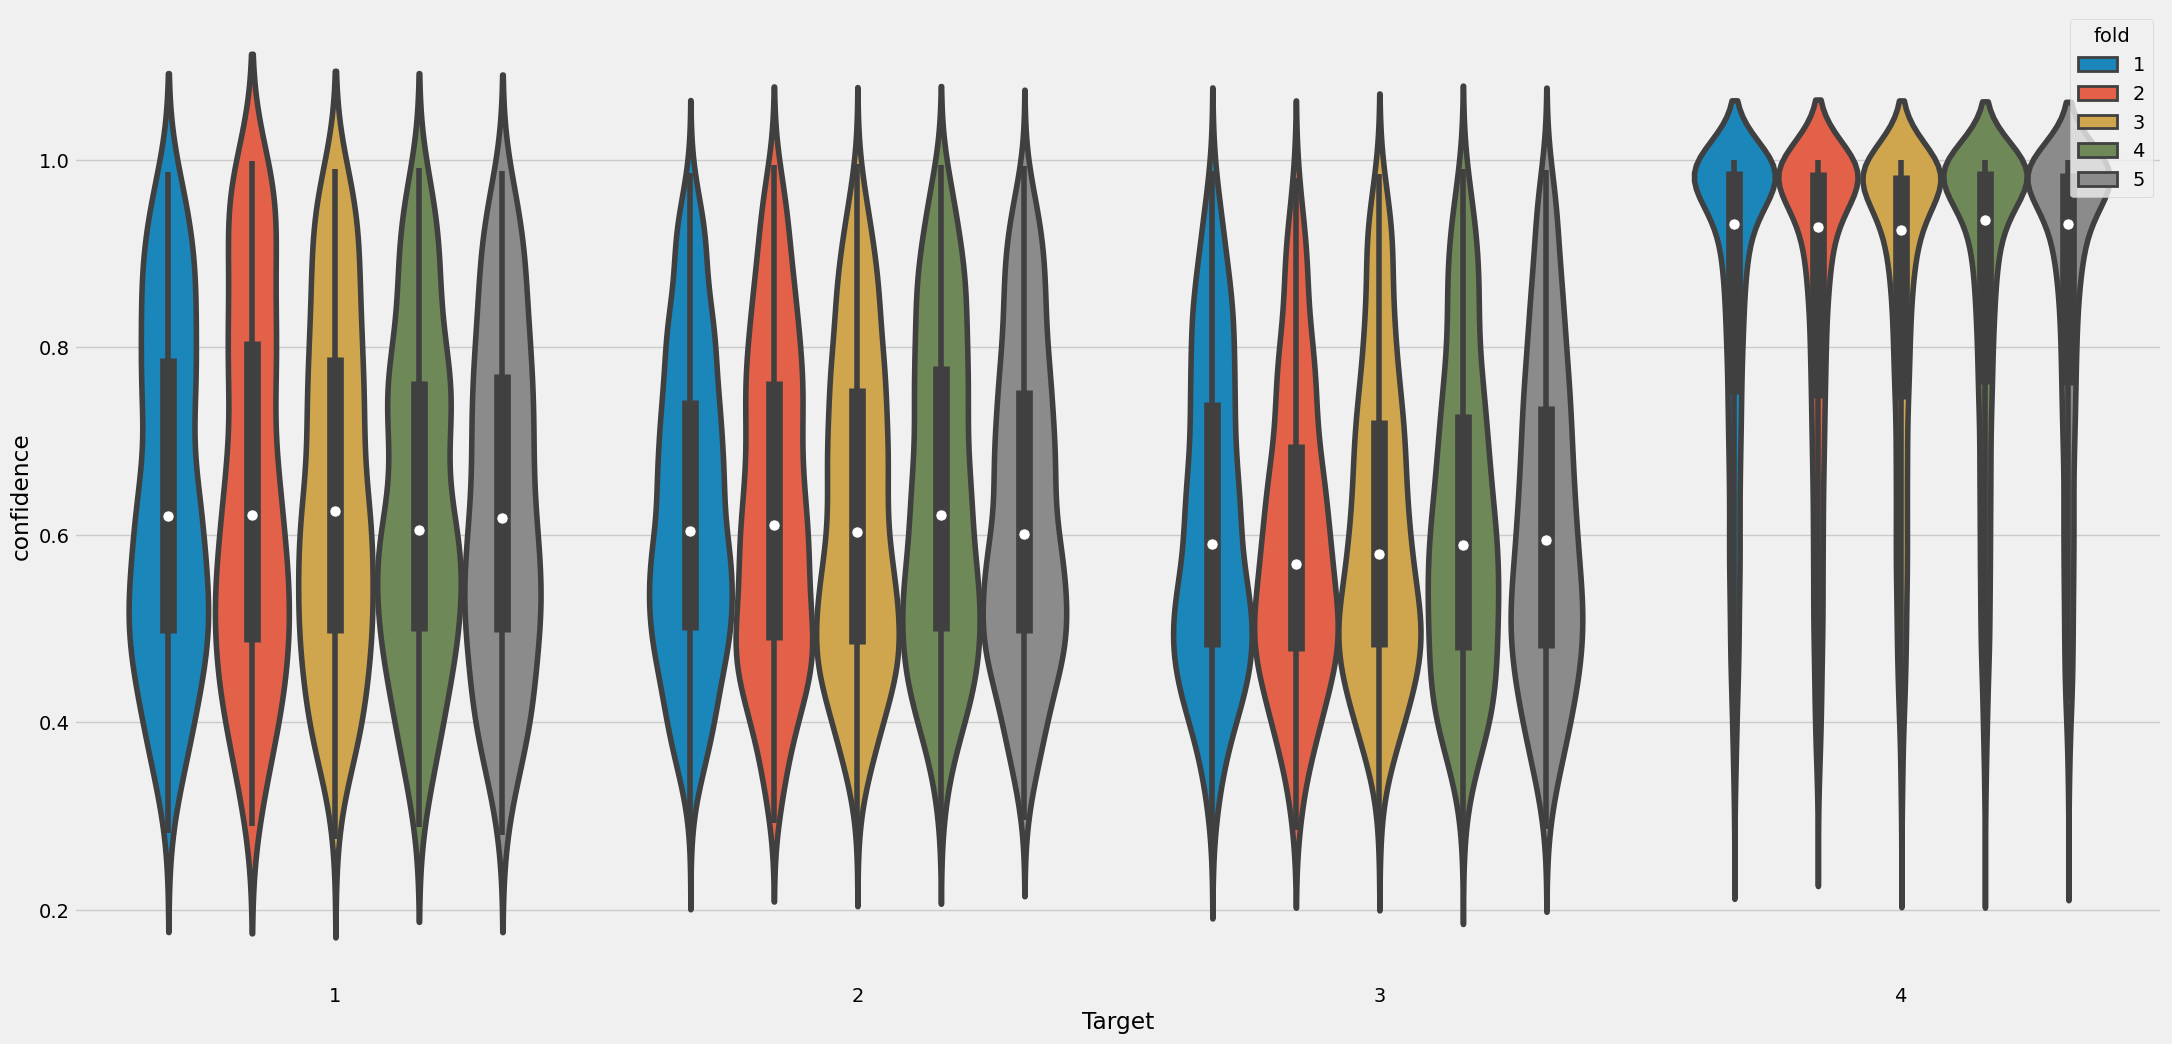

In [147]:
plt.figure(figsize=(24,12))
sns.violinplot(x='Target', y='confidence', hue='fold', data=predictions);

Overall, these results show the issue with imbalanced class problems: our model cannot distinguish very well between the classes that are underrepresented. Later we'll look at predictions themselves and see where our model is "confused". For now, we can generate a submission file and submit it to the competition.  
  
When we actually make predictions for each household, we average the predictions from each of the folds. Therefore, we are essentially using multiple models since each one is trained on a slightly different fold of the data. The gradient boosting machine is already an ensemble machine learning model, and now we are using it almost as a meta-ensemble by averaging predictions from several gbms.  
  
This process is shown in the code below.  
  
__DeepL 번역__  
전반적으로 이러한 결과는 불균형한 계층 문제의 문제점을 보여줍니다: 우리 모델은 과소 대표되는 클래스를 잘 구분하지 못합니다. 나중에 예측 자체를 살펴보고 모델이 어디에서 '혼동'되는지 살펴보겠습니다. 지금은 제출 파일을 생성하여 대회에 제출할 수 있습니다. 

실제로 각 가구에 대한 예측을 할 때는 각 예측의 평균을 구합니다. 따라서 각 모델이 조금씩 다른 데이터 폴드에 대해 학습되기 때문에 기본적으로 여러 모델을 사용하고 있습니다. 그라디언트 부스팅 머신은 앙상블 머신 러닝 모델이며, 이제 여러 GBM의 예측을 평균화하여 거의 메타 앙상블처럼 사용하고 있습니다. 

이 과정은 아래 코드에 나와 있습니다.

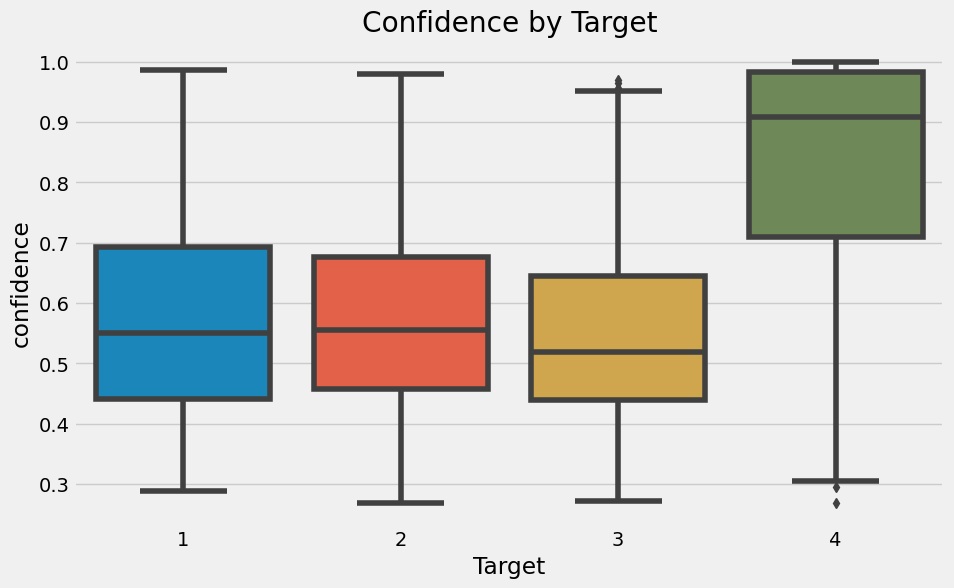

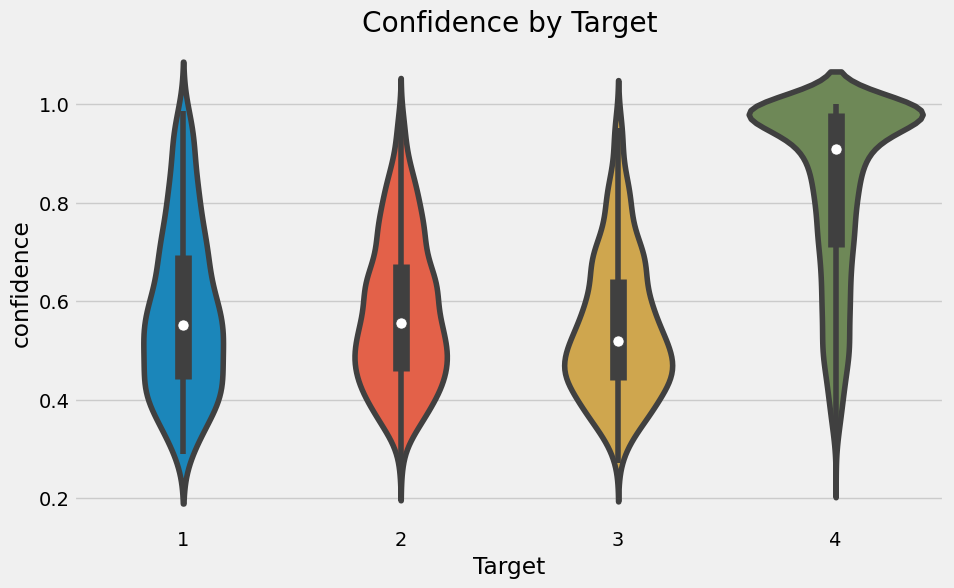

In [148]:
## Average the predictions over folds
predictions = predictions.groupby('idhogar', as_index=False).mean()

## Find the class and associated probability
predictions['Target'] = predictions[[1,2,3,4]].idxmax(axis=1)    # df.idxmax: 최갯값의 index명 반환.
predictions['confidence'] = predictions[[1,2,3,4]].max(axis=1)
predictions = predictions.drop(columns = ['fold'])

## Plot the confidence by each target
plt.figure(figsize=(10,6))
sns.boxplot(x='Target', y='confidence', data=predictions)
plt. title('Confidence by Target')

plt.figure(figsize=(10,6))
sns.violinplot(x='Target', y='confidence', data=predictions)
plt. title('Confidence by Target');

We can have the function instead return the actual submission file. This takes the average predictions across the five folds, in effectm combining 5 different models, each one trained on a slghtly different subset of the data.  
  
__DeepL 번역__  
우리는 실제 제출 파일을 대신 반환하는 기능을 만들 수 있습니다. 이렇게 하면 5개의 서로 다른 모델을 결합하여 5개의 평균 예측값을 구할 수 있으며, 각 모델은 데이터의 약간 다른 하위 집합에 대해 학습됩니다.

In [149]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels,
                                             test_set, test_ids, return_preds=False)

# submission.to_csv('gbm_baseline.csv')

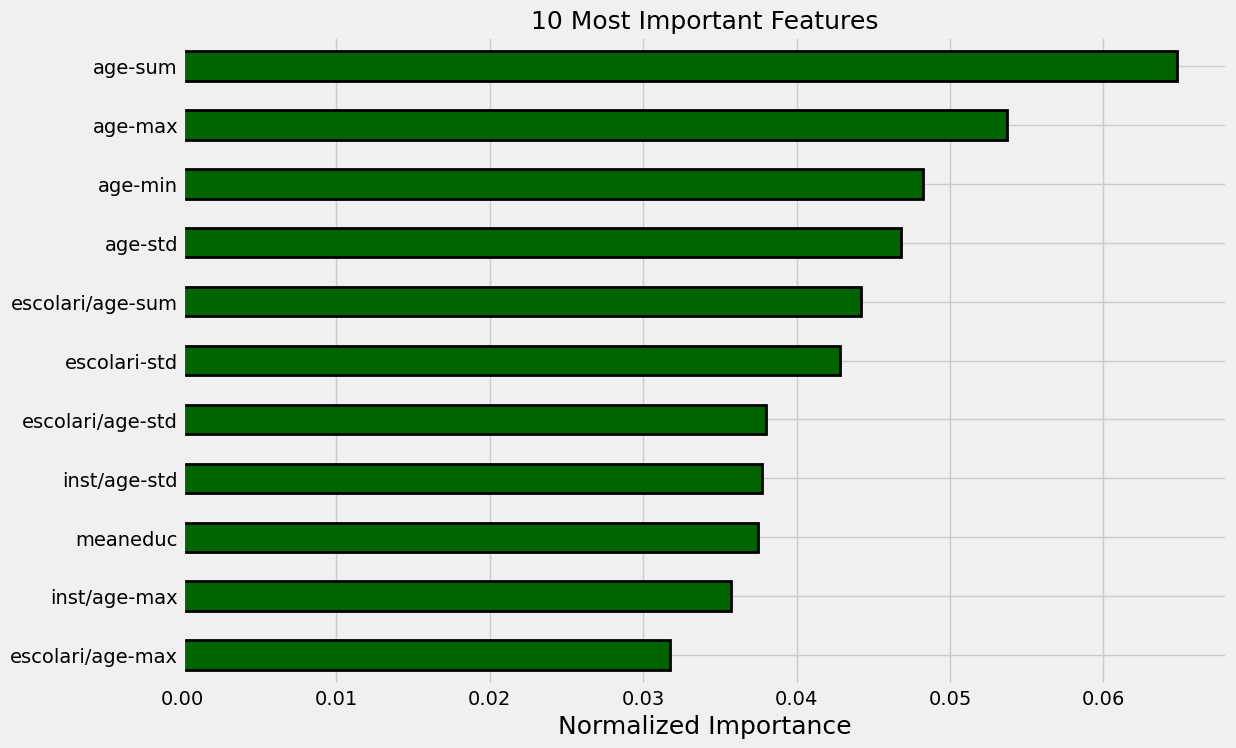

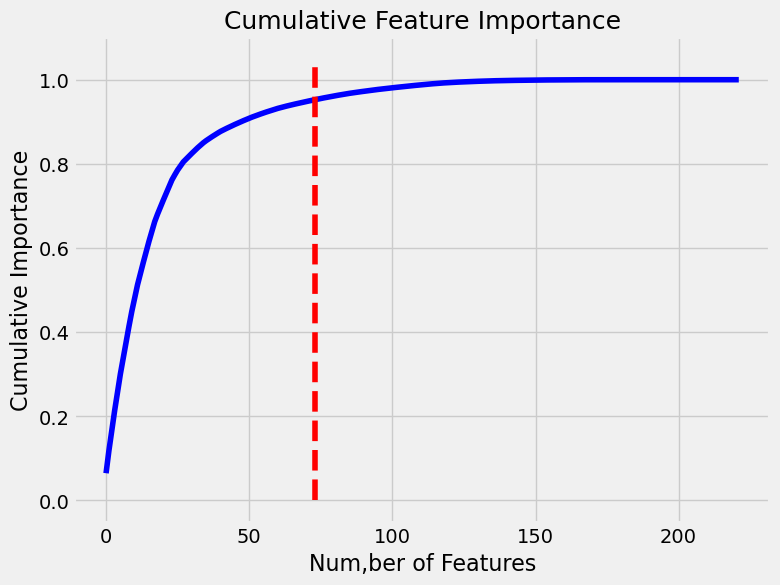

73 features required for 95% of cumulative importance.


In [150]:
_ = plot_feature_importances(gbm_fi, threshold=0.95)

The gbm seems to think the most important features are those derived from ages. The education variables also show up in the most important features.  
  
### Try Selected Features
The next step with the LightGBM is to try the features that were selected through recursive feature elimination.  
  
### DeepL 번역
gbm은 가장 중요한 특징이 연령에서 파생된 특징이라고 생각하는 것 같습니다. 교육 변수도 가장 중요한 기능에 나타납니다.  
  
### 선택된 기능 사용해 보기
LightGBM의 다음 단계는 재귀적 기능 제거를 통해 선택된 기능을 사용해 보는 것입니다.

In [151]:
%%capture --no-display
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels,
                                                                test_selected, test_ids)

'Fold 1, Validation Score: 0.19818, Estimators Trained: 0'

'Fold 2, Validation Score: 0.21737, Estimators Trained: 0'

'Fold 3, Validation Score: 0.20889, Estimators Trained: 0'

'Fold 4, Validation Score: 0.21338, Estimators Trained: 0'

'Fold 5, Validation Score: 0.19877, Estimators Trained: 0'

'5 cross validation score: 0.20732 with std: 0.0077'

In [152]:
# model_results = model_results.append(pd.DataFrame({'model': ['GBM', 'GBM_SEL'],
#                                                    'cv_mean': [valid_scores.mean(), vaild_scores_selected.mean()],
#                                                    'cv_std': [valid_scores.std(), valid_scores_selected.std()]}),
#                                                    sort=True)

model_results = pd.concat([model_results, pd.DataFrame({'model': ['GBM', 'GBM_SEL'],
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std': [valid_scores.std(), valid_scores_selected.std()]})],
                                                   sort=True)

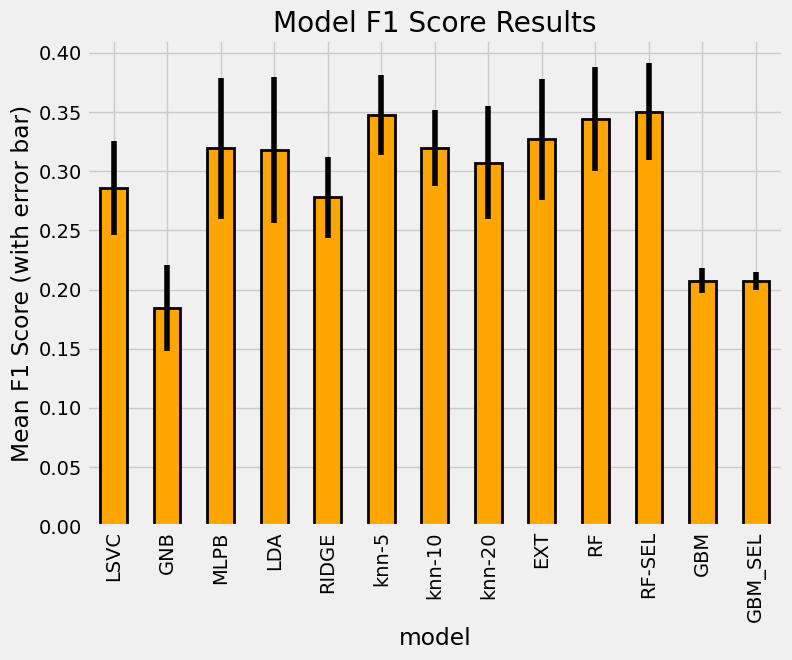

In [153]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8,6),
                                  yerr=list(model_results['cv_std']),
                                  edgecolor='k', linewidth=2)
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

The massive advantage of the gradient boosting machine is on display here. For a final step, let's try using 10-folds with both sets and add them to the plot.

In [154]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids,
                                             nfolds=10, return_preds=False)

In [155]:
# submission.to_csv('gbm_10fold.csv', index=False)

In [156]:
%%capture
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_set, train_labels, test_set, test_ids,
                                                                nfolds=10)

In [157]:
# submission.to_csv('gbm_10fold_selected.csv', index=False)

In [158]:
model_results = pd.concat([model_results, pd.DataFrame({'model': ['GBM_10Flod', 'GBM_10Fold_SEL'],
                                                       'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                       'cv_std': [valid_scores.std(), valid_scores_selected.std()]})],
                        sort=True)

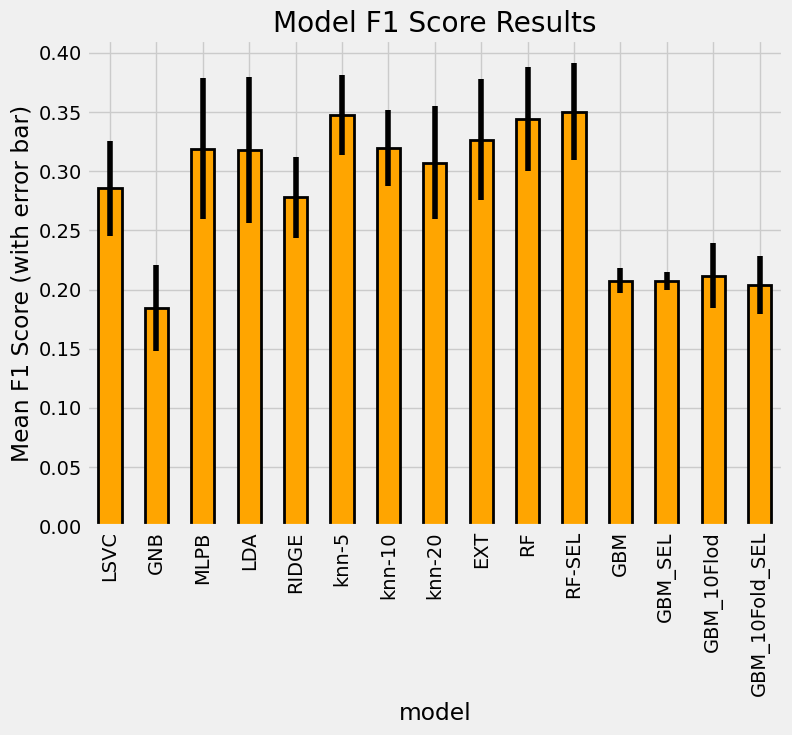

In [159]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8,6),
                                  edgecolor='k', linewidth=2,
                                  yerr=list(model_results['cv_std']))
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

The best model seems to be the Gradient Boosting Machine trained with 10 folds on the selected features. This model has not yet been optimized, but we might be able to get a little more performance through optimization.

In [160]:
print(f'There are {gbm_fi_selected[gbm_fi_selected["importance"]==0].shape[0]} features with no importance.')

There are 41 features with no importance.


Well that should make us feel better! All of the features we are using have some importance to the Gradient Boosting Machine. It might be a good idea to go back and retry feature selection but with the GBM since that is the model we are using.

The next step to take is Model Optimization, the process of getting the most from a machine learning model.

## Model Optimization
Model optimization is the process of extracting the best performance from a machine learning model by tuning the hyperparameters through cross-validation. This is necessary because the best model hyperparameters are different for every dataset.  
  
In this notebook, we won't get too far into model tuning, but there are multiple options:
1. Manual
2. Grid Search
3. Random Search
4. Automated Optimization

We will stick to 4. because it is generally the most efficient method and can easily be implemented in a number of libraries, including Hyperopt, which uses a modified version of Bayesian Optimization with the Tree Parzen Estimator.
  
## DeepL 번역
모델 최적화는 교차 검증을 통해 하이퍼파라미터를 조정하여 머신러닝 모델에서 최상의 성능을 추출하는 프로세스입니다. 최적의 모델 하이퍼파라미터는 데이터 세트마다 다르기 때문에 이 작업이 필요합니다.  
  
이 노트북에서는 모델 튜닝에 대해 자세히 다루지는 않겠지만, 여러 가지 옵션이 있습니다:
1. Manual
2. Grid Search
3. Random Search
4. Automated Optimization

우리는 4번을 사용할 것인데 그것은 일반적으로 가장 효과적인 방법이며 Tree Parzen Estimator와 함께 Bayesian Optimization의 수정된 버전을 사용하는 Hyperopt를 비롯한 여러 라이브러리에서 쉽게 구현할 수 있기 때문입니다.

## Model Tuning with Hyperopt
Bayesian optimization requires 4 parts:
1. Objective function: what we want to maximize (or minimize)
2. Domain space: region over which to search
3. Algorithm for choosing next hyperparameters: uses past results to suggest next values
4. Results history: saves the past results
    
I've written previously about using Hyperopt, so here we'll stick to the implementation.  
  
## DeepL 번역
Bayesian optimization에는 4가지 부분이 필요합니다:
1. Objective function: 최대화(또는 최소화)하고자 하는 대상
2. Domain space: 검색할 영역
3. Algorithm for choosing next hyperparameters: 과거 결과를 사용하여 다음 값을 제안합니다.
4. Results history: 과거 결과 저장
    
이전에 Hyperopt 사용에 대한 글을 작성했으므로 여기서는 구현에 집중하겠습니다.

In [161]:
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from hyperopt.pyll.stochastic import sample     # sample(space): hp를 통해 만든 하이퍼파라미터를 보기 위한 함수?
# hyperopt: 위에서 설명한대로 하이퍼파라미터 튜닝 라이브러리. 참조: https://github.com/hyperopt/hyperopt/wiki/Fmin
# 참고용 노트북:https://www.kaggle.com/code/liamhealy/bayesian-hyperparameter-tuning-in-python


In [162]:
import csv
import ast
from timeit import default_timer as timer

### 1. Objective Function
This takes in the model hyperparameters and returns the associated validation score. Hyperopt needs a score to minimize, so we return 1 - Macro F1 score.  
  
### DeepL 번역
이 함수는 모델 하이퍼파라미터를 받아 the associated validation score를 반환합니다. Hyperopt는 최소화할 score가 필요하므로 1 - Macro F1 score를 반환합니다


In [163]:
def objective(hyperparameters, nfolds=5):
    """Return validation score from hyperparameters for LightGBM"""

    ## Keep track of evals
    global ITERATION
    ITERATION += 1

    ## Retrieve the subsample
    subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    subsample_freq = hyperparameters['boosting_type'].get('subsample_freq', 0)
    
    boosting_type = hyperparameters['boosting_type']['boosting_type']

    if boosting_type == 'dart':
        hyperparameters['drop_rate'] = hyperparameters['boosting_type']['drop_rate']
    
    ## Subsample and subsample frequency to top level keys
    hyperparameters['subsample'] = subsample
    hyperparameters['subsample_freq'] = subsample_freq
    hyperparameters['boosting_type'] = boosting_type

    ## Wether or not to use limit maximum depth
    if not hyperparameters['limit_max_depth']:
        hyperparameters['max_depth'] = -1
    
    ## Make sure parameters that need to be integers are integers
    for parameter_name in ['max_depth', 'num_leaves', 'subsample_for_bin',
                           'min_child_samples', 'subsample_freq']:
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])
    
    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    ## Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits=nfolds, shuffle=True)

    ## Convert to arrays for indexing
    features = np.array(train_selected)
    labels = np.array(train_labels).reshape((-1))
    
    valid_scores = []
    best_estimators = []
    run_times = []

    model = lgb.LGBMClassifier(**hyperparameters, class_weight = 'balanced',
                                n_jobs=-1, metric='None',
                                n_estimators=10000)
    
    ## Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):

        ## Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]

        start = timer()
        ## Train with early stopping
        model.fit(X_train, y_train,
                #   early_stopping_round=100
                  callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=400)],
                  eval_metric=macro_f1_score,
                  eval_set=[(X_train,y_train), (X_valid,y_valid)],
                  eval_names=['train', 'valid'],
                #   verbose=400
                  )
        end = timer()
        ## Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        best_estimators.append(model.best_iteration_)

        run_times.append(end-start)
    
    score = np.mean(valid_scores)
    score_std = np.std(valid_scores)
    loss = 1-score

    run_time = np.mean(run_times)
    run_time_std = np.std(run_times)

    estimators = int(np.mean(best_estimators))

    ## Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, score, score_std])
    of_connection.close()

    ## Display progress
    if ITERATION % PROGRESS == 0:
        display(f'Iteration: {ITERATION}, Current Score: {round(score, 4)}.')

    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'time': run_time, 'time_std': run_time_std, 'status': STATUS_OK,
            'score': score, 'score_std': score_std}

### 2. Search Space
The domain is the entire range of values over which we want to search. The only difficult part is the `subsample` ratio which must be set to 1.0 if the `boosting_type="goss"`. Feel free to play around with the values here.  
  
### DeepL 번역
도메인은 검색하고자 하는 전체 값의 범위입니다. 유일하게 어려운 부분은 `boosting_type="goss"`인 경우 1.0으로 설정해야 하는 `subsample` 비율입니다. 여기에서 값을 자유롭게 가지고 놀아보세요.

In [164]:
## Define the search space
# hp.choice(label, options): label(파라미터)를 options(리스트)에서 임의 값 반환(random smapling).
# hp.uniform(label, low, high): label(파라미터)의 low와 high 사이에서 균일한 간격 기준(의 임의 배열)으로 탐색
# hp.quniform(label, low, high, q): label(파라미터)의 low와 high 사이에서 q 간격 기준(으로 만들어진 배열)으로 탐색.
# hp.quniform(low, high, q) == round(uniform(low, high) / q) * q
space = {
    'boosting_type': hp.choice('boosting_type',
                               [{'boosting_type': 'gbdt',
                                 'subsample': hp.uniform('gbdt_subsample', 0.5, 1),
                                 'subsample_freq': hp.quniform('gbdt_subsample_freq', 1, 10, 1)},
                                {'boosting_type': 'dart',
                                 'subsample': hp.uniform('dart_subsample', 0.5, 1),
                                 'subsample_freq': hp.quniform('dart_subsample_freq', 1, 10, 1),
                                 'drop_rate': hp.uniform('dart_drop_rate', 0.1, 0.5)},
                                {'boosting_type': 'goss',
                                 'subsample': 1.0,
                                 'subsample_freq': 0}]),
    'limit_max_depth': hp.choice('limit_max_depth', [True, False]),
    'max_depth': hp.quniform('max_depth', 1, 40, 1),
    'num_leaves': hp.quniform('num_leaves', 3, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.025), np.log(0.25)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 2000, 100000, 2000),
    'min_child_samples': hp.quniform('min_child_samples', 5, 80, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.5, 1.0)
}

In [165]:
sample(space)

{'boosting_type': {'boosting_type': 'goss',
  'subsample': 1.0,
  'subsample_freq': 0},
 'colsample_bytree': 0.7676945694998538,
 'learning_rate': 0.04106729387916599,
 'limit_max_depth': True,
 'max_depth': 4.0,
 'min_child_samples': 40.0,
 'num_leaves': 39.0,
 'reg_alpha': 0.07302860284226476,
 'reg_lambda': 0.40509111659013175,
 'subsample_for_bin': 76000.0}

### 3. Algorithm
The algorithm for choosing the next values is the Tree Parzen Estimator which uses Bayes rule for constructing a surrogate model of the objective function. Instead of maximizing the objective function, the algorithm maximizes the Expected Improvement (EI) of the surrogate model.  
  
### DeepL 번역
다음 값을 선택하는 알고리즘은 목적 함수의 대리 모델을 구성하는 데 Bayes rule을 사용하는 Tree Parzen Estimator입니다. 이 알고리즘은 목적 함수를 최대화하는 대신 대리 모델의 기대 개선도(EI)를 최대화합니다.

In [166]:
algo = tpe.suggest

### 4. Results History
We'll use two different methods for recording results:

1. Trials object: stores everything returned from the objective function
2. Write to a csv file on every iteration

I like using multiple methods for tracking progress because it means redundancy. One way may fail, but hopefully both will not! The csv file can be used to monitor the method while it is running and the Trials object can be saved and then reloaded to resume optimization.  
  
### DeepL 번역
결과를 기록하는 데는 두 가지 방법을 사용합니다:
  
1. 트라이얼 객체: 목적 함수에서 반환된 모든 것을 저장합니다.
2. 반복할 때마다 CSV 파일에 쓰기
  
저는 진행 상황을 추적하는 데 여러 가지 방법을 사용하는 것을 좋아하는데, 이는 중복성을 의미하기 때문입니다. 한 가지 방법이 실패할 수도 있지만 두 가지 방법 모두 실패하지 않기를 바랍니다! csv 파일을 사용하여 메서드가 실행되는 동안 메서드를 모니터링하고 Trials 객체를 저장한 다음 다시 로드하여 최적화를 다시 시작할 수 있습니다.

In [167]:
## Record results
trials = Trials()

## Create a file and open a connection
OUT_FILE = 'optimization.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

MAX_EVALS = 100
PROGRESS = 10
N_FOLDS = 5
ITERATION = 0

## Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score', 'std']
writer.writerow(headers)
of_connection.close()

In [168]:
%%capture --no-display
display("Running Optimization for {} Trials.".format(MAX_EVALS))

## Run optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials,
            # fn: 목표 함수, space: 탐색할 하이퍼 파라미터 공간, algo: 탐색 알고리즘, trials: 로그 기록 및 호출
            max_evals=MAX_EVALS)

'Running Optimization for 100 Trials.'

'Iteration: 10, Current Score: 0.2308.'

'Iteration: 20, Current Score: 0.2275.'

'Iteration: 30, Current Score: 0.2176.'

In [ ]:
import json

## Save the trial results
with open('trials.json', 'w') as f:
    f.write(json.dumps(str(trials)))

### Using Optimized Model
Once the optimization procedure has finished, we can use the best results for modeling.

In [ ]:
results = pd.read_csv(OUT_FILE).sort_values('loss', ascending=True).reset_index()
results.head()

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='iteration', y='score', data=results)
plt.title('Optimization Scores')
plt.xticks(list(range(1, results['iteration'].max()+1, 3)));

In [ ]:
best_hyp = ast.literal_eval(results.loc[0, 'hyperparameters'])
best_hyp

In [ ]:
%%capture
submission, gbnm_fi, valid_scores = model_gbm(train_selected, train_labels,
                                              test_selected, test_ids,
                                              nfolds=10, return_preds=False)

model_results = pd.concat([model_results, pd.DataFrame({'model': ['GBM_OPT_10Flod_SEL'],
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std': [valid_scores.std()]})],
                                                   sort=True).sort_values('cv_mean', ascending=False)

In [ ]:
%%capture
submission, gbnm_fi, valid_scores = model_gbm(train_selected, train_labels,
                                              test_selected, test_ids,
                                              nfolds=10, return_preds=False)

model_results = pd.concat([model_results, pd.DataFrame({'model': ['GBM_OPT_10Flod'],
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std': [valid_scores.std()]})],
                                                   sort=True).sort_values('cv_mean', ascending=False)

In [ ]:
model_results.head()

In [ ]:
submission.to_csv('gbm_opt_10fold_selected.csv', index=False)

At this point, to improve our performance, we can continue with the optimization, try more feature engineering, stack or ensemble additional models, or look at more experimental methods such as dimension reduction or oversampling. However, the scores we are getting are fairly good and I'm going to move on to a crucial part of machine learning: investigating the predictions to see where our model is wrong.  
  
While Kaggle is great for presenting realistic datasets, the methods needed to get to the very top of the leaderboard are not generally used in the real-world. Past some level of performance, accuracy takes a back seat to interpretability. People want to know why a model makes the predictions it does, much as they would want a human to be able to explain her decisions. We could work on squeezing some more performance from our model, but right now, our energy is better spent investigating our model.  
  
__DeepL 번역__  
이 시점에서 성능을 개선하기 위해 최적화를 계속하거나, 더 많은 기능 엔지니어링을 시도하거나, 추가 모델을 스택 또는 앙상블하거나, 차원 축소 또는 오버샘플링과 같은 실험적인 방법을 살펴볼 수 있습니다. 하지만 현재 얻은 점수는 상당히 좋으므로 이제 머신 러닝의 중요한 부분인 예측을 조사하여 모델이 어디가 잘못되었는지 확인하는 단계로 넘어가려고 합니다.  
  
Kaggle은 현실적인 데이터 세트를 제시하는 데는 훌륭하지만, 리더보드의 맨 위에 오르는 데 필요한 방법은 일반적으로 실제 세계에서 사용되지 않습니다. 일정 수준의 성능이 지나면 정확성은 해석 가능성보다 뒷전으로 밀려납니다. 사람들은 사람이 자신의 결정을 설명해 주기를 바라는 것처럼 모델이 왜 그런 예측을 했는지 알고 싶어합니다. 모델에서 더 많은 성능을 끌어내기 위해 노력할 수도 있지만, 지금은 모델을 조사하는 데 더 많은 에너지를 쏟는 것이 좋습니다.

In [ ]:
_ = plot_feature_importances(gbm_fi)

### Investigate Predictions
As a first attempt at looking into our model, we can visualize the distribution of predicted labels on the test data. We would expect these to show the same distribution as on the training data. Since we are concerned with household predictions, we'll look at only the predictions for each house and compare with that in the training data.   
  
The following histrograms are normalize meaning that they show the relative frequency instead of the absolute counts. This is necessary because the raw counts differ in the training and testing data.  
  
### DeepL 번역
모델을 살펴보기 위한 첫 번째 시도로 테스트 데이터에서 예측된 레이블의 분포를 시각화할 수 있습니다. 학습 데이터와 동일한 분포를 보일 것으로 예상됩니다. 우리는 가구 예측에 관심이 있으므로 각 가구에 대한 예측만 살펴보고 학습 데이터의 예측과 비교하겠습니다.  
  
다음 히스토그램은 정규화된 것으로, 절대 횟수 대신 상대적인 빈도를 보여줍니다. 이는 훈련 데이터와 테스트 데이터에서 원시 카운트가 다르기 때문에 필요합니다.

In [ ]:
preds = submission_base.merge(submission, on='Id', how='left')
preds = pd.DataFrame(preds.groupby('idhogar')['Target'].mean())

## Plot the training labels distribution
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))     # sharey: x, y축 동기화
heads['Target'].sort_index().plot.hist(density=True,
                                       edgecolor=r'k',
                                       linewidth=2,
                                       ax=axes[0])
axes[0].set_xticks([1,2,3,4])
axes[0].set_xticklabels(poverty_mapping.values(), rotation=60)
axes[0].set_title('Train Label Distribution')

## Plot the predicted labels                                        
heads['Target'].sort_index().plot.hist(density=True,
                                       edgecolor=r'k',
                                       linewidth=2,
                                       ax=axes[1])
axes[1].set_xticks([1,2,3,4])
axes[1].set_xticklabels(poverty_mapping.values(), rotation=60)
plt.subplots_adjust()   # plt.subplots_adjust(left, bottom, right, top, wspace, hspace): 서브플롯 간 간격 조정. 미입력은 최근접.
plt.title('Predicted Label Distribution');

In [ ]:
heads['Target'].value_counts()

In [ ]:
preds['Target'].value_counts()

The predicted distribution looks close to the training distribution although there are some differences. Depending on the run of the notebook, the results you see may change, but for this edition, the 4s are underrepresented in the predictions and the 3s are overrepresented.  
  
One potentially method for dealing with imbalanced classification problems is [oversampling the minority class](https://imbalanced-learn.org/stable/over_sampling.html), which is easy to do in Python using the imbalanced learn library. We won't explore that option here.  
  
__DeepL 번역__  
예측 분포는 약간의 차이는 있지만 훈련 분포와 비슷해 보입니다. 노트북의 실행에 따라 표시되는 결과가 달라질 수 있지만, 이 버전에서는 예측에서 4번이 과소 대표되고 3번이 과대 대표됩니다.  
  
불균형 분류 문제를 해결하기 위한 한 가지 잠재적인 방법은 [oversampling the minority class](https://imbalanced-learn.org/stable/over_sampling.html)이며, 이는 불균형 학습 라이브러리를 사용하여 Python에서 쉽게 수행할 수 있습니다. 여기서는 이 옵션을 살펴보지 않겠습니다.

### Validation
For the test predictions, we can only compare the distribution with that found on the training data. If we want to compare predictions to actual answers, we'll have to split the training data into a separate validation set. We'll use 1000 examples for testing and then we can do operations like make the confusion matrix because we have the right answer.  
  
### DeepL 번역
테스트 예측의 경우, 학습 데이터에서 발견된 분포와만 비교할 수 있습니다. 예측과 실제 답변을 비교하려면 학습 데이터를 별도의 검증 집합으로 분할해야 합니다. 테스트에 1000개의 예시를 사용한 다음 정답이 있으므로 confusion matrix을 만드는 것과 같은 작업을 수행할 수 있습니다.

In [ ]:
from sklearn.model_selection import train_test_split

## Split into validation set
X_train, X_valid, y_train, y_valid = train_test_split(train_selected,
                                                    train_labels,
                                                    test_size=1000,
                                                    random_state=10)


## Create model and train
model = lgb.LGBMClassifier(**best_hyp,
                          class_weight = 'balanced',
                          random_state=10)
model.fit(X_train, y_train);

In [ ]:
## Make validation predictions
valid_preds = model.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds, columns=[1,2,3,4])

## Convert into predictions
preds_df['prediction'] = preds_df[[1,2,3,4]].idxmax(axis=1)
preds_df['confidence'] = preds_df[[1,2,3,4]].max(axis=1)

preds_df.head()

In [ ]:
print('F1 score:', round(f1_score(y_valid, preds_df['prediction'], average='macro'), 5))

Let's use our predictions to plot a confusion matrix. This lets us see where the model is "confused" by showing the differences between predictions and true values. The code for this confusion matrix is adapted from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html  
  
__DeepL 번역__  
예측을 사용하여 confusion matrix를 그려 보겠습니다. 이를 통해 예측값과 실제 값의 차이를 표시하여 모델이 '혼동'되는 부분을 확인할 수 있습니다. 이 confusion matrix의 코드는 다음에서 가져왔습니다: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.

    ## Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                 horizontalalignment='center',
                 color='white' if cm[i, j]>thresh else 'black')
    
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)

In [ ]:
cm = confusion_matrix(y_valid, preds_df['prediction'])
plot_confusion_matrix(cm, classes=['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title='Poverty Confusion Matrix')

Here's how to read the confusion matrix: any of the values on the diagonal, the model got correct because the predicted value matches the true value. Anything not on the diagonal our model got wrong which we can assess by looking at the predicted value versus the actual value.  
  
For example, our model correctly predicted 25 observations where the poverty was extreme. On the other hand, for 26 cases where the poverty was extreme, our model predicted it was moderate. For 95 cases where the poverty was Non-Vulnerable, our model predicted the poverty was Vulnerable. Overall, we see that our model is only very accurate at idenifying the non-vulnerable households.  
  
To look at the percentage of each true label predicted in each class, we can normalize the confusion matrix for the true labels.  
  
__DeepL 번역__  
confusion matrix를 읽는 방법은 다음과 같습니다. 대각선에 있는 값은 예측값이 실제 값과 일치하므로 모델이 정확합니다. 대각선에 있지 않은 값은 모델이 잘못 예측한 값으로, 예측 값과 실제 값을 비교하여 평가할 수 있습니다.  
  
예를 들어, 우리 모델은 빈곤이 극심한 25개의 관측값을 정확하게 예측했습니다. 반면에 빈곤이 극심한 26건의 경우, 우리 모델은 빈곤이 보통이라고 예측했습니다. 빈곤이 비취약인 95건의 경우, 우리 모델은 빈곤이 취약한 것으로 예측했습니다. 전반적으로, 저희 모델은 취약하지 않은 가구를 식별하는 데만 매우 정확하다는 것을 알 수 있습니다.  
  
각 클래스에서 예측된 각 실제 레이블의 비율을 보려면 실제 레이블의 confusion matrix를 정규화하면 됩니다.  

In [ ]:
plot_confusion_matrix(cm, normalize=True,
                      classes=['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title='Poverty Confusion Matrix')

Now we can see that our model really does not do that well for classes other than Non Vulnerable. It only correctly identifies 15% of the Vulnerable households, classifying more of them as moderate or non vulnerable. Overall, these results show that imbalanced classification problems with relatively few observations are very difficult. There are some methods we can take to try and counter this such as oversampling or training multiple models on different sections of the data, but at the end of the day, the most effective method may be to __gather more data__.  
  
__DeepL 번역__  
이제 우리 모델이 비취약계층 이외의 계층에 대해서는 그다지 잘 작동하지 않는다는 것을 알 수 있습니다. 취약 가구의 15%만 정확하게 식별하여 더 많은 가구를 보통 또는 비취약 가구로 분류합니다. 전반적으로 이러한 결과는 관찰 수가 상대적으로 적은 불균형한 분류 문제가 매우 어렵다는 것을 보여줍니다. 이를 해결하기 위해 데이터의 여러 섹션에서 오버샘플링하거나 여러 모델을 훈련하는 등 몇 가지 방법을 시도할 수 있지만, 결국 가장 효과적인 방법은 __더 많은 데이터를 수집하는 것일__ 수 있습니다.

## Dimension Reduction
As a final exploration of the problem, we can apply a few different dimension reductions methods to the selected data set. These methods can be used for visualization or as a preprocessing method for machine learning. We'll look at four different methods:  

1. [PCA: Principal Components Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis). Finds the dimensions of greatest variation in the data
2. [ICA: Independent Components Analysis](https://en.wikipedia.org/wiki/Independent_component_analysis). Attempts to separate a mutltivariate signal into independent signals.
3. [TSNE: T-distributed Stochastic Neighbor Embedding](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). Maps high-dimensional data to a low-dimensional manifold attempting to maintain the local structure within the data. It is a non-linear technique and generally only used for visualization.
4. [UMAP: Uniform Manifold Approximation and Projection](https://arxiv.org/pdf/1802.03426.pdf): A relatively new technique that also maps data to a low-dimensional manifold but tries to preserve more global structure than TSNE.

All four of these methods are relatively simple to implement in Python. We'll map the selected features down to 3 dimensions for visualization and then also use PCA, ICA, and UMAP as features for modeling (TSNE has no `transform` method and hence cannot be used for preprocessing).

In [ ]:
from umap import UMAP   # 차원 축소의 한 방법(아마도 t-SNE보다 더 발전한 방법)
from sklearn.decomposition import PCA, FastICA  # ICA(독립 성분 분석): 독립성이 최대가 되는 방향으로 하는 차원 축소 방법
from sklearn.manifold import TSNE   # t-SNE: t분포를 이용하여 고차원 벡터의 유사성을 보존하는 축소 방법. 연산량 많고 2, 3차원으로만 축소 가능.

n_components = 3

umap = UMAP(n_components=n_components)
pca = PCA(n_components=n_components)
ica = FastICA(n_components=n_components)
tsne = TSNE(n_components=n_components)

In [ ]:
train_df = train_selected.copy()
test_df = test_selected.copy()

for method, name in zip([umap, pca, ica, tsne],
                        ['umap', 'pca', 'ica', 'tsne']):

    ## TSNE has no transform method
    if name=='tsne':
        start = timer()
        reduction = method.fit_transform(train_selected)
        end = timer()
    
    else:
        start = timer()
        reduction = method.fit_transform(train_selected)
        end = timer()

        test_reduction = method.transform(test_selected)

        ## Add components to test data
        test_df['%s_c1' % name] = test_reduction[:, 0]
        test_df['%s_c2' % name] = test_reduction[:, 1]
        test_df['%s_c3' % name] = test_reduction[:, 2]
    
    ## Add components to training data for visualization and modeling
    train_df['%s_c1' % name] = reduction[:, 0]
    train_df['%s_c2' % name] = reduction[:, 1]
    train_df['%s_c3' % name] = reduction[:, 2]

    print(f'Method: {name} {round(end-start, 2)} seconds elapsed')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map
    Source: https://gist.github.com/jakevdp/91077b0cae40f8f8244a"""

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

cmap = discrete_cmap(4, base_cmap = plt.cm.RdYlBu)

train_df['label'] = train_labels

In [ ]:
## Plot each method
for method, name in zip([umap, pca, ica, tsne],
                        ['umap', 'pca', 'ica', 'tsne']):

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    p = ax.scatter(train_df['%s_c1' % name], train_df['%s_c2' % name], [train_df['%s_c1' % name]],
                   c=train_df['label'].astype(int), cmap=cmap)
    
    plt.title(f'{name.capitalize()}', size=22)
    fig.colorbar(p, aspect=4, ticks=[1,2,3,4])

It's difficult to see much clustering in these plots, which indicates that separating the poverty levels is hard given the available data. Machine learning models are only as effective as the data we give to them, and sometimes the data does not have enough information.  
  
As a final step, we can train a model using the added reductions from PCA, ICA, and UMAP. We'll use the same Light GBM hyperparameters from the optimization.  
  
__DeepL 번역__  
이 도표에서 군집이 많이 나타나지 않는 것은 사용 가능한 데이터로 빈곤층을 구분하기가 어렵다는 것을 나타냅니다. 머신러닝 모델은 우리가 제공하는 데이터만큼만 효과적이며, 때로는 데이터에 충분한 정보가 없는 경우도 있습니다.  
  
마지막 단계로 PCA, ICA 및 UMAP의 추가 감소를 사용하여 모델을 훈련할 수 있습니다. 여기서는 최적화에서 사용한 것과 동일한 Light GBM 하이퍼파라미터를 사용합니다.

In [ ]:
train_df, test_df = train_df.align(test_df, axis=1, join='inner')

In [ ]:
%%capture

submission, gbm_fi, valid_scores = model_gbm(train_df, train_labels,
                                             test_df, test_ids, nfolds=10,
                                             hyp=best_hyp)

In [ ]:
# submission.to_csv('gbm_opt_10fold_dr.csv', index=False)

In [ ]:
model_results = pd.concat([model_results, pd.DataFrame({'model': ['GBM_OPT_10Fold_DR'],
                                                        'cv_mean': [valid_scores.mean()],
                                                        'cv_std': [valid_scores.std()]})],
                            sort=True)

In [ ]:
model_results = model_results.sort_values('cv_mean')
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(10,8),
                                  edgecolor='k', linewidth=2,
                                  yerr=list(model_results['cv_std']))
plt.tilte('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

The dimensionality reduction components slightly hurt the overall score of the model. It's possible that they only lead to overfitting on the training data.  
  
Given the high importance of the dimension reduction components, it looks like they may be causing overfitting. The dimension reduction methods are not using any of the label information, which means they might not necessarily have any useful information for the model.  
  
__DeepL 번역__  
차원 감소 구성 요소는 모델의 전체 점수를 약간 떨어뜨립니다. 학습 데이터에 대한 과적합만 유발할 수 있습니다.  
  
차원 감소 구성 요소의 높은 중요성을 고려할 때 과적합을 유발하는 것으로 보입니다. 차원 축소 방법은 레이블 정보를 사용하지 않으므로 모델에 유용한 정보가 없을 수도 있습니다.

In [ ]:
_ = plot_feature_importances(gbm_fi)

## Visualize Single Decision Tree
As a final step, we can look at one decision tree in the random forest. First we'll limited the max depth for visability, and then we'll expand the tree all the way.  
  
The first step is simply to train a random forest and extract one tree (we could also train a single decision tree).  
  
## DeepL 번역
마지막 단계로 random forest의 의사 결정 트리를 살펴볼 수 있습니다. 먼저 가시성을 위해 최대 깊이를 제한한 다음 트리를 끝까지 확장해 보겠습니다.  
  
첫 번째 단계는 단순히 랜덤 포리스트를 훈련하고 하나의 트리를 추출하는 것입니다(단일 의사 결정 트리를 훈련할 수도 있습니다).

In [ ]:
model = RandomForestClassifier(max_depth=3, n_estimators=10)
model.fit(train_selected, train_labels)
estimator_limited = model.estimator_[5]
estimator_limited

In [ ]:
## We take the trained tree and export it as a `.dot` file using `export_graphviz`.

from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names=train_selected.columns,
                class_names=['extreme', 'moderate', 'vulnerable', 'non-vulnerable'],
                rounded=True, proportion=False, precision=2, filled=True)

In [ ]:
## Next we use a system command to convert dot file to png.

!dot - Tpng tree_limited.dot -o ree_limited.png

In [ ]:
## Finally, we can view the tree in a Jupyter Notebok using
## `IPython.display`(this is the nicest way to render an image. It also happens to be quite simple.

## Display in jupyter notebook
from IPython.display import Image
Image(filename='tree_limited.png')


### Visualize Tree with No Maximum Depth
When we don't limit the depth, the tree grows extremely deep! It's therefore usually helpful to do some limitation (unless you just like the look of the large tree)!

In [ ]:
## No maximum depth
model = RandomForestClassifier(max_depth=None, n_estimators=10)
model.fit(train_selected, train_labels)
estimator_nonlimited = model.estimator_[5]

export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names=train_selected.columns,
                class_names=['extreme', 'moderate', 'vulnerable', 'non-vulnerable'],
                rounded=True, proportion=False, precision=2)

!dot - Tpng tree_nonlimited.dot -o tree_nonlimited.png -Gdpi=600

In [ ]:
Image(filename='tree_nonlimited.png')

## Conclusions
In this notebook, we went through a step-by-step implementation of an entire data science solution to a real-world problem. Machine learning is really just a series of steps, each simple by themselves, with the overall result often extremely powerful.  
  
Our path was as follows:  

1. Understand the problem
2. Exploratory Data Analysis
    - Deal with data issues
    - Fill in missing values
3. Feature Engineering
    - Aggregate data
    - Feature selection in stages
4. Model Selection
    - Try many different models to see which one is most promising
    - Feature selection can also come into play
5. Model Optimization
    - Choose the best performing model and tune
6. Implementing best model
7. Investigate predictions
    - Identify model shortcomings
8. Try new techniques
    - Experiment and learn!

As stated in the introduction, while these steps do have a general order, there is nothing preventing us from repeating them based on subsequent work. For example, we often go back to feature engineering/selection after modeling if we are not satisfied with our performance. After investigating predictions, we might return to the modeling stage and re-think our approach.  
  
It's also important to keep in mind that machine learning is largely empirical: there are few established best practices so you need to constantly experiement to determine what works best. That's why we included the last step: we got to try out some new methods and even if they don't pay off for this project, they may be useful in the future. As data scientists we need to be constantly learning to do our work more effectively with the best tools possible.  
  
Our final model does well compared to others in the competition, but overall is not extremely accurate. There might be ways to improve performance, but overall, we might not have enough data to achieve exceptional metrics. That's an important point to remember: at the end of the day, the success or failure of a data science project will rest on the quality and quantity of available data. We have solved the problem of classifying household poverty in Porto Rica as well as we can with the available tools, and the next process if we were in charge would be figuring out what more data could be collected to yield a better solution.  
  
### Next Steps
Although we tried many possible approaches, there are still some methods that we did not implement but might prove useful:  

- Further Hyperparameter tuning: we did not spend much time optimizing the model and there are other packages for optimization that we could try.
- Further feature selection: we probably do not need to retain all of the features to get the same performance
- [Oversampling the minority class](https://imbalanced-learn.org/stable/over_sampling.html) / undersampling the majority class: an advanced techinque that might improve performance
- Ensembling or stacking multiple models. We could train models on different sections of the data and then combine their predictions to try and better separate the classes. It might also be worthwhile to include models other than the gradient boosting machine.

The most valuable part of a Kaggle competition is never the rewards, but the knowledge gained along the way. These contests are great for learning how to solve realistic problems and I approach every new problem as an opportunity to improve as a data scientist. Thanks for reading!  
  
If you're looking for more on this competition, I have a kernel using automated feature engineering for this problem: [Featuretools for Good](https://www.kaggle.com/code/willkoehrsen/featuretools-for-good).  
  
Best,  
  
Will  
  
## DeepL 번역
이 노트북에서는 실제 문제에 대한 전체 데이터 과학 솔루션을 단계별로 구현하는 과정을 살펴봤습니다. 머신 러닝은 일련의 단계로 이루어져 있으며, 각 단계는 그 자체로는 간단하지만 전체적인 결과는 매우 강력합니다.  
  
저희가 진행한 과정은 다음과 같습니다:  

1. 문제 이해
2. 탐색적 데이터 분석
    - 데이터 문제 처리
    - 누락된 값 채우기
3. 기능 엔지니어링
    - 데이터 집계
    - 단계별 특징 선택
4. 모델 선택
    - 다양한 모델을 시도하여 어떤 모델이 가장 유망한지 확인합니다.
    - 기능 선택도 가능합니다.
5. 모델 최적화
    - 가장 성능이 좋은 모델과 튜닝을 선택하세요.
6. 최상의 모델 구현
7. 예측 조사
    - 모델 단점 파악
8. 새로운 기법 시도
    - 실험하고 배우세요!

서론에서 언급했듯이 이러한 단계에는 일반적인 순서가 있지만, 후속 작업에 따라 반복하는 것을 막을 수 있는 것은 없습니다. 예를 들어, 모델링 후 성과가 만족스럽지 않으면 피처 엔지니어링/선택 단계로 돌아가는 경우가 많습니다. 예측을 조사한 후 모델링 단계로 돌아가 접근 방식을 다시 생각할 수도 있습니다.  
  
또한 머신 러닝은 대부분 경험적이라는 점을 명심해야 합니다. 정립된 모범 사례가 거의 없기 때문에 무엇이 가장 효과적인지 결정하기 위해 끊임없이 경험해야 합니다. 그렇기 때문에 마지막 단계에 새로운 방법을 시도해 보아야 하며, 이 프로젝트에서 성과를 거두지 못하더라도 향후에 유용할 수 있습니다. 데이터 과학자로서 우리는 가능한 최고의 도구를 사용하여 작업을 더 효과적으로 수행하는 방법을 끊임없이 배워야 합니다.  
  
우리의 최종 모델은 경쟁사의 다른 모델에 비해서는 잘 작동하지만 전반적으로 정확도가 매우 높지는 않습니다. 성능을 개선할 수 있는 방법이 있을 수 있지만, 전반적으로 뛰어난 지표를 달성하기에는 데이터가 충분하지 않을 수 있습니다. 결국 데이터 과학 프로젝트의 성공과 실패는 사용 가능한 데이터의 품질과 양에 달려 있다는 점을 기억해야 합니다. 우리는 사용 가능한 도구를 사용하여 포르투리카의 가구 빈곤층을 분류하는 문제를 최대한 해결했으며, 다음 단계는 더 나은 솔루션을 도출하기 위해 어떤 데이터를 더 수집할 수 있는지 알아내는 것입니다.  
  
### 다음 단계
여러 가지 가능한 접근 방식을 시도했지만 구현하지는 못했지만 유용할 수 있는 몇 가지 방법이 여전히 남아 있습니다:  

- 추가 하이퍼파라미터 튜닝: 모델 최적화에 많은 시간을 들이지 않았으며, 다른 최적화 패키지를 사용해 볼 수 있습니다.
- 추가 기능 선택: 동일한 성능을 얻기 위해 모든 기능을 유지할 필요는 없을 것입니다.
- [소수 클래스 오버샘플링](https://imbalanced-learn.org/stable/over_sampling.html) / 다수 클래스 언더샘플링: 성능을 향상시킬 수 있는 고급 기법
- 여러 모델 앙상블 또는 스태킹. 데이터의 여러 섹션에 대해 모델을 학습시킨 다음 예측을 결합하여 클래스를 더 잘 구분할 수 있습니다. 그라데이션 부스팅 머신 이외의 모델을 포함하는 것도 가치가 있을 수 있습니다.

Kaggle 경연 대회에서 가장 가치 있는 부분은 결코 보상이 아니라 그 과정에서 얻은 지식입니다. 이 대회는 현실적인 문제를 해결하는 방법을 배우는 데 매우 유용하며, 저는 모든 새로운 문제를 데이터 과학자로서 발전할 수 있는 기회로 삼고 접근합니다. 읽어주셔서 감사합니다!  
  
이 대회에 대해 더 자세히 알고 싶으시다면, 이 문제에 대해 자동화된 기능 엔지니어링을 사용하는 커널인 [Featuretools for Good](https://www.kaggle.com/code/willkoehrsen/featuretools-for-good)을 참고하세요.  
  
Best,  
  
Will